# Climate Velocity Figures

1. Import the needed packages
2. Load the data
3. Functions to reshape data for plotting
4. Extract boxplot parameters for each LME
5. **_Figure 1_**
    * Historgrams of temp trend, spat grad, and clim vel
6. **_Figure S1_**
    * Histogram of vertical climate velocity by depth
7. **_Figure 2_**
    * Half violin plots of climate velocity in each LME
8. **_Figure S2_**
    * Half violin plots of temperature trends in each LME
9. **_Figure S3_**
    * Half violin plots of spatial gradients in each LME
10. **_Figure 3_**
    * Climate Velocity sections in the NEUS, G of Mexico, and E. Bering Sea
11. **_Figure 4_**
    * Chloropleth map of pos/neg vcv and low/med/high hcv
12. **_Figure 5_**
    * Comparing vcv and hcv to actual fish movement
13. **_Figure S4_**
    * Actual horizontal movement of fish in Gulf of Mexico
14. **_Figure 6_**
    * Fisheries catch per LME in 2019 and percent that was subsistence

## 1. Import the packages

In [1]:
from shapely.geometry import Polygon, Point, MultiPolygon
import shapefile
import geopandas as gpd
import xarray as xr
import time
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from scipy.interpolate import interp1d as int1
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import Polygon, Point, MultiPolygon
import shapefile
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pn
import os
import scipy
import matplotlib
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc
import matplotlib.colors
from matplotlib import gridspec


/Users/nyelab/miniconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


## 2. Import the data

In [2]:
# Load EPU shapefile
LME = gpd.read_file('/Users/nyelab/Downloads/LME66/LMEs66.shp')

In [3]:
# 1. East Bering Sea
ebes = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Seavcv.nc')
ebes_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Seahcv.nc')

# 2. Gulf of Alaska
goal = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Alaskavcv.nc')
goal_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Alaskahcv_revised.nc')

# 3. California Current
cali = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/California_Currentvcv.nc')
cali_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/California_Currenthcv.nc')

# 4. Gulf of California
goca = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Californiavcv.nc')
goca_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Californiahcv.nc')

# 5. Gulf of Mexico
gome = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexicovcv.nc')
gome_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexicohcv_revised.nc')

# 6. Southeast U.S. Continental Shelf
seus = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Southeast_US_Continental_Shelfvcv.nc')
seus_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Southeast_US_Continental_Shelfhcv_revised.nc')

# 7. Northeast U.S. Continental Shelf
neus = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northeast_US_Continental_Shelf_vcv.nc')
neus_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northeast_US_Continental_Shelf_hcv_revised.nc')

# 8. Scotian Shelf
scos = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Scotian_Shelfvcv.nc')
scos_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Scotian_Shelfhcv_revised.nc')

# 9. Labrador - Newfoundland
labn = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Labrador__Newfoundlandvcv.nc')
labn_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Labrador__Newfoundlandhcv_revised.nc')

# 10. Insular Pacific - Hawaiian
ipha = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Insular_Pacific__Hawaiian_NEWvcv.nc')
ipha_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Insular_Pacific__Hawaiian_NEWhcv.nc')

# 11. Pacific Central - American Coastal
pcac = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Pacific_Central__American_Coastal_fixederrorvcv.nc')
pcac_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Pacific_Central__American_Coastal_fixederrorhcv_revised.nc')

# 12. Caribbean Sea
cari = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Caribbean_Seavcv.nc')
cari_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Caribbean_Seahcv_revised.nc')

# 13. Humboldt Current
humb = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Humboldt_Currentvcv.nc')
humb_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Humboldt_Currenthcv_revised.nc')

# 14. Patagonian Shelf
pats = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Patagonian_Shelfvcv.nc')
pats_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Patagonian_Shelfhcv.nc')

# 15. South Brazil Shelf
sbrs = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/South_Brazil_Shelfvcv.nc')
sbrs_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/South_Brazil_Shelfhcv.nc')

# 16. East Brazil Shelf
ebrs = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Brazil_Shelfvcv.nc')
ebrs_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Brazil_Shelfhcv_revised.nc')

# 17. North Brazil Shelf
nbrs = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/North_Brazil_Shelfvcv.nc')
nbrs_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/North_Brazil_Shelfhcv.nc')

# 18. Canadian Eastern Arctic - West Greenland
ceaw = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Canadian_Eastern_Arctic__West_Greenlandvcv.nc')
ceaw_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Canadian_Eastern_Arctic__West_Greenlandhcv.nc')

# 19. Greenland Sea
gree = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Greenland_Seavcv.nc')
gree_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Greenland_Seahcv_revised.nc')

# 20. Barents Sea
bare = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Barents_Seavcv.nc')
bare_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Barents_Seahcv.nc')

# 21. Norwegian Sea
nors = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Norwegian_Seavcv.nc')
nors_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Norwegian_Seahcv.nc')

# 22. North Sea
nsea = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/North_Seavcv.nc')
nsea_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/North_Seahcv_revised.nc')

# 23. Baltic Sea
balt = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Baltic_Seavcv.nc')
balt_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Baltic_Seahcv_revised.nc')

# 24. Celtic-Biscay Shelf
cebs = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Celtic__Biscay_Shelfvcv.nc')
cebs_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Celtic__Biscay_Shelfhcv_revised.nc')

# 25. Iberian Coastal
iber = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Iberian_Coastalvcv.nc')
iber_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Iberian_Coastalhcv.nc')

# 26. Mediterranean Sea
meds = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Mediterranean_Seavcv.nc') 
meds_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Mediterranean_Seahcv_revised.nc') 

# 27. Canary Current
cana = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Canary_Currentvcv.nc')
cana_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Canary_Currenthcv_revised.nc')

# 28. Guinea Current
guic = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Guinea_Currentvcv.nc')
guic_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Guinea_Currenthcv_revised.nc')

# 29. Benguela Current
beng = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Benguela_Currentvcv.nc')
beng_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Benguela_Currenthcv_revised.nc')

# 30. Agulhas Current
agul = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Agulhas_Currentvcv.nc')
agul_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Agulhas_Currenthcv_revised.nc')

# 31. Somali Coastal Current
socc = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Somali_Coastal_Currentvcv.nc')
socc_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Somali_Coastal_Currenthcv_revised.nc')

# 32. Arabian Sea
arbs = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Arabian_Seavcv.nc')
arbs_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Arabian_Seahcv_revised.nc')

# 33. Red Sea
reds = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Red_Seavcv.nc')
reds_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Red_Seahcv_revised.nc')

# 34. Bay of Bengal
bobe = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Bay_of_bengalvcv.nc')
bobe_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Bay_of_bengalhcv_revised.nc')

# 35. Gulf of Thailand
goth = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Thailandvcv.nc')
goth_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Thailandhcv_revised.nc')

# 36. South China Sea
schs = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/South_China_Seavcv.nc')
schs_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/South_China_Seahcv_revised.nc')

# 37. Sulu-Celebes Sea
scbs = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Sulu__Celebes_Seavcv.nc')
scbs_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Sulu__Celebes_Seahcv.nc')

# 38. Indonesian Sea
indo = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Indonesian_Sea_vcv.nc')
indo_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Indonesian_Sea_hcv_revised.nc')

# 39. North Australian Shelf
naus = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/North_Australian_Shelfvcv.nc')
naus_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/North_Australian_Shelfhcv.nc')

# 40. Northeast Australian Shelf
neas = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northeast_Australian_Shelfvcv.nc')
neas_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northeast_Australian_Shelfhcv.nc')

# 41. East Central Australian Shelf
ecas = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Central_Australian_Shelfvcv.nc')
ecas_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Central_Australian_Shelfhcv_revised.nc')

# 42. Southeast Australian Shelf
seas = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Southeast_Australian_Shelfvcv.nc')
seas_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Southeast_Australian_Shelfhcv_revised.nc')

# 43. South West Australian Shelf
swas = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/South_West_Australian_Shelfvcv.nc')
swas_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/South_West_Australian_Shelfhcv_revised.nc')

# 44. West Central Australian Shelf
wcas = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/West_Central_Australian_Shelf_vcv.nc')
wcas_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/West_Central_Australian_Shelf_hcv_revised.nc')

# 45. Northwest Australian Shelf
nwas = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northwest_Australian_Shelfvcv.nc')
nwas_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northwest_Australian_Shelfhcv.nc')

# 46. New Zealand Shelf
nzes = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/New_Zealand_Shelfvcv.nc')
nzes_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/New_Zealand_Shelfhcv.nc')

# 47. East China Sea
echs = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_China_Seavcv.nc')
echs_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_China_Seahcv.nc')

# 48. Yellow Sea
yell = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Yellow_Seavcv.nc')
yell_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Yellow_Seahcv_revised.nc')

# 49. Kuroshio Current
kuro = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Kuroshio_Currentvcv.nc')
kuro_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Kuroshio_Currenthcv_revised.nc')

# 50. Sea of Japan
soja = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Sea_of_Japanvcv.nc')
soja_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Sea_of_Japanhcv_revised.nc')

# 51. Oyashio Current
oyac = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Oyashio_Currentvcv.nc')
oyac_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Oyashio_Currenthcv_revised.nc')

# 52. Sea of Okhotsk
sook = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Sea_of_Okhotskvcv.nc')
sook_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Sea_of_Okhotskhcv_revised.nc')

# 53. West Bering Sea
wbes = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/West_Bering_Seavcv.nc')
wbes_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/West_Bering_Seahcv_revised.nc')

# 54. Northern Bering - Chukchi Seas
nbcs = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northern_Bering___Chukchi_Seasvcv.nc')
nbcs_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northern_Bering___Chukchi_Seashcv.nc')

# 55. Beaufort Sea
beau = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Beaufort_Seavcv.nc')
beau_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Beaufort_Seahcv_revised.nc')

# 56. East Siberian Sea
esis = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Siberian_Seavcv.nc')
esis_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Siberian_Seahcv_revised.nc')

# 57. Laptev Sea
laps = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Laptev_Seavcv.nc')
laps_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Laptev_Seahcv.nc')

# 58. Kara Sea
kara = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Kara_Seavcv.nc')
kara_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Kara_Seahcv.nc')

# 59. Iceland Shelf and Sea
ices = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Iceland_Shelf_and_Seavcv.nc')
ices_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Iceland_Shelf_and_Seahcv_revised.nc')

# 60. Faroe Plateau
faro = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Faroe_Plateauvcv.nc')
faro_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Faroe_Plateauhcv_revised.nc')

# 61. Antarctica

# 62. Black Sea
blac = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Black_Seavcv.nc')
blac_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Black_Seahcv_revised.nc')

# 63. Hudson Bay Complex
hubc = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Hudson_Bay_Complexvcv.nc') 
hubc_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Hudson_Bay_Complexhcv.nc') 

# 64. Central Arctic

# 65. Aleutian Islands
aleu = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Aleutian_Islandsvcv.nc')
aleu_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Aleutian_Islandshcv.nc')

# 66. Canadian High Arctic - North Greenland
chan = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Canadian_High_Arctic__North Greenlandvcv.nc')
chan_h = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Canadian_High_Arctic__North Greenlandhcv.nc')

In [4]:
def new_vertical(data):
    data['v_spatgrad2'] = data.v_spatgrad/2
    data['VCV2'] = data.temptrend/data.v_spatgrad2.transpose('lat','lon','depth')
    return data

In [5]:

ebes = new_vertical(ebes) 
goal = new_vertical(goal)
cali = new_vertical(cali)
goca = new_vertical(goca)
gome = new_vertical(gome)
seus = new_vertical(seus)
neus = new_vertical(neus)
scos = new_vertical(scos)
labn = new_vertical(labn)
ipha = new_vertical(ipha)

pcac = new_vertical(pcac)
cari = new_vertical(cari)
humb = new_vertical(humb)
pats = new_vertical(pats)
sbrs = new_vertical(sbrs)
ebrs = new_vertical(ebrs)
nbrs = new_vertical(nbrs)
ceaw = new_vertical(ceaw)
gree = new_vertical(gree)
bare = new_vertical(bare)
nors = new_vertical(nors)
nsea = new_vertical(nsea)
balt = new_vertical(balt)
cebs = new_vertical(cebs)
iber = new_vertical(iber)
meds = new_vertical(meds)
cana = new_vertical(cana)
guic = new_vertical(guic)
beng = new_vertical(beng)
agul = new_vertical(agul)
socc = new_vertical(socc)
arbs = new_vertical(arbs)
reds = new_vertical(reds)
bobe = new_vertical(bobe)
goth = new_vertical(goth)
schs = new_vertical(schs)
scbs = new_vertical(scbs)
indo = new_vertical(indo)
naus = new_vertical(naus)
neas = new_vertical(neas)
ecas = new_vertical(ecas)
seas = new_vertical(seas)
swas = new_vertical(swas)
wcas = new_vertical(wcas)
nwas = new_vertical(nwas)
nzes = new_vertical(nzes)
echs = new_vertical(echs)
yell = new_vertical(yell)
kuro = new_vertical(kuro)
soja = new_vertical(soja)
oyac = new_vertical(oyac)
sook = new_vertical(sook)
wbes = new_vertical(wbes)
nbcs = new_vertical(nbcs)
beau = new_vertical(beau)
esis = new_vertical(esis)
laps = new_vertical(laps)
kara = new_vertical(kara)
ices = new_vertical(ices)
faro = new_vertical(faro)
blac = new_vertical(blac)
hubc = new_vertical(hubc)
aleu = new_vertical(aleu)
chan = new_vertical(chan)

## 3. Functions to reshape data for plotting

In [9]:
# function to rearrange velocity data for boxplot with only statistically significant temp trends

def data_for_box_sig(data):
    data2 = data.VCV2.values[np.where(data.pvals.values<=0.05)]
    filt_data2 = data2[~np.isnan(data2)]
    return filt_data2

def data_for_box_h_sig(data):
    data2 = data.HCV.values[np.where(data.pvals.values<=0.05)]
    filt_data2 = data2[~np.isnan(data2)]
    return filt_data2

In [10]:
# function to rearrange temp trend data for boxplot with only statistically significant temp trends

def data_for_box_tt_sig(data):
    data2 = data.temptrend.values[np.where(data.pvals<=0.05)]
    filt_data2 = data2[~np.isnan(data2)]
    return filt_data2

def data_for_box_tt_h_sig(data):
    data2 = data.temptrend.values[np.where(data.pvals<=0.05)]
    filt_data2 = data2[~np.isnan(data2)]
    return filt_data2

In [11]:
# function to rearrange spat grad data for boxplot with only statistically significant temp trends

def data_for_box_sg_sig(data):
    data2 = data.v_spatgrad2.transpose('lat','lon','depth').values[np.where(data.pvals<=0.05)]
    filt_data2 = data2[~np.isnan(data2)]
    return filt_data2
def data_for_box_sg_h_sig(data):
    data2 = data.horiz_spatgrad.values[np.where(data.pvals<=0.05)]
    filt_data2 = data2[~np.isnan(data2)]
    return filt_data2

In [12]:
# function for creating the boxplot
def LME_boxplot(ax_num, data, position):
    b = ax[ax_num].boxplot(data, positions=[position], patch_artist=True, showfliers=False, vert=False,
            boxprops=dict(facecolor='white', color='blue'),
            medianprops=dict(color='k'),
            )    
    return b

## 4. Extract boxplot parameters for each LME

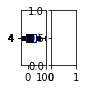

In [13]:

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = [1,1])


# 1. East Bering Sea
EBES_Vs = data_for_box_sig(ebes)
EBES_Hs = data_for_box_h_sig(ebes_h)
bebess = LME_boxplot(0,EBES_Vs,4)
bebeshs = LME_boxplot(0,EBES_Hs,4)

# 2. Gulf of Alaska
GOAL_Vs = data_for_box_sig(goal)
GOAL_Hs = data_for_box_h_sig(goal_h)
bgoals = LME_boxplot(0,GOAL_Vs,4)
bgoalhs = LME_boxplot(0,GOAL_Hs,4)

# 3. California Current
CALI_Vs = data_for_box_sig(cali)
CALI_Hs = data_for_box_h_sig(cali_h)
bcalis = LME_boxplot(0,CALI_Vs,4)
bcalihs = LME_boxplot(0,CALI_Hs,4)

# 4. Gulf of California
GOCA_Vs = data_for_box_sig(goca)
GOCA_Hs = data_for_box_h_sig(goca_h)
bgocas = LME_boxplot(0,GOCA_Vs,4)
bgocahs = LME_boxplot(0,GOCA_Hs,4)


# 5. Gulf of Mexico
GOME_Vs = data_for_box_sig(gome)
GOME_Hs = data_for_box_h_sig(gome_h)
bgomes = LME_boxplot(0,GOME_Vs,4)
bgomehs = LME_boxplot(0,GOME_Hs,4)


# 6. Southeast U.S. Continental Shelf
SEUS_Vs = data_for_box_sig(seus)
SEUS_Hs = data_for_box_h_sig(seus_h)
bseuss = LME_boxplot(0,SEUS_Vs,4)
bseushs = LME_boxplot(0,SEUS_Hs,4)

# 7. Northeast U.S. Continental Shelf
NEUS_Vs = data_for_box_sig(neus)
NEUS_Hs = data_for_box_h_sig(neus_h)
bneuss = LME_boxplot(0,NEUS_Vs,4)
bneushs = LME_boxplot(0,NEUS_Hs,4)

# 8. Scotian Shelf
SCOS_Vs = data_for_box_sig(scos)
SCOS_Hs = data_for_box_h_sig(scos_h)
bscoss = LME_boxplot(0,SCOS_Vs,4)
bscoshs = LME_boxplot(0,SCOS_Hs,4)

# 9. Labrador - Newfoundland
LABN_Vs = data_for_box_sig(labn)
LABN_Hs = data_for_box_h_sig(labn_h)
blabns = LME_boxplot(0,LABN_Vs,4)
blabnhs = LME_boxplot(0,LABN_Hs,4)

# 10. Insular Pacific - Hawaiian
IPHA_Vs = data_for_box_sig(ipha)
IPHA_Hs = data_for_box_h_sig(ipha_h)
biphas = LME_boxplot(0,IPHA_Vs,4)
biphahs = LME_boxplot(0,IPHA_Hs,4)

# 11. Pacific Central - American Coastal
PCAC_Vs = data_for_box_sig(pcac)
PCAC_Hs = data_for_box_h_sig(pcac_h)
bpcacs = LME_boxplot(0,PCAC_Vs,4)
bpcachs = LME_boxplot(0,PCAC_Hs,4)

# 12. Caribbean Sea
CARI_Vs = data_for_box_sig(cari)
CARI_Hs = data_for_box_h_sig(cari_h)
bcaris = LME_boxplot(0,CARI_Vs,4)
bcarihs = LME_boxplot(0,CARI_Hs,4)

# 13. Humboldt Current
HUMB_Vs = data_for_box_sig(humb)
HUMB_Hs = data_for_box_h_sig(humb_h)
bhumbs = LME_boxplot(0,HUMB_Vs,4)
bhumbhs = LME_boxplot(0,HUMB_Hs,4)

# 14. Patagonian Shelf
PATS_Vs = data_for_box_sig(pats)
PATS_Hs = data_for_box_h_sig(pats_h)
bpatss = LME_boxplot(0,PATS_Vs,4)
bpatshs = LME_boxplot(0,PATS_Hs,4)

# 15. South Brazil Shelf
SBRS_Vs = data_for_box_sig(sbrs)
SBRS_Hs = data_for_box_h_sig(sbrs_h)
bsbrss = LME_boxplot(0,SBRS_Vs,4)
bsbrshs = LME_boxplot(0,SBRS_Hs,4)

# 16. East Brazil Shelf
EBRS_Vs = data_for_box_sig(ebrs)
EBRS_Hs = data_for_box_h_sig(ebrs_h)
bebrss = LME_boxplot(0,EBRS_Vs,4)
bebrshs = LME_boxplot(0,EBRS_Hs,4)

# 17. North Brazil Shelf
NBRS_Vs = data_for_box_sig(nbrs)
NBRS_Hs = data_for_box_h_sig(nbrs_h)
bnbrss = LME_boxplot(0,NBRS_Vs,4)
bnbrshs = LME_boxplot(0,NBRS_Hs,4)

# 18. Canadian Eastern Arctic - West Greenland
CEAW_Vs = data_for_box_sig(ceaw)
CEAW_Hs = data_for_box_h_sig(ceaw_h)
bceaws = LME_boxplot(0,CEAW_Vs,4)
bceawhs = LME_boxplot(0,CEAW_Hs,4)

# 19. Greenland Sea
GREE_Vs = data_for_box_sig(gree)
GREE_Hs = data_for_box_h_sig(gree_h)
bgrees = LME_boxplot(0,GREE_Vs,4)
bgreehs = LME_boxplot(0,GREE_Hs,4)

# 20. Barents Sea
BARE_Vs = data_for_box_sig(bare)
BARE_Hs = data_for_box_h_sig(bare_h)
bbares = LME_boxplot(0,BARE_Vs,4)
bbarehs = LME_boxplot(0,BARE_Hs,4)

# 21. Norwegian Sea
NORS_Vs = data_for_box_sig(nors)
NORS_Hs = data_for_box_h_sig(nors_h)
bnorss = LME_boxplot(0,NORS_Vs,4)
bnorshs = LME_boxplot(0,NORS_Hs,4)

# 22. North Sea
NSEA_Vs = data_for_box_sig(nsea)
NSEA_Hs = data_for_box_h_sig(nsea_h)
bnseas = LME_boxplot(0,NSEA_Vs,4)
bnseahs = LME_boxplot(0,NSEA_Hs,4)

# 23. Baltic Sea
BALT_Vs = data_for_box_sig(balt)
BALT_Hs = data_for_box_h_sig(balt_h)
bbalts = LME_boxplot(0,BALT_Vs,4)
bbalths = LME_boxplot(0,BALT_Hs,4)

# 24. Celtic-Biscay Shelf
CEBS_Vs = data_for_box_sig(cebs)
CEBS_Hs = data_for_box_h_sig(cebs_h)
bcebss = LME_boxplot(0,CEBS_Vs,4)
bcebshs = LME_boxplot(0,CEBS_Hs,4)

# 25. Iberian Coastal
IBER_Vs = data_for_box_sig(iber)
IBER_Hs = data_for_box_h_sig(iber_h)
bibers = LME_boxplot(0,IBER_Vs,4)
biberhs = LME_boxplot(0,IBER_Hs,4)

# 26. Mediterranean Sea
MEDS_Vs = data_for_box_sig(meds)
MEDS_Hs = data_for_box_h_sig(meds_h)
bmedss = LME_boxplot(0,MEDS_Vs,4)
bmedshs = LME_boxplot(0,MEDS_Hs,4)

# 27. Canary Current
CANA_Vs = data_for_box_sig(cana)
CANA_Hs = data_for_box_h_sig(cana_h)
bcanas = LME_boxplot(0,CANA_Vs,4)
bcanahs = LME_boxplot(0,CANA_Hs,4)

# 28. Guinea Current
GUIC_Vs = data_for_box_sig(guic)
GUIC_Hs = data_for_box_h_sig(guic_h)
bguics = LME_boxplot(0,GUIC_Vs,4)
bguichs = LME_boxplot(0,GUIC_Hs,4)

# 29. Benguela Current
BENG_Vs = data_for_box_sig(beng)
BENG_Hs = data_for_box_h_sig(beng_h)
bbengs = LME_boxplot(0,BENG_Vs,4)
bbenghs = LME_boxplot(0,BENG_Hs,4)

# 30. Agulhas Current\
AGUL_Vs = data_for_box_sig(agul)
AGUL_Hs = data_for_box_h_sig(agul_h)
baguls = LME_boxplot(0,AGUL_Vs,4)
bagulhs = LME_boxplot(0,AGUL_Hs,4)

# 31. Somali Coastal Current
SOCC_Vs = data_for_box_sig(socc)
SOCC_Hs = data_for_box_h_sig(socc_h)
bsoccs = LME_boxplot(0,SOCC_Vs,4)
bsocchs = LME_boxplot(0,SOCC_Hs,4)

# 32. Arabian Sea
ARBS_Vs = data_for_box_sig(arbs)
ARBS_Hs = data_for_box_h_sig(arbs_h)
barbss = LME_boxplot(0,ARBS_Vs,4)
barbshs = LME_boxplot(0,ARBS_Hs,4)

# 33. Red Sea
REDS_Vs = data_for_box_sig(reds)
REDS_Hs = data_for_box_h_sig(reds_h)
bredss = LME_boxplot(0,REDS_Vs,4)
bredshs = LME_boxplot(0,REDS_Hs,4)

# 34. Bay of Bengal
BOBE_Vs = data_for_box_sig(bobe)
BOBE_Hs = data_for_box_h_sig(bobe_h)
bbobes = LME_boxplot(0,BOBE_Vs,4)
bbobehs = LME_boxplot(0,BOBE_Hs,4)

# 35. Gulf of Thailand
GOTH_Vs = data_for_box_sig(goth)
GOTH_Hs = data_for_box_h_sig(goth_h)
bgoths = LME_boxplot(0,GOTH_Vs,4)
bgothhs = LME_boxplot(0,GOTH_Hs,4)

# 36. South China Sea
SCHS_Vs = data_for_box_sig(schs)
SCHS_Hs = data_for_box_h_sig(schs_h)
bschss = LME_boxplot(0,SCHS_Vs,4)
bschshs = LME_boxplot(0,SCHS_Hs,4)

# 37. Sulu-Celebes Sea
SCBS_Vs = data_for_box_sig(scbs)
SCBS_Hs = data_for_box_h_sig(scbs_h)
bscbss = LME_boxplot(0,SCBS_Vs,4)
bscbshs = LME_boxplot(0,SCBS_Hs,4)

# 38. Indonesian Sea
INDO_Vs = data_for_box_sig(indo)
INDO_Hs = data_for_box_h_sig(indo_h)
bindos = LME_boxplot(0,INDO_Vs,4)
bindohs = LME_boxplot(0,INDO_Hs,4)

# 39. North Australian Shelf
NAUS_Vs = data_for_box_sig(naus)
NAUS_Hs = data_for_box_h_sig(naus_h)
bnauss = LME_boxplot(0,NAUS_Vs,4)
bnaushs = LME_boxplot(0,NAUS_Hs,4)

# 40. Northeast Australian Shelf
NEAS_Vs = data_for_box_sig(neas)
NEAS_Hs = data_for_box_h_sig(neas_h)
bneass = LME_boxplot(0,NEAS_Vs,4)
bneashs = LME_boxplot(0,NEAS_Hs,4)

# 41. East Central Australian Shelf
ECAS_Vs = data_for_box_sig(ecas)
ECAS_Hs = data_for_box_h_sig(ecas_h)
becass = LME_boxplot(0,ECAS_Vs,4)
becashs = LME_boxplot(0,ECAS_Hs,4)

# 42. Southeast Australian Shelf
SEAS_Vs = data_for_box_sig(seas)
SEAS_Hs = data_for_box_h_sig(seas_h)
bseass = LME_boxplot(0,SEAS_Vs,4)
bseashs = LME_boxplot(0,SEAS_Hs,4)

# 43. South West Australian Shelf
SWAS_Vs = data_for_box_sig(swas)
SWAS_Hs = data_for_box_h_sig(swas_h)
bswass = LME_boxplot(0,SWAS_Vs,4)
bswashs = LME_boxplot(0,SWAS_Hs,4)

# 44. West Central Australian Shelf
WCAS_Vs = data_for_box_sig(wcas)
WCAS_Hs = data_for_box_h_sig(wcas_h)
bwcass = LME_boxplot(0,WCAS_Vs,4)
bwcashs = LME_boxplot(0,WCAS_Hs,4)

# 45. Northwest Australian Shelf
NWAS_Vs = data_for_box_sig(nwas)
NWAS_Hs = data_for_box_h_sig(nwas_h)
bnwass = LME_boxplot(0,NWAS_Vs,4)
bnwashs = LME_boxplot(0,NWAS_Hs,4)

# 46. New Zealand Shelf
NZES_Vs = data_for_box_sig(nzes)
NZES_Hs = data_for_box_h_sig(nzes_h)
bnzess = LME_boxplot(0,NZES_Vs,4)
bnzeshs = LME_boxplot(0,NZES_Hs,4)

# 47. East China Sea
ECHS_Vs = data_for_box_sig(echs)
ECHS_Hs = data_for_box_h_sig(echs_h)
bechss = LME_boxplot(0,ECHS_Vs,4)
bechshs = LME_boxplot(0,ECHS_Hs,4)

# 48. Yellow Sea
YELL_Vs = data_for_box_sig(yell)
YELL_Hs = data_for_box_h_sig(yell_h)
byells = LME_boxplot(0,YELL_Vs,4)
byellhs = LME_boxplot(0,YELL_Hs,4)

# 49. Kuroshio Current
KURO_Vs = data_for_box_sig(kuro)
KURO_Hs = data_for_box_h_sig(kuro_h)
bkuros = LME_boxplot(0,KURO_Vs,4)
bkurohs = LME_boxplot(0,KURO_Hs,4)

# 50. Sea of Japan
SOJA_Vs = data_for_box_sig(soja)
SOJA_Hs = data_for_box_h_sig(soja_h)
bsojas = LME_boxplot(0,SOJA_Vs,4)
bsojahs = LME_boxplot(0,SOJA_Hs,4)

# 51. Oyashio Current
OYAC_Vs = data_for_box_sig(oyac)
OYAC_Hs = data_for_box_h_sig(oyac_h)
boyacs = LME_boxplot(0,OYAC_Vs,4)
boyachs = LME_boxplot(0,OYAC_Hs,4)

# 52. Sea of Okhotsk
SOOK_Vs = data_for_box_sig(sook)
SOOK_Hs = data_for_box_h_sig(sook_h)
bsooks = LME_boxplot(0,SOOK_Vs,4)
bsookhs = LME_boxplot(0,SOOK_Hs,4)

# 53. West Bering Sea
WBES_Vs = data_for_box_sig(wbes)
WBES_Hs = data_for_box_h_sig(wbes_h)
bwbess = LME_boxplot(0,WBES_Vs,4)
bwbeshs = LME_boxplot(0,WBES_Hs,4)

# 54. Northern Bering - Chukchi Seas
NBCS_Vs = data_for_box_sig(nbcs)
NBCS_Hs = data_for_box_h_sig(nbcs_h)
bnbcss = LME_boxplot(0,NBCS_Vs,4)
bnbcshs = LME_boxplot(0,NBCS_Hs,4)

# 55. Beaufort Sea
BEAU_Vs = data_for_box_sig(beau)
BEAU_Hs = data_for_box_h_sig(beau_h)
bbeaus = LME_boxplot(0,BEAU_Vs,4)
bbeauhs = LME_boxplot(0,BEAU_Hs,4)

# 56. East Siberian Sea
ESIS_Vs = data_for_box_sig(esis)
ESIS_Hs = data_for_box_h_sig(esis_h)
besiss = LME_boxplot(0,ESIS_Vs,4)
besishs = LME_boxplot(0,ESIS_Hs,4)

# 57. Laptev Sea
LAPS_Vs = data_for_box_sig(laps)
LAPS_Hs = data_for_box_h_sig(laps_h)
blapss = LME_boxplot(0,LAPS_Vs,4)
blapshs = LME_boxplot(0,LAPS_Hs,4)

# 58. Kara Sea
KARA_Vs = data_for_box_sig(kara)
KARA_Hs = data_for_box_h_sig(kara_h)
bkaras = LME_boxplot(0,KARA_Vs,4)
bkarahs = LME_boxplot(0,KARA_Hs,4)

# 59. Iceland Shelf and Sea
ICES_Vs = data_for_box_sig(ices)
ICES_Hs = data_for_box_h_sig(ices_h)
bicess = LME_boxplot(0,ICES_Vs,4)
biceshs = LME_boxplot(0,ICES_Hs,4)

# 60. Faroe Plateau
FARO_Vs = data_for_box_sig(faro)
FARO_Hs = data_for_box_h_sig(faro_h)
bfaros = LME_boxplot(0,FARO_Vs,4)
bfarohs = LME_boxplot(0,FARO_Hs,4)

# 61. Antarctica

# 62. Black Sea
BLAC_Vs = data_for_box_sig(blac)
BLAC_Hs = data_for_box_h_sig(blac_h)
bblacs = LME_boxplot(0,BLAC_Vs,4)
bblachs = LME_boxplot(0,BLAC_Hs,4)

# 63. Hudson Bay Complex
HUBC_Vs = data_for_box_sig(hubc)
HUBC_Hs = data_for_box_h_sig(hubc_h)
bhubcs = LME_boxplot(0,HUBC_Vs,4)
bhubchs = LME_boxplot(0,HUBC_Hs,4)

# 64. Central Arctic

# 65. Aleutian Islands
ALEU_Vs = data_for_box_sig(aleu)
ALEU_Hs = data_for_box_h_sig(aleu_h)
baleus = LME_boxplot(0,ALEU_Vs,4)
baleuhs = LME_boxplot(0,ALEU_Hs,4)

# 66. Canadian High Arctic - North Greenland
CHAN_Vs = data_for_box_sig(chan)
CHAN_Hs = data_for_box_h_sig(chan_h)
bchans = LME_boxplot(0,CHAN_Vs,4)
bchanhs = LME_boxplot(0,CHAN_Hs,4)


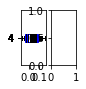

In [14]:

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = [1,1])


# 1. East Bering Sea
EBES_tt_Vs = data_for_box_tt_sig(ebes)
EBES__tt_Hs = data_for_box_tt_h_sig(ebes_h)
bebess_tt =  LME_boxplot(0,EBES_tt_Vs,4)
bebeshs_tt =  LME_boxplot(0,EBES__tt_Hs,4)

# 2. Gulf of Alaska
GOAL_tt_Vs =  data_for_box_tt_sig(goal)
GOAL__tt_Hs = data_for_box_tt_h_sig(goal_h)
bgoals_tt =  LME_boxplot(0,GOAL_tt_Vs,4)
bgoalhs_tt =  LME_boxplot(0,GOAL__tt_Hs,4)

# 3. California Current
CALI_tt_Vs = data_for_box_tt_sig(cali)
CALI__tt_Hs = data_for_box_tt_h_sig(cali_h)
bcalis_tt =  LME_boxplot(0,CALI_tt_Vs,4)
bcalihs_tt =  LME_boxplot(0,CALI__tt_Hs,4)

# 4. Gulf of California
GOCA_tt_Vs = data_for_box_tt_sig(goca)
GOCA__tt_Hs = data_for_box_tt_h_sig(goca_h)
bgocas_tt =  LME_boxplot(0,GOCA_tt_Vs,4)
bgocahs_tt =  LME_boxplot(0,GOCA__tt_Hs,4)


# 5. Gulf of Mexico
GOME_tt_Vs = data_for_box_tt_sig(gome)
GOME__tt_Hs = data_for_box_tt_h_sig(gome_h)
bgomes_tt =  LME_boxplot(0,GOME_tt_Vs,4)
bgomehs_tt =  LME_boxplot(0,GOME__tt_Hs,4)

# 6. Southeast U.S. Continental Shelf
SEUS_tt_Vs = data_for_box_tt_sig(seus)
SEUS__tt_Hs = data_for_box_tt_h_sig(seus_h)
bseuss_tt =  LME_boxplot(0,SEUS_tt_Vs,4)
bseushs_tt =  LME_boxplot(0,SEUS__tt_Hs,4)

# 7. Northeast U.S. Continental Shelf
NEUS_tt_Vs = data_for_box_tt_sig(neus)
NEUS__tt_Hs = data_for_box_tt_h_sig(neus_h)
bneuss_tt =  LME_boxplot(0,NEUS_tt_Vs,4)
bneushs_tt =  LME_boxplot(0,NEUS__tt_Hs,4)

# 8. Scotian Shelf
SCOS_tt_Vs = data_for_box_tt_sig(scos)
SCOS__tt_Hs = data_for_box_tt_h_sig(scos_h)
bscoss_tt =  LME_boxplot(0,SCOS_tt_Vs,4)
bscoshs_tt =  LME_boxplot(0,SCOS__tt_Hs,4)

# 9. Labrador - Newfoundland
LABN_tt_Vs = data_for_box_tt_sig(labn)
LABN__tt_Hs = data_for_box_tt_h_sig(labn_h)
blabns_tt =  LME_boxplot(0,LABN_tt_Vs,4)
blabnhs_tt =  LME_boxplot(0,LABN__tt_Hs,4)

# 10. Insular Pacific - Hawaiian
IPHA_tt_Vs = data_for_box_tt_sig(ipha)
IPHA__tt_Hs = data_for_box_tt_h_sig(ipha_h)
biphas_tt =  LME_boxplot(0,IPHA_tt_Vs,4)
biphahs_tt =  LME_boxplot(0,IPHA__tt_Hs,4)

# 11. Pacific Central - American Coastal
PCAC_tt_Vs = data_for_box_tt_sig(pcac)
PCAC__tt_Hs = data_for_box_tt_h_sig(pcac_h)
bpcacs_tt =  LME_boxplot(0,PCAC_tt_Vs,4)
bpcachs_tt =  LME_boxplot(0,PCAC__tt_Hs,4)

# 12. Caribbean Sea
CARI_tt_Vs = data_for_box_tt_sig(cari)
CARI__tt_Hs = data_for_box_tt_h_sig(cari_h)
bcaris_tt =  LME_boxplot(0,CARI_tt_Vs,4)
bcarihs_tt =  LME_boxplot(0,CARI__tt_Hs,4)

# 13. Humboldt Current
HUMB_tt_Vs = data_for_box_tt_sig(humb)
HUMB__tt_Hs = data_for_box_tt_h_sig(humb_h)
bhumbs_tt =  LME_boxplot(0,HUMB_tt_Vs,4)
bhumbhs_tt =  LME_boxplot(0,HUMB__tt_Hs,4)

# 14. Patagonian Shelf
PATS_tt_Vs = data_for_box_tt_sig(pats)
PATS__tt_Hs = data_for_box_tt_h_sig(pats_h)
bpatss_tt =  LME_boxplot(0,PATS_tt_Vs,4)
bpatshs_tt =  LME_boxplot(0,PATS__tt_Hs,4)

# 15. South Brazil Shelf
SBRS_tt_Vs = data_for_box_tt_sig(sbrs)
SBRS__tt_Hs = data_for_box_tt_h_sig(sbrs_h)
bsbrss_tt =  LME_boxplot(0,SBRS_tt_Vs,4)
bsbrshs_tt =  LME_boxplot(0,SBRS__tt_Hs,4)

# 16. East Brazil Shelf
EBRS_tt_Vs = data_for_box_tt_sig(ebrs)
EBRS__tt_Hs = data_for_box_tt_h_sig(ebrs_h)
bebrss_tt =  LME_boxplot(0,EBRS_tt_Vs,4)
bebrshs_tt =  LME_boxplot(0,EBRS__tt_Hs,4)

# 17. North Brazil Shelf
NBRS_tt_Vs = data_for_box_tt_sig(nbrs)
NBRS__tt_Hs = data_for_box_tt_h_sig(nbrs_h)
bnbrss_tt =  LME_boxplot(0,NBRS_tt_Vs,4)
bnbrshs_tt =  LME_boxplot(0,NBRS__tt_Hs,4)

# 18. Canadian Eastern Arctic - West Greenland
CEAW_tt_Vs = data_for_box_tt_sig(ceaw)
CEAW__tt_Hs = data_for_box_tt_h_sig(ceaw_h)
bceaws_tt =  LME_boxplot(0,CEAW_tt_Vs,4)
bceawhs_tt =  LME_boxplot(0,CEAW__tt_Hs,4)

# 19. Greenland Sea
GREE_tt_Vs = data_for_box_tt_sig(gree)
GREE__tt_Hs = data_for_box_tt_h_sig(gree_h)
bgrees_tt =  LME_boxplot(0,GREE_tt_Vs,4)
bgreehs_tt =  LME_boxplot(0,GREE__tt_Hs,4)

# 20. Barents Sea
BARE_tt_Vs = data_for_box_tt_sig(bare)
BARE__tt_Hs = data_for_box_tt_h_sig(bare_h)
bbares_tt =  LME_boxplot(0,BARE_tt_Vs,4)
bbarehs_tt =  LME_boxplot(0,BARE__tt_Hs,4)

# 21. Norwegian Sea
NORS_tt_Vs = data_for_box_tt_sig(nors)
NORS__tt_Hs = data_for_box_tt_h_sig(nors_h)
bnorss_tt =  LME_boxplot(0,NORS_tt_Vs,4)
bnorshs_tt =  LME_boxplot(0,NORS__tt_Hs,4)

# 22. North Sea
NSEA_tt_Vs = data_for_box_tt_sig(nsea)
NSEA__tt_Hs = data_for_box_tt_h_sig(nsea_h)
bnseas_tt =  LME_boxplot(0,NSEA_tt_Vs,4)
bnseahs_tt =  LME_boxplot(0,NSEA__tt_Hs,4)

# 23. Baltic Sea
BALT_tt_Vs = data_for_box_tt_sig(balt)
BALT__tt_Hs = data_for_box_tt_h_sig(balt_h)
bbalts_tt =  LME_boxplot(0,BALT_tt_Vs,4)
bbalths_tt =  LME_boxplot(0,BALT__tt_Hs,4)

# 24. Celtic-Biscay Shelf
CEBS_tt_Vs = data_for_box_tt_sig(cebs)
CEBS__tt_Hs = data_for_box_tt_h_sig(cebs_h)
bcebss_tt =  LME_boxplot(0,CEBS_tt_Vs,4)
bcebshs_tt =  LME_boxplot(0,CEBS__tt_Hs,4)

# 25. Iberian Coastal
IBER_tt_Vs = data_for_box_tt_sig(iber)
IBER__tt_Hs = data_for_box_tt_h_sig(iber_h)
bibers_tt =  LME_boxplot(0,IBER_tt_Vs,4)
biberhs_tt =  LME_boxplot(0,IBER__tt_Hs,4)

# 26. Mediterranean Sea
MEDS_tt_Vs = data_for_box_tt_sig(meds)
MEDS__tt_Hs = data_for_box_tt_h_sig(meds_h)
bmedss_tt =  LME_boxplot(0,MEDS_tt_Vs,4)
bmedshs_tt =  LME_boxplot(0,MEDS__tt_Hs,4)

# 27. Canary Current
CANA_tt_Vs = data_for_box_tt_sig(cana)
CANA__tt_Hs = data_for_box_tt_h_sig(cana_h)
bcanas_tt =  LME_boxplot(0,CANA_tt_Vs,4)
bcanahs_tt =  LME_boxplot(0,CANA__tt_Hs,4)

# 28. Guinea Current
GUIC_tt_Vs = data_for_box_tt_sig(guic)
GUIC__tt_Hs = data_for_box_tt_h_sig(guic_h)
bguics_tt =  LME_boxplot(0,GUIC_tt_Vs,4)
bguichs_tt =  LME_boxplot(0,GUIC__tt_Hs,4)

# 29. Benguela Current
BENG_tt_Vs = data_for_box_tt_sig(beng)
BENG__tt_Hs =  data_for_box_tt_h_sig(beng_h)
bbengs_tt =  LME_boxplot(0,BENG_tt_Vs,4)
bbenghs_tt = LME_boxplot(0,BENG__tt_Hs,4)

# 30. Agulhas Current\
AGUL_tt_Vs = data_for_box_tt_sig(agul)
AGUL__tt_Hs =  data_for_box_tt_h_sig(agul_h)
baguls_tt =  LME_boxplot(0,AGUL_tt_Vs,4)
bagulhs_tt = LME_boxplot(0,AGUL__tt_Hs,4)

# 31. Somali Coastal Current
SOCC_tt_Vs = data_for_box_tt_sig(socc)
SOCC__tt_Hs = data_for_box_tt_h_sig(socc_h)
bsoccs_tt =  LME_boxplot(0,SOCC_tt_Vs,4)
bsocchs_tt =  LME_boxplot(0,SOCC__tt_Hs,4)

# 32. Arabian Sea
ARBS_tt_Vs = data_for_box_tt_sig(arbs)
ARBS__tt_Hs = data_for_box_tt_h_sig(arbs_h)
barbss_tt =  LME_boxplot(0,ARBS_tt_Vs,4)
barbshs_tt =  LME_boxplot(0,ARBS__tt_Hs,4)

# 33. Red Sea
REDS_tt_Vs = data_for_box_tt_sig(reds)
REDS__tt_Hs = data_for_box_tt_h_sig(reds_h)
bredss_tt =  LME_boxplot(0,REDS_tt_Vs,4)
bredshs_tt =  LME_boxplot(0,REDS__tt_Hs,4)

# 34. Bay of Bengal
BOBE_tt_Vs = data_for_box_tt_sig(bobe)
BOBE__tt_Hs = data_for_box_tt_h_sig(bobe_h)
bbobes_tt =  LME_boxplot(0,BOBE_tt_Vs,4)
bbobehs_tt =  LME_boxplot(0,BOBE__tt_Hs,4)

# 35. Gulf of Thailand
GOTH_tt_Vs = data_for_box_tt_sig(goth)
GOTH__tt_Hs = data_for_box_tt_h_sig(goth_h)
bgoths_tt =  LME_boxplot(0,GOTH_tt_Vs,4)
bgothhs_tt =  LME_boxplot(0,GOTH__tt_Hs,4)

# 36. South China Sea
SCHS_tt_Vs = data_for_box_tt_sig(schs)
SCHS__tt_Hs = data_for_box_tt_h_sig(schs_h)
bschss_tt =  LME_boxplot(0,SCHS_tt_Vs,4)
bschshs_tt =  LME_boxplot(0,SCHS__tt_Hs,4)

# 37. Sulu-Celebes Sea
SCBS_tt_Vs = data_for_box_tt_sig(scbs)
SCBS__tt_Hs = data_for_box_tt_h_sig(scbs_h)
bscbss_tt =  LME_boxplot(0,SCBS_tt_Vs,4)
bscbshs_tt =  LME_boxplot(0,SCBS__tt_Hs,4)

# 38. Indonesian Sea
INDO_tt_Vs = data_for_box_tt_sig(indo)
INDO__tt_Hs = data_for_box_tt_h_sig(indo_h)
bindos_tt =  LME_boxplot(0,INDO_tt_Vs,4)
bindohs_tt =  LME_boxplot(0,INDO__tt_Hs,4)

# 39. North Australian Shelf
NAUS_tt_Vs = data_for_box_tt_sig(naus)
NAUS__tt_Hs = data_for_box_tt_h_sig(naus_h)
bnauss_tt =  LME_boxplot(0,NAUS_tt_Vs,4)
bnaushs_tt =  LME_boxplot(0,NAUS__tt_Hs,4)

# 40. Northeast Australian Shelf
NEAS_tt_Vs = data_for_box_tt_sig(neas)
NEAS__tt_Hs = data_for_box_tt_h_sig(neas_h)
bneass_tt =  LME_boxplot(0,NEAS_tt_Vs,4)
bneashs_tt =  LME_boxplot(0,NEAS__tt_Hs,4)

# 41. East Central Australian Shelf
ECAS_tt_Vs = data_for_box_tt_sig(ecas)
ECAS__tt_Hs = data_for_box_tt_h_sig(ecas_h)
becass_tt =  LME_boxplot(0,ECAS_tt_Vs,4)
becashs_tt =  LME_boxplot(0,ECAS__tt_Hs,4)

# 42. Southeast Australian Shelf
SEAS_tt_Vs = data_for_box_tt_sig(seas)
SEAS__tt_Hs = data_for_box_tt_h_sig(seas_h)
bseass_tt =  LME_boxplot(0,SEAS_tt_Vs,4)
bseashs_tt =  LME_boxplot(0,SEAS__tt_Hs,4)

# 43. South West Australian Shelf
SWAS_tt_Vs = data_for_box_tt_sig(swas)
SWAS__tt_Hs = data_for_box_tt_h_sig(swas_h)
bswass_tt =  LME_boxplot(0,SWAS_tt_Vs,4)
bswashs_tt =  LME_boxplot(0,SWAS__tt_Hs,4)

# 44. West Central Australian Shelf
WCAS_tt_Vs = data_for_box_tt_sig(wcas)
WCAS__tt_Hs = data_for_box_tt_h_sig(wcas_h)
bwcass_tt =  LME_boxplot(0,WCAS_tt_Vs,4)
bwcashs_tt =  LME_boxplot(0,WCAS__tt_Hs,4)

# 45. Northwest Australian Shelf
NWAS_tt_Vs = data_for_box_tt_sig(nwas)
NWAS__tt_Hs = data_for_box_tt_h_sig(nwas_h)
bnwass_tt =  LME_boxplot(0,NWAS_tt_Vs,4)
bnwashs_tt =  LME_boxplot(0,NWAS__tt_Hs,4)

# 46. New Zealand Shelf
NZES_tt_Vs = data_for_box_tt_sig(nzes)
NZES__tt_Hs = data_for_box_tt_h_sig(nzes_h)
bnzess_tt =  LME_boxplot(0,NZES_tt_Vs,4)
bnzeshs_tt =  LME_boxplot(0,NZES__tt_Hs,4)

# 47. East China Sea
ECHS_tt_Vs = data_for_box_tt_sig(echs)
ECHS__tt_Hs = data_for_box_tt_h_sig(echs_h)
bechss_tt =  LME_boxplot(0,ECHS_tt_Vs,4)
bechshs_tt =  LME_boxplot(0,ECHS__tt_Hs,4)

# 48. Yellow Sea
YELL_tt_Vs = data_for_box_tt_sig(yell)
YELL__tt_Hs = data_for_box_tt_h_sig(yell_h)
byells_tt =  LME_boxplot(0,YELL_tt_Vs,4)
byellhs_tt =  LME_boxplot(0,YELL__tt_Hs,4)

# 49. Kuroshio Current
KURO_tt_Vs = data_for_box_tt_sig(kuro)
KURO__tt_Hs = data_for_box_tt_h_sig(kuro_h)
bkuros_tt =  LME_boxplot(0,KURO_tt_Vs,4)
bkurohs_tt =  LME_boxplot(0,KURO__tt_Hs,4)

# 50. Sea of Japan
SOJA_tt_Vs = data_for_box_tt_sig(soja)
SOJA__tt_Hs = data_for_box_tt_h_sig(soja_h)
bsojas_tt =  LME_boxplot(0,SOJA_tt_Vs,4)
bsojahs_tt =  LME_boxplot(0,SOJA__tt_Hs,4)

# 51. Oyashio Current
OYAC_tt_Vs = data_for_box_tt_sig(oyac)
OYAC__tt_Hs = data_for_box_tt_h_sig(oyac_h)
boyacs_tt =  LME_boxplot(0,OYAC_tt_Vs,4)
boyachs_tt =  LME_boxplot(0,OYAC__tt_Hs,4)

# 52. Sea of Okhotsk
SOOK_tt_Vs = data_for_box_tt_sig(sook)
SOOK__tt_Hs = data_for_box_tt_h_sig(sook_h)
bsooks_tt =  LME_boxplot(0,SOOK_tt_Vs,4)
bsookhs_tt =  LME_boxplot(0,SOOK__tt_Hs,4)

# 53. West Bering Sea
WBES_tt_Vs = data_for_box_tt_sig(wbes)
WBES__tt_Hs = data_for_box_tt_h_sig(wbes_h)
bwbess_tt =  LME_boxplot(0,WBES_tt_Vs,4)
bwbeshs_tt =  LME_boxplot(0,WBES__tt_Hs,4)

# 54. Northern Bering - Chukchi Seas
NBCS_tt_Vs = data_for_box_tt_sig(nbcs)
NBCS__tt_Hs = data_for_box_tt_h_sig(nbcs_h)
bnbcss_tt =  LME_boxplot(0,NBCS_tt_Vs,4)
bnbcshs_tt =  LME_boxplot(0,NBCS__tt_Hs,4)

# 55. Beaufort Sea
BEAU_tt_Vs = data_for_box_tt_sig(beau)
BEAU__tt_Hs = data_for_box_tt_h_sig(beau_h)
bbeaus_tt =  LME_boxplot(0,BEAU_tt_Vs,4)
bbeauhs_tt =  LME_boxplot(0,BEAU__tt_Hs,4)

# 56. East Siberian Sea
ESIS_tt_Vs = data_for_box_tt_sig(esis)
ESIS__tt_Hs = data_for_box_tt_h_sig(esis_h)
besiss_tt =  LME_boxplot(0,ESIS_tt_Vs,4)
besishs_tt =  LME_boxplot(0,ESIS__tt_Hs,4)

# 57. Laptev Sea
LAPS_tt_Vs = data_for_box_tt_sig(laps)
LAPS__tt_Hs = data_for_box_tt_h_sig(laps_h)
blapss_tt =  LME_boxplot(0,LAPS_tt_Vs,4)
blapshs_tt =  LME_boxplot(0,LAPS__tt_Hs,4)

# 58. Kara Sea
KARA_tt_Vs = data_for_box_tt_sig(kara)
KARA__tt_Hs = data_for_box_tt_h_sig(kara_h)
bkaras_tt =  LME_boxplot(0,KARA_tt_Vs,4)
bkarahs_tt =  LME_boxplot(0,KARA__tt_Hs,4)

# 59. Iceland Shelf and Sea
ICES_tt_Vs = data_for_box_tt_sig(ices)
ICES__tt_Hs = data_for_box_tt_h_sig(ices_h)
bicess_tt =  LME_boxplot(0,ICES_tt_Vs,4)
biceshs_tt =  LME_boxplot(0,ICES__tt_Hs,4)

# 60. Faroe Plateau
FARO_tt_Vs = data_for_box_tt_sig(faro)
FARO__tt_Hs = data_for_box_tt_h_sig(faro_h)
bfaros_tt =  LME_boxplot(0,FARO_tt_Vs,4)
bfarohs_tt =  LME_boxplot(0,FARO__tt_Hs,4)

# 61. Antarctica

# 62. Black Sea
BLAC_tt_Vs = data_for_box_tt_sig(blac)
BLAC__tt_Hs = data_for_box_tt_h_sig(blac_h)
bblacs_tt =  LME_boxplot(0,BLAC_tt_Vs,4)
bblachs_tt =  LME_boxplot(0,BLAC__tt_Hs,4)

# 63. Hudson Bay Complex
HUBC_tt_Vs = data_for_box_tt_sig(hubc)
HUBC__tt_Hs = data_for_box_tt_h_sig(hubc_h)
bhubcs_tt =  LME_boxplot(0,HUBC_tt_Vs,4)
bhubchs_tt =  LME_boxplot(0,HUBC__tt_Hs,4)

# 64. Central Arctic

# 65. Aleutian Islands
ALEU_tt_Vs = data_for_box_tt_sig(aleu)
ALEU__tt_Hs = data_for_box_tt_h_sig(aleu_h)
baleus_tt =  LME_boxplot(0,ALEU_tt_Vs,4)
baleuhs_tt =  LME_boxplot(0,ALEU__tt_Hs,4)

# 66. Canadian High Arctic - North Greenland
CHAN_tt_Vs = data_for_box_tt_sig(chan)
CHAN__tt_Hs = data_for_box_tt_h_sig(chan_h)
bchans_tt =  LME_boxplot(0,CHAN_tt_Vs,4)
bchanhs_tt =  LME_boxplot(0,CHAN__tt_Hs,4)

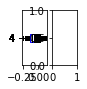

In [15]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = [1,1])


# 1. East Bering Sea
EBES_sg_Vs = data_for_box_sg_sig(ebes)
EBES__sg_Hs = data_for_box_sg_h_sig(ebes_h)
bebess_sg =  LME_boxplot(0,EBES_sg_Vs,4)
bebeshs_sg =  LME_boxplot(0,EBES__sg_Hs,4)

# 2. Gulf of Alaska
GOAL_sg_Vs =  data_for_box_sg_sig(goal)
GOAL__sg_Hs = data_for_box_sg_h_sig(goal_h)
bgoals_sg =  LME_boxplot(0,GOAL_sg_Vs,4)
bgoalhs_sg =  LME_boxplot(0,GOAL__sg_Hs,4)

# 3. California Current
CALI_sg_Vs = data_for_box_sg_sig(cali)
CALI__sg_Hs = data_for_box_sg_h_sig(cali_h)
bcalis_sg =  LME_boxplot(0,CALI_sg_Vs,4)
bcalihs_sg =  LME_boxplot(0,CALI__sg_Hs,4)

# 4. Gulf of California
GOCA_sg_Vs = data_for_box_sg_sig(goca)
GOCA__sg_Hs = data_for_box_sg_h_sig(goca_h)
bgocas_sg =  LME_boxplot(0,GOCA_sg_Vs,4)
bgocahs_sg =  LME_boxplot(0,GOCA__sg_Hs,4)


# 5. Gulf of Mexico
GOME_sg_Vs = data_for_box_sg_sig(gome)
GOME__sg_Hs = data_for_box_sg_h_sig(gome_h)
bgomes_sg =  LME_boxplot(0,GOME_sg_Vs,4)
bgomehs_sg =  LME_boxplot(0,GOME__sg_Hs,4)

# 6. Southeast U.S. Continental Shelf
SEUS_sg_Vs = data_for_box_sg_sig(seus)
SEUS__sg_Hs = data_for_box_sg_h_sig(seus_h)
bseuss_sg =  LME_boxplot(0,SEUS_sg_Vs,4)
bseushs_sg =  LME_boxplot(0,SEUS__sg_Hs,4)

# 7. Northeast U.S. Continental Shelf
NEUS_sg_Vs = data_for_box_sg_sig(neus)
NEUS__sg_Hs = data_for_box_sg_h_sig(neus_h)
bneuss_sg =  LME_boxplot(0,NEUS_sg_Vs,4)
bneushs_sg =  LME_boxplot(0,NEUS__sg_Hs,4)

# 8. Scotian Shelf
SCOS_sg_Vs = data_for_box_sg_sig(scos)
SCOS__sg_Hs = data_for_box_sg_h_sig(scos_h)
bscoss_sg =  LME_boxplot(0,SCOS_sg_Vs,4)
bscoshs_sg =  LME_boxplot(0,SCOS__sg_Hs,4)

# 9. Labrador - Newfoundland
LABN_sg_Vs = data_for_box_sg_sig(labn)
LABN__sg_Hs = data_for_box_sg_h_sig(labn_h)
blabns_sg =  LME_boxplot(0,LABN_sg_Vs,4)
blabnhs_sg =  LME_boxplot(0,LABN__sg_Hs,4)

# 10. Insular Pacific - Hawaiian
IPHA_sg_Vs = data_for_box_sg_sig(ipha)
IPHA__sg_Hs = data_for_box_sg_h_sig(ipha_h)
biphas_sg =  LME_boxplot(0,IPHA_sg_Vs,4)
biphahs_sg =  LME_boxplot(0,IPHA__sg_Hs,4)

# 11. Pacific Central - American Coastal
PCAC_sg_Vs = data_for_box_sg_sig(pcac)
PCAC__sg_Hs = data_for_box_sg_h_sig(pcac_h)
bpcacs_sg =  LME_boxplot(0,PCAC_sg_Vs,4)
bpcachs_sg =  LME_boxplot(0,PCAC__sg_Hs,4)

# 12. Caribbean Sea
CARI_sg_Vs = data_for_box_sg_sig(cari)
CARI__sg_Hs = data_for_box_sg_h_sig(cari_h)
bcaris_sg =  LME_boxplot(0,CARI_sg_Vs,4)
bcarihs_sg =  LME_boxplot(0,CARI__sg_Hs,4)

# 13. Humboldt Current
HUMB_sg_Vs = data_for_box_sg_sig(humb)
HUMB__sg_Hs = data_for_box_sg_h_sig(humb_h)
bhumbs_sg =  LME_boxplot(0,HUMB_sg_Vs,4)
bhumbhs_sg =  LME_boxplot(0,HUMB__sg_Hs,4)

# 14. Patagonian Shelf
PATS_sg_Vs = data_for_box_sg_sig(pats)
PATS__sg_Hs = data_for_box_sg_h_sig(pats_h)
bpatss_sg =  LME_boxplot(0,PATS_sg_Vs,4)
bpatshs_sg =  LME_boxplot(0,PATS__sg_Hs,4)

# 15. South Brazil Shelf
SBRS_sg_Vs = data_for_box_sg_sig(sbrs)
SBRS__sg_Hs = data_for_box_sg_h_sig(sbrs_h)
bsbrss_sg =  LME_boxplot(0,SBRS_sg_Vs,4)
bsbrshs_sg =  LME_boxplot(0,SBRS__sg_Hs,4)

# 16. East Brazil Shelf
EBRS_sg_Vs = data_for_box_sg_sig(ebrs)
EBRS__sg_Hs = data_for_box_sg_h_sig(ebrs_h)
bebrss_sg =  LME_boxplot(0,EBRS_sg_Vs,4)
bebrshs_sg =  LME_boxplot(0,EBRS__sg_Hs,4)

# 17. North Brazil Shelf
NBRS_sg_Vs = data_for_box_sg_sig(nbrs)
NBRS__sg_Hs = data_for_box_sg_h_sig(nbrs_h)
bnbrss_sg =  LME_boxplot(0,NBRS_sg_Vs,4)
bnbrshs_sg =  LME_boxplot(0,NBRS__sg_Hs,4)

# 18. Canadian Eastern Arctic - West Greenland
CEAW_sg_Vs = data_for_box_sg_sig(ceaw)
CEAW__sg_Hs = data_for_box_sg_h_sig(ceaw_h)
bceaws_sg =  LME_boxplot(0,CEAW_sg_Vs,4)
bceawhs_sg =  LME_boxplot(0,CEAW__sg_Hs,4)

# 19. Greenland Sea
GREE_sg_Vs = data_for_box_sg_sig(gree)
GREE__sg_Hs = data_for_box_sg_h_sig(gree_h)
bgrees_sg =  LME_boxplot(0,GREE_sg_Vs,4)
bgreehs_sg =  LME_boxplot(0,GREE__sg_Hs,4)

# 20. Barents Sea
BARE_sg_Vs = data_for_box_sg_sig(bare)
BARE__sg_Hs = data_for_box_sg_h_sig(bare_h)
bbares_sg =  LME_boxplot(0,BARE_sg_Vs,4)
bbarehs_sg =  LME_boxplot(0,BARE__sg_Hs,4)

# 21. Norwegian Sea
NORS_sg_Vs = data_for_box_sg_sig(nors)
NORS__sg_Hs = data_for_box_sg_h_sig(nors_h)
bnorss_sg =  LME_boxplot(0,NORS_sg_Vs,4)
bnorshs_sg =  LME_boxplot(0,NORS__sg_Hs,4)

# 22. North Sea
NSEA_sg_Vs = data_for_box_sg_sig(nsea)
NSEA__sg_Hs = data_for_box_sg_h_sig(nsea_h)
bnseas_sg =  LME_boxplot(0,NSEA_sg_Vs,4)
bnseahs_sg =  LME_boxplot(0,NSEA__sg_Hs,4)

# 23. Baltic Sea
BALT_sg_Vs = data_for_box_sg_sig(balt)
BALT__sg_Hs = data_for_box_sg_h_sig(balt_h)
bbalts_sg =  LME_boxplot(0,BALT_sg_Vs,4)
bbalths_sg =  LME_boxplot(0,BALT__sg_Hs,4)

# 24. Celtic-Biscay Shelf
CEBS_sg_Vs = data_for_box_sg_sig(cebs)
CEBS__sg_Hs = data_for_box_sg_h_sig(cebs_h)
bcebss_sg =  LME_boxplot(0,CEBS_sg_Vs,4)
bcebshs_sg =  LME_boxplot(0,CEBS__sg_Hs,4)

# 25. Iberian Coastal
IBER_sg_Vs = data_for_box_sg_sig(iber)
IBER__sg_Hs = data_for_box_sg_h_sig(iber_h)
bibers_sg =  LME_boxplot(0,IBER_sg_Vs,4)
biberhs_sg =  LME_boxplot(0,IBER__sg_Hs,4)

# 26. Mediterranean Sea
MEDS_sg_Vs = data_for_box_sg_sig(meds)
MEDS__sg_Hs = data_for_box_sg_h_sig(meds_h)
bmedss_sg =  LME_boxplot(0,MEDS_sg_Vs,4)
bmedshs_sg =  LME_boxplot(0,MEDS__sg_Hs,4)

# 27. Canary Current
CANA_sg_Vs = data_for_box_sg_sig(cana)
CANA__sg_Hs = data_for_box_sg_h_sig(cana_h)
bcanas_sg =  LME_boxplot(0,CANA_sg_Vs,4)
bcanahs_sg =  LME_boxplot(0,CANA__sg_Hs,4)

# 28. Guinea Current
GUIC_sg_Vs = data_for_box_sg_sig(guic)
GUIC__sg_Hs = data_for_box_sg_h_sig(guic_h)
bguics_sg =  LME_boxplot(0,GUIC_sg_Vs,4)
bguichs_sg =  LME_boxplot(0,GUIC__sg_Hs,4)

# 29. Benguela Current
BENG_sg_Vs = data_for_box_sg_sig(beng)
BENG__sg_Hs =  data_for_box_sg_h_sig(beng_h)
bbengs_sg =  LME_boxplot(0,BENG_sg_Vs,4)
bbenghs_sg = LME_boxplot(0,BENG__sg_Hs,4)

# 30. Agulhas Current\
AGUL_sg_Vs = data_for_box_sg_sig(agul)
AGUL__sg_Hs =  data_for_box_sg_h_sig(agul_h)
baguls_sg =  LME_boxplot(0,AGUL_sg_Vs,4)
bagulhs_sg = LME_boxplot(0,AGUL__sg_Hs,4)

# 31. Somali Coastal Current
SOCC_sg_Vs = data_for_box_sg_sig(socc)
SOCC__sg_Hs = data_for_box_sg_h_sig(socc_h)
bsoccs_sg =  LME_boxplot(0,SOCC_sg_Vs,4)
bsocchs_sg =  LME_boxplot(0,SOCC__sg_Hs,4)

# 32. Arabian Sea
ARBS_sg_Vs = data_for_box_sg_sig(arbs)
ARBS__sg_Hs = data_for_box_sg_h_sig(arbs_h)
barbss_sg =  LME_boxplot(0,ARBS_sg_Vs,4)
barbshs_sg =  LME_boxplot(0,ARBS__sg_Hs,4)

# 33. Red Sea
REDS_sg_Vs = data_for_box_sg_sig(reds)
REDS__sg_Hs = data_for_box_sg_h_sig(reds_h)
bredss_sg =  LME_boxplot(0,REDS_sg_Vs,4)
bredshs_sg =  LME_boxplot(0,REDS__sg_Hs,4)

# 34. Bay of Bengal
BOBE_sg_Vs = data_for_box_sg_sig(bobe)
BOBE__sg_Hs = data_for_box_sg_h_sig(bobe_h)
bbobes_sg =  LME_boxplot(0,BOBE_sg_Vs,4)
bbobehs_sg =  LME_boxplot(0,BOBE__sg_Hs,4)

# 35. Gulf of Thailand
GOTH_sg_Vs = data_for_box_sg_sig(goth)
GOTH__sg_Hs = data_for_box_sg_h_sig(goth_h)
bgoths_sg =  LME_boxplot(0,GOTH_sg_Vs,4)
bgothhs_sg =  LME_boxplot(0,GOTH__sg_Hs,4)

# 36. South China Sea
SCHS_sg_Vs = data_for_box_sg_sig(schs)
SCHS__sg_Hs = data_for_box_sg_h_sig(schs_h)
bschss_sg =  LME_boxplot(0,SCHS_sg_Vs,4)
bschshs_sg =  LME_boxplot(0,SCHS__sg_Hs,4)

# 37. Sulu-Celebes Sea
SCBS_sg_Vs = data_for_box_sg_sig(scbs)
SCBS__sg_Hs = data_for_box_sg_h_sig(scbs_h)
bscbss_sg =  LME_boxplot(0,SCBS_sg_Vs,4)
bscbshs_sg =  LME_boxplot(0,SCBS__sg_Hs,4)

# 38. Indonesian Sea
INDO_sg_Vs = data_for_box_sg_sig(indo)
INDO__sg_Hs = data_for_box_sg_h_sig(indo_h)
bindos_sg =  LME_boxplot(0,INDO_sg_Vs,4)
bindohs_sg =  LME_boxplot(0,INDO__sg_Hs,4)

# 39. North Australian Shelf
NAUS_sg_Vs = data_for_box_sg_sig(naus)
NAUS__sg_Hs = data_for_box_sg_h_sig(naus_h)
bnauss_sg =  LME_boxplot(0,NAUS_sg_Vs,4)
bnaushs_sg =  LME_boxplot(0,NAUS__sg_Hs,4)

# 40. Northeast Australian Shelf
NEAS_sg_Vs = data_for_box_sg_sig(neas)
NEAS__sg_Hs = data_for_box_sg_h_sig(neas_h)
bneass_sg =  LME_boxplot(0,NEAS_sg_Vs,4)
bneashs_sg =  LME_boxplot(0,NEAS__sg_Hs,4)

# 41. East Central Australian Shelf
ECAS_sg_Vs = data_for_box_sg_sig(ecas)
ECAS__sg_Hs = data_for_box_sg_h_sig(ecas_h)
becass_sg =  LME_boxplot(0,ECAS_sg_Vs,4)
becashs_sg =  LME_boxplot(0,ECAS__sg_Hs,4)

# 42. Southeast Australian Shelf
SEAS_sg_Vs = data_for_box_sg_sig(seas)
SEAS__sg_Hs = data_for_box_sg_h_sig(seas_h)
bseass_sg =  LME_boxplot(0,SEAS_sg_Vs,4)
bseashs_sg =  LME_boxplot(0,SEAS__sg_Hs,4)

# 43. South West Australian Shelf
SWAS_sg_Vs = data_for_box_sg_sig(swas)
SWAS__sg_Hs = data_for_box_sg_h_sig(swas_h)
bswass_sg =  LME_boxplot(0,SWAS_sg_Vs,4)
bswashs_sg =  LME_boxplot(0,SWAS__sg_Hs,4)

# 44. West Central Australian Shelf
WCAS_sg_Vs = data_for_box_sg_sig(wcas)
WCAS__sg_Hs = data_for_box_sg_h_sig(wcas_h)
bwcass_sg =  LME_boxplot(0,WCAS_sg_Vs,4)
bwcashs_sg =  LME_boxplot(0,WCAS__sg_Hs,4)

# 45. Northwest Australian Shelf
NWAS_sg_Vs = data_for_box_sg_sig(nwas)
NWAS__sg_Hs = data_for_box_sg_h_sig(nwas_h)
bnwass_sg =  LME_boxplot(0,NWAS_sg_Vs,4)
bnwashs_sg =  LME_boxplot(0,NWAS__sg_Hs,4)

# 46. New Zealand Shelf
NZES_sg_Vs = data_for_box_sg_sig(nzes)
NZES__sg_Hs = data_for_box_sg_h_sig(nzes_h)
bnzess_sg =  LME_boxplot(0,NZES_sg_Vs,4)
bnzeshs_sg =  LME_boxplot(0,NZES__sg_Hs,4)

# 47. East China Sea
ECHS_sg_Vs = data_for_box_sg_sig(echs)
ECHS__sg_Hs = data_for_box_sg_h_sig(echs_h)
bechss_sg =  LME_boxplot(0,ECHS_sg_Vs,4)
bechshs_sg =  LME_boxplot(0,ECHS__sg_Hs,4)

# 48. Yellow Sea
YELL_sg_Vs = data_for_box_sg_sig(yell)
YELL__sg_Hs = data_for_box_sg_h_sig(yell_h)
byells_sg =  LME_boxplot(0,YELL_sg_Vs,4)
byellhs_sg =  LME_boxplot(0,YELL__sg_Hs,4)

# 49. Kuroshio Current
KURO_sg_Vs = data_for_box_sg_sig(kuro)
KURO__sg_Hs = data_for_box_sg_h_sig(kuro_h)
bkuros_sg =  LME_boxplot(0,KURO_sg_Vs,4)
bkurohs_sg =  LME_boxplot(0,KURO__sg_Hs,4)

# 50. Sea of Japan
SOJA_sg_Vs = data_for_box_sg_sig(soja)
SOJA__sg_Hs = data_for_box_sg_h_sig(soja_h)
bsojas_sg =  LME_boxplot(0,SOJA_sg_Vs,4)
bsojahs_sg =  LME_boxplot(0,SOJA__sg_Hs,4)

# 51. Oyashio Current
OYAC_sg_Vs = data_for_box_sg_sig(oyac)
OYAC__sg_Hs = data_for_box_sg_h_sig(oyac_h)
boyacs_sg =  LME_boxplot(0,OYAC_sg_Vs,4)
boyachs_sg =  LME_boxplot(0,OYAC__sg_Hs,4)

# 52. Sea of Okhotsk
SOOK_sg_Vs = data_for_box_sg_sig(sook)
SOOK__sg_Hs = data_for_box_sg_h_sig(sook_h)
bsooks_sg =  LME_boxplot(0,SOOK_sg_Vs,4)
bsookhs_sg =  LME_boxplot(0,SOOK__sg_Hs,4)

# 53. West Bering Sea
WBES_sg_Vs = data_for_box_sg_sig(wbes)
WBES__sg_Hs = data_for_box_sg_h_sig(wbes_h)
bwbess_sg =  LME_boxplot(0,WBES_sg_Vs,4)
bwbeshs_sg =  LME_boxplot(0,WBES__sg_Hs,4)

# 54. Northern Bering - Chukchi Seas
NBCS_sg_Vs = data_for_box_sg_sig(nbcs)
NBCS__sg_Hs = data_for_box_sg_h_sig(nbcs_h)
bnbcss_sg =  LME_boxplot(0,NBCS_sg_Vs,4)
bnbcshs_sg =  LME_boxplot(0,NBCS__sg_Hs,4)

# 55. Beaufort Sea
BEAU_sg_Vs = data_for_box_sg_sig(beau)
BEAU__sg_Hs = data_for_box_sg_h_sig(beau_h)
bbeaus_sg =  LME_boxplot(0,BEAU_sg_Vs,4)
bbeauhs_sg =  LME_boxplot(0,BEAU__sg_Hs,4)

# 56. East Siberian Sea
ESIS_sg_Vs = data_for_box_sg_sig(esis)
ESIS__sg_Hs = data_for_box_sg_h_sig(esis_h)
besiss_sg =  LME_boxplot(0,ESIS_sg_Vs,4)
besishs_sg =  LME_boxplot(0,ESIS__sg_Hs,4)

# 57. Laptev Sea
LAPS_sg_Vs = data_for_box_sg_sig(laps)
LAPS__sg_Hs = data_for_box_sg_h_sig(laps_h)
blapss_sg =  LME_boxplot(0,LAPS_sg_Vs,4)
blapshs_sg =  LME_boxplot(0,LAPS__sg_Hs,4)

# 58. Kara Sea
KARA_sg_Vs = data_for_box_sg_sig(kara)
KARA__sg_Hs = data_for_box_sg_h_sig(kara_h)
bkaras_sg =  LME_boxplot(0,KARA_sg_Vs,4)
bkarahs_sg =  LME_boxplot(0,KARA__sg_Hs,4)

# 59. Iceland Shelf and Sea
ICES_sg_Vs = data_for_box_sg_sig(ices)
ICES__sg_Hs = data_for_box_sg_h_sig(ices_h)
bicess_sg =  LME_boxplot(0,ICES_sg_Vs,4)
biceshs_sg =  LME_boxplot(0,ICES__sg_Hs,4)

# 60. Faroe Plateau
FARO_sg_Vs = data_for_box_sg_sig(faro)
FARO__sg_Hs = data_for_box_sg_h_sig(faro_h)
bfaros_sg =  LME_boxplot(0,FARO_sg_Vs,4)
bfarohs_sg =  LME_boxplot(0,FARO__sg_Hs,4)

# 61. Antarctica

# 62. Black Sea
BLAC_sg_Vs = data_for_box_sg_sig(blac)
BLAC__sg_Hs = data_for_box_sg_h_sig(blac_h)
bblacs_sg =  LME_boxplot(0,BLAC_sg_Vs,4)
bblachs_sg =  LME_boxplot(0,BLAC__sg_Hs,4)

# 63. Hudson Bay Complex
HUBC_sg_Vs = data_for_box_sg_sig(hubc)
HUBC__sg_Hs = data_for_box_sg_h_sig(hubc_h)
bhubcs_sg =  LME_boxplot(0,HUBC_sg_Vs,4)
bhubchs_sg =  LME_boxplot(0,HUBC__sg_Hs,4)

# 64. Central Arctic

# 65. Aleutian Islands
ALEU_sg_Vs = data_for_box_sg_sig(aleu)
ALEU__sg_Hs = data_for_box_sg_h_sig(aleu_h)
baleus_sg =  LME_boxplot(0,ALEU_sg_Vs,4)
baleuhs_sg =  LME_boxplot(0,ALEU__sg_Hs,4)

# 66. Canadian High Arctic - North Greenland
CHAN_sg_Vs = data_for_box_sg_sig(chan)
CHAN__sg_Hs = data_for_box_sg_h_sig(chan_h)
bchans_sg =  LME_boxplot(0,CHAN_sg_Vs,4)
bchanhs_sg =  LME_boxplot(0,CHAN__sg_Hs,4)

## 5. Figure 1

In [16]:
# Put all the horizontal and vertical climate velocities together into a very long vector for histograms
all_vvel = np.concatenate([EBES_Vs, GOAL_Vs, CALI_Vs, GOCA_Vs, GOME_Vs, SEUS_Vs, NEUS_Vs, SCOS_Vs, LABN_Vs,
 IPHA_Vs, PCAC_Vs, CARI_Vs, HUMB_Vs, PATS_Vs, SBRS_Vs, EBRS_Vs, NBRS_Vs, CEAW_Vs,
 GREE_Vs, BARE_Vs, NORS_Vs, NSEA_Vs, BALT_Vs, CEBS_Vs, IBER_Vs, MEDS_Vs, CANA_Vs,
 GUIC_Vs, BENG_Vs, AGUL_Vs, SOCC_Vs, ARBS_Vs, REDS_Vs, BOBE_Vs, GOTH_Vs, SCHS_Vs,
 SCBS_Vs, INDO_Vs, NAUS_Vs, NEAS_Vs, ECAS_Vs, SEAS_Vs, SWAS_Vs, WCAS_Vs, NWAS_Vs,
 NZES_Vs, ECHS_Vs, YELL_Vs, KURO_Vs, SOJA_Vs, OYAC_Vs, SOOK_Vs, WBES_Vs, NBCS_Vs,
 BEAU_Vs, ESIS_Vs, LAPS_Vs, KARA_Vs, ICES_Vs, FARO_Vs, BLAC_Vs, HUBC_Vs, ALEU_Vs, CHAN_Vs])

all_hvel = np.concatenate([EBES_Hs, GOAL_Hs, CALI_Hs, GOCA_Hs, GOME_Hs, SEUS_Hs, NEUS_Hs, SCOS_Hs, LABN_Hs,
 IPHA_Hs, PCAC_Hs, CARI_Hs, HUMB_Hs, PATS_Hs, SBRS_Hs, EBRS_Hs, NBRS_Hs, CEAW_Hs,
 GREE_Hs, BARE_Hs, NORS_Hs, NSEA_Hs, BALT_Hs, CEBS_Hs, IBER_Hs, MEDS_Hs, CANA_Hs,
 GUIC_Hs, BENG_Hs, AGUL_Hs, SOCC_Hs, ARBS_Hs, REDS_Hs, BOBE_Hs, GOTH_Hs, SCHS_Hs,
 SCBS_Hs, INDO_Hs, NAUS_Hs, NEAS_Hs, ECAS_Hs, SEAS_Hs, SWAS_Hs, WCAS_Hs, NWAS_Hs,
 NZES_Hs, ECHS_Hs, YELL_Hs, KURO_Hs, SOJA_Hs, OYAC_Hs, SOOK_Hs, WBES_Hs, NBCS_Hs,
 BEAU_Hs, ESIS_Hs, LAPS_Hs, KARA_Hs, ICES_Hs, FARO_Hs, BLAC_Hs, HUBC_Hs, ALEU_Hs, CHAN_Hs])

tropical_v = [ARBS_Vs,
             BOBE_Vs,
             CARI_Vs, 
             EBRS_Vs, 
             GUIC_Vs,
             GOTH_Vs,
             INDO_Vs,
             IPHA_Vs,
             NBRS_Vs,
             NAUS_Vs,
             NEAS_Vs,
             NWAS_Vs,
             PCAC_Vs,
             REDS_Vs,
             SCBS_Vs,
             SOCC_Vs,
             SCHS_Vs]

subtropical_v = [AGUL_Vs,
             BENG_Vs,
             CANA_Vs,
             ECAS_Vs,
             ECHS_Vs,
             GOCA_Vs,
             GOME_Vs,
             KURO_Vs,
             MEDS_Vs,
             SBRS_Vs,
             SEUS_Vs,
             WCAS_Vs]

temperate_v = [BLAC_Vs,
             CEBS_Vs,
             FARO_Vs,
             HUMB_Vs,
             IBER_Vs,
             PATS_Vs,
             NZES_Vs,
             NEUS_Vs,
             NSEA_Vs,
             SCOS_Vs,
             SOJA_Vs,
             SEAS_Vs,  
             SWAS_Vs, 
             YELL_Vs]

subpolar_v = [ALEU_Vs,
             BALT_Vs,
             EBES_Vs,
             GOAL_Vs,
             ICES_Vs, 
             LABN_Vs,
             NORS_Vs,
             OYAC_Vs,
             SOOK_Vs,
             WBES_Vs]

In [17]:
# Put all the horizontal and vertical temperature trends together into a very long vector for histograms

all_vtt = np.concatenate([EBES_tt_Vs, GOAL_tt_Vs, CALI_tt_Vs, GOCA_tt_Vs, GOME_tt_Vs, SEUS_tt_Vs, NEUS_tt_Vs, SCOS_tt_Vs, LABN_tt_Vs,
 IPHA_tt_Vs, PCAC_tt_Vs, CARI_tt_Vs, HUMB_tt_Vs, PATS_tt_Vs, SBRS_tt_Vs, EBRS_tt_Vs, NBRS_tt_Vs, CEAW_tt_Vs,
 GREE_tt_Vs, BARE_tt_Vs, NORS_tt_Vs, NSEA_tt_Vs, BALT_tt_Vs, CEBS_tt_Vs, IBER_tt_Vs, MEDS_tt_Vs, CANA_tt_Vs,
 GUIC_tt_Vs, BENG_tt_Vs, AGUL_tt_Vs, SOCC_tt_Vs, ARBS_tt_Vs, REDS_tt_Vs, BOBE_tt_Vs, GOTH_tt_Vs, SCHS_tt_Vs,
 SCBS_tt_Vs, INDO_tt_Vs, NAUS_tt_Vs, NEAS_tt_Vs, ECAS_tt_Vs, SEAS_tt_Vs, SWAS_tt_Vs, WCAS_tt_Vs, NWAS_tt_Vs,
 NZES_tt_Vs, ECHS_tt_Vs, YELL_tt_Vs, KURO_tt_Vs, SOJA_tt_Vs, OYAC_tt_Vs, SOOK_tt_Vs, WBES_tt_Vs, NBCS_tt_Vs,
 BEAU_tt_Vs, ESIS_tt_Vs, LAPS_tt_Vs, KARA_tt_Vs, ICES_tt_Vs, FARO_tt_Vs, BLAC_tt_Vs, HUBC_tt_Vs, ALEU_tt_Vs, CHAN_tt_Vs])

all_htt = np.concatenate([EBES__tt_Hs, GOAL__tt_Hs, CALI__tt_Hs, GOCA__tt_Hs, GOME__tt_Hs, SEUS__tt_Hs, NEUS__tt_Hs, SCOS__tt_Hs, LABN__tt_Hs,
 IPHA__tt_Hs, PCAC__tt_Hs, CARI__tt_Hs, HUMB__tt_Hs, PATS__tt_Hs, SBRS__tt_Hs, EBRS__tt_Hs, NBRS__tt_Hs, CEAW__tt_Hs,
 GREE__tt_Hs, BARE__tt_Hs, NORS__tt_Hs, NSEA__tt_Hs, BALT__tt_Hs, CEBS__tt_Hs, IBER__tt_Hs, MEDS__tt_Hs, CANA__tt_Hs,
 GUIC__tt_Hs, BENG__tt_Hs, AGUL__tt_Hs, SOCC__tt_Hs, ARBS__tt_Hs, REDS__tt_Hs, BOBE__tt_Hs, GOTH__tt_Hs, SCHS__tt_Hs,
 SCBS__tt_Hs, INDO__tt_Hs, NAUS__tt_Hs, NEAS__tt_Hs, ECAS__tt_Hs, SEAS__tt_Hs, SWAS__tt_Hs, WCAS__tt_Hs, NWAS__tt_Hs,
 NZES__tt_Hs, ECHS__tt_Hs, YELL__tt_Hs, KURO__tt_Hs, SOJA__tt_Hs, OYAC__tt_Hs, SOOK__tt_Hs, WBES__tt_Hs, NBCS__tt_Hs,
 BEAU__tt_Hs, ESIS__tt_Hs, LAPS__tt_Hs, KARA__tt_Hs, ICES__tt_Hs, FARO__tt_Hs, BLAC__tt_Hs, HUBC__tt_Hs, ALEU__tt_Hs, CHAN__tt_Hs])


In [18]:
# Put all the horizontal and vertical spatial gradients together into a very long vector for histograms

all_vsg = np.concatenate([EBES_sg_Vs, GOAL_sg_Vs, CALI_sg_Vs, GOCA_sg_Vs, GOME_sg_Vs, SEUS_sg_Vs, NEUS_sg_Vs, SCOS_sg_Vs, LABN_sg_Vs,
 IPHA_sg_Vs, PCAC_sg_Vs, CARI_sg_Vs, HUMB_sg_Vs, PATS_sg_Vs, SBRS_sg_Vs, EBRS_sg_Vs, NBRS_sg_Vs, CEAW_sg_Vs,
 GREE_sg_Vs, BARE_sg_Vs, NORS_sg_Vs, NSEA_sg_Vs, BALT_sg_Vs, CEBS_sg_Vs, IBER_sg_Vs, MEDS_sg_Vs, CANA_sg_Vs,
 GUIC_sg_Vs, BENG_sg_Vs, AGUL_sg_Vs, SOCC_sg_Vs, ARBS_sg_Vs, REDS_sg_Vs, BOBE_sg_Vs, GOTH_sg_Vs, SCHS_sg_Vs,
 SCBS_sg_Vs, INDO_sg_Vs, NAUS_sg_Vs, NEAS_sg_Vs, ECAS_sg_Vs, SEAS_sg_Vs, SWAS_sg_Vs, WCAS_sg_Vs, NWAS_sg_Vs,
 NZES_sg_Vs, ECHS_sg_Vs, YELL_sg_Vs, KURO_sg_Vs, SOJA_sg_Vs, OYAC_sg_Vs, SOOK_sg_Vs, WBES_sg_Vs, NBCS_sg_Vs,
 BEAU_sg_Vs, ESIS_sg_Vs, LAPS_sg_Vs, KARA_sg_Vs, ICES_sg_Vs, FARO_sg_Vs, BLAC_sg_Vs, HUBC_sg_Vs, ALEU_sg_Vs, CHAN_sg_Vs])

all_hsg = np.concatenate([EBES__sg_Hs, GOAL__sg_Hs, CALI__sg_Hs, GOCA__sg_Hs, GOME__sg_Hs, SEUS__sg_Hs, NEUS__sg_Hs, SCOS__sg_Hs, LABN__sg_Hs,
 IPHA__sg_Hs, PCAC__sg_Hs, CARI__sg_Hs, HUMB__sg_Hs, PATS__sg_Hs, SBRS__sg_Hs, EBRS__sg_Hs, NBRS__sg_Hs, CEAW__sg_Hs,
 GREE__sg_Hs, BARE__sg_Hs, NORS__sg_Hs, NSEA__sg_Hs, BALT__sg_Hs, CEBS__sg_Hs, IBER__sg_Hs, MEDS__sg_Hs, CANA__sg_Hs,
 GUIC__sg_Hs, BENG__sg_Hs, AGUL__sg_Hs, SOCC__sg_Hs, ARBS__sg_Hs, REDS__sg_Hs, BOBE__sg_Hs, GOTH__sg_Hs, SCHS__sg_Hs,
 SCBS__sg_Hs, INDO__sg_Hs, NAUS__sg_Hs, NEAS__sg_Hs, ECAS__sg_Hs, SEAS__sg_Hs, SWAS__sg_Hs, WCAS__sg_Hs, NWAS__sg_Hs,
 NZES__sg_Hs, ECHS__sg_Hs, YELL__sg_Hs, KURO__sg_Hs, SOJA__sg_Hs, OYAC__sg_Hs, SOOK__sg_Hs, WBES__sg_Hs, NBCS__sg_Hs,
 BEAU__sg_Hs, ESIS__sg_Hs, LAPS__sg_Hs, KARA__sg_Hs, ICES__sg_Hs, FARO__sg_Hs, BLAC__sg_Hs, HUBC__sg_Hs, ALEU__sg_Hs, CHAN__sg_Hs])


In [19]:
# delineate between pos and neg climate vel, warming and cooling, and positive and negative spat grad for the colored plots
pos_v = all_vvel[all_vvel>0]
pos_h = all_hvel[all_hvel>0]

neg_v = all_vvel[all_vvel<0]
neg_h = all_hvel[all_hvel<0]

warming_v = all_vtt[all_vtt>0]
warming_h = all_htt[all_htt>0]

cooling_v = all_vtt[all_vtt<0]
cooling_h = all_htt[all_htt<0]

positive_v = all_vsg[all_vsg>0]
positive_h = all_hsg[all_hsg>0]

negative_v = all_vsg[all_vsg<0]
negative_h = all_hsg[all_hsg<0]

Text(0.5, 1.0, 'Surface Horizontal Temperature Gradient')

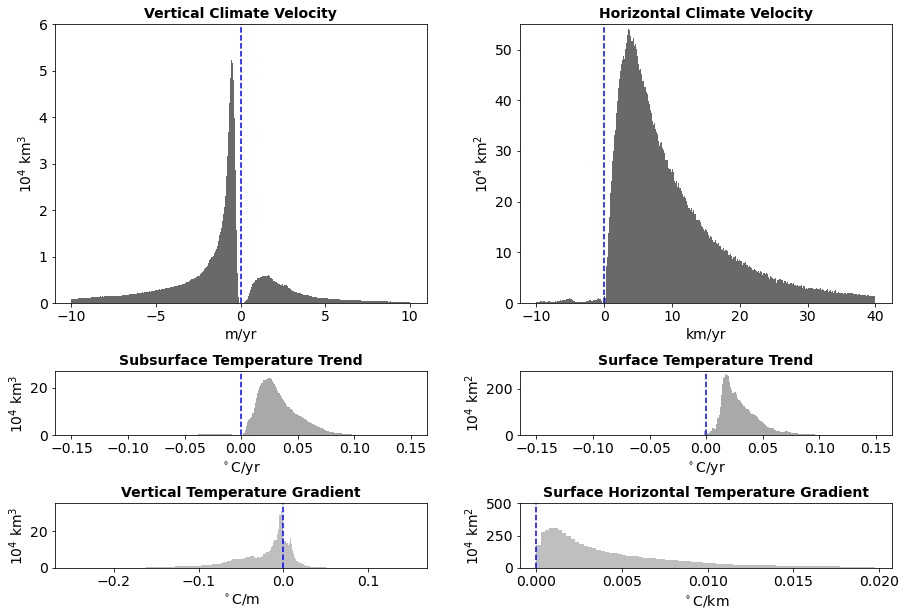

In [20]:
# Greyscale histograms

# Alphabetical
from matplotlib import gridspec

# create a figure
fig = plt.figure()
 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(10)
 
# set width of each subplot as 8
fig.set_figwidth(15)
 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=3, width_ratios=[1,1], 
                         wspace=0.25,
                         hspace=0.5, height_ratios=[1.3, 0.3, 0.3])


w_vp = np.ones(len(pos_v))
w_vp[:] = .005*(111.139*(1/12))*(111.000*(1/12))
w_hp = np.ones(len(pos_h))
w_hp[:] = (111.139*(1/12))*(111.000*(1/12))

w_vn = np.ones(len(neg_v))
w_vn[:] = .005*(111.139*(1/12))*(111.000*(1/12))
w_hn = np.ones(len(neg_h))
w_hn[:] = (111.139*(1/12))*(111.000*(1/12))

ax1 = fig.add_subplot(spec[0,0])
ax1.hist(pos_v, bins = np.arange(0,10,0.01), weights = w_vp/10**4, color = 'dimgrey')#, alpha = 0.5)
ax1.hist(neg_v, bins = np.arange(-10,0,0.01), weights = w_vn/10**4, color = 'dimgrey')#, alpha = 0.5)
ax1.plot([0,0],[0,6], 'b',linestyle = 'dashed')
ax1.set_ylim([0,6])
ax1.tick_params(labelsize = 14)
ax1.set_xlabel('m/yr', fontsize = 14)
ax1.set_ylabel('10$^4$ km$^3$', fontsize = 14)
ax1.set_title('Vertical Climate Velocity', weight = 'bold', fontsize = 14)

ax2 = fig.add_subplot(spec[0,1])
ax2.hist(pos_h, bins = np.arange(0,40, .1), weights = w_hp/10**4, color = 'dimgrey')#, alpha = 0.5)
ax2.hist(neg_h, bins = np.arange(-10,0, .1), weights = w_hn/10**4, color = 'dimgrey')#, alpha = 0.5)
ax2.plot([0,0],[0,55], 'b',linestyle = 'dashed')
ax2.set_ylim([0,55])
ax2.tick_params(labelsize = 14)
ax2.set_xlabel('km/yr', fontsize = 14)
ax2.set_ylabel('10$^4$ km$^2$', fontsize = 14)
ax2.set_title('Horizontal Climate Velocity',weight = 'bold', fontsize = 14)


#ax[0,0].text(-0.1, 1.02, 'a)', transform=ax[0,0].transAxes, 
#            size=20, weight='bold')
#ax[0,1].text(-0.1, 1.02, 'b)', transform=ax[0,1].transAxes, 
#            size=20, weight='bold')

## Temp trend
w_vw = np.ones(len(warming_v))
w_vw[:] = .005*(111.139*(1/12))*(111.000*(1/12))
w_hw = np.ones(len(warming_h))
w_hw[:] = (111.139*(1/12))*(111.000*(1/12))

w_vc = np.ones(len(cooling_v))
w_vc[:] = .005*(111.139*(1/12))*(111.000*(1/12))
w_hc = np.ones(len(cooling_h))
w_hc[:] = (111.139*(1/12))*(111.000*(1/12))

ax3 = fig.add_subplot(spec[1,0])
ax3.hist(warming_v, bins = np.arange(0,0.15,0.001), weights = w_vw/10**4, color = 'darkgrey')#,alpha = 0.5)

ax3.hist(cooling_v, bins = np.arange(-0.15,0,0.001), weights = w_vc/10**4, color = 'darkgrey')#, alpha = 0.5)
ax3.plot([0,0],[0,27], 'b',linestyle = 'dashed')
ax3.set_ylim([0,27])
ax3.tick_params(labelsize = 14)
ax3.set_xlabel('$^\circ$C/yr', fontsize = 14)
ax3.set_ylabel('10$^4$ km$^3$', fontsize = 14)
ax3.set_title('Subsurface Temperature Trend',weight = 'bold', fontsize = 14)

ax4 = fig.add_subplot(spec[1,1])
ax4.hist(warming_h, bins = np.arange(0,0.15,0.001), weights = w_hw/10**4, color = 'darkgrey')#, alpha = 0.5)
ax4.hist(cooling_h, bins = np.arange(-0.15,0,0.001), weights = w_hc/10**4, color = 'darkgrey')#, alpha = 0.5)
#ax4.hist(warming_h, bins = np.arange(0,0.15,0.001), weights = w_hw/10**4, color = 'grey')#,alpha = 0.5)
#ax[1,1].hist(cooling_h, bins = np.arange(-0.15,0,0.001), weights = w_hc/10**4, color = 'grey')
ax4.plot([0,0],[0,275], 'b',linestyle = 'dashed')
ax4.set_ylim([0,275])
ax4.tick_params(labelsize = 14)
ax4.set_xlabel('$^\circ$C/yr', fontsize = 14)
ax4.set_ylabel('10$^4$ km$^2$', fontsize = 14)
ax4.set_title('Surface Temperature Trend',weight = 'bold', fontsize = 14)

#ax[1,0].text(-0.1, 1.02, 'c)', transform=ax[1,0].transAxes, 
#            size=20, weight='bold')
#ax[1,1].text(-0.1, 1.02, 'd)', transform=ax[1,1].transAxes, 
#            size=20, weight='bold')

## Spat Grad
w_vsgp = np.ones(len(positive_v))
w_vsgp[:] = .005*(111.139*(1/12))*(111.000*(1/12))
w_hsgp = np.ones(len(positive_h))
w_hsgp[:] = (111.139*(1/12))*(111.000*(1/12))

w_vsgn = np.ones(len(negative_v))
w_vsgn[:] = .005*(111.139*(1/12))*(111.000*(1/12))
w_hsgn = np.ones(len(negative_h))
w_hsgn[:] = (111.139*(1/12))*(111.000*(1/12))

ax5 = fig.add_subplot(spec[2,0])
ax5.hist(positive_v, bins = np.arange(0,0.15,0.001), weights = w_vsgp/10**4, color = 'grey',alpha = 0.5)
ax5.hist(negative_v, bins = np.arange(-0.25,0,0.001), weights = w_vsgn/10**4, color = 'grey',alpha = 0.5)
ax5.plot([0,0],[0,35], 'b',linestyle = 'dashed')
ax5.set_ylim([0,35])
ax5.tick_params(labelsize = 14)
ax5.set_xlabel('$^\circ$C/m', fontsize = 14)
ax5.set_ylabel('10$^4$ km$^3$', fontsize = 14)
ax5.set_title('Vertical Temperature Gradient',weight = 'bold', fontsize = 14)

ax6 = fig.add_subplot(spec[2,1])
ax6.hist(positive_h, bins = np.arange(0,.02,.00025), weights = w_hsgp/10**4, color = 'grey',alpha = 0.5)
#ax6.hist(negative_h, bins = np.arange(-0.15,0,0.001), weights = w_hsgn, color = 'brown')
ax6.plot([0,0],[0,500], 'b',linestyle = 'dashed')
ax6.set_ylim([0,500])
ax6.tick_params(labelsize = 14)
ax6.set_xlabel('$^\circ$C/km', fontsize = 14)
ax6.set_ylabel('10$^4$ km$^2$', fontsize = 14)
#ax6.set_xlim([0,5])
ax6.set_title('Surface Horizontal Temperature Gradient',weight = 'bold', fontsize = 14)

#ax[2,0].text(-0.1, 1.02, 'e)', transform=ax[2,0].transAxes, 
#            size=20, weight='bold')
#ax[2,1].text(-0.1, 1.02, 'f)', transform=ax[2,1].transAxes, 
#            size=20, weight='bold')
             
#fig.tight_layout()

In [21]:
all_v = np.append(neg_v, pos_v)
np.nanmedian(all_v)

-0.8282202546455191

In [22]:
len(neg_v)/len(all_v)

0.7675929149559853

In [23]:
neg_one_to_zero = neg_v[neg_v>-2]

In [24]:
len(neg_one_to_zero)/len(all_v)

0.4431953534935036

## 6. Figure S1

In [25]:
def data_for_box_per_depth(data, ind_depth_start, ind_depth_end):
    ind_depth_end = ind_depth_end + 1
    data2 = data.VCV[:,:,ind_depth_start:ind_depth_end].values.reshape(len(data.lat)*len(data.lon)*(ind_depth_end - ind_depth_start))
    filt_data2 = data2[~np.isnan(data2)]
    return filt_data2

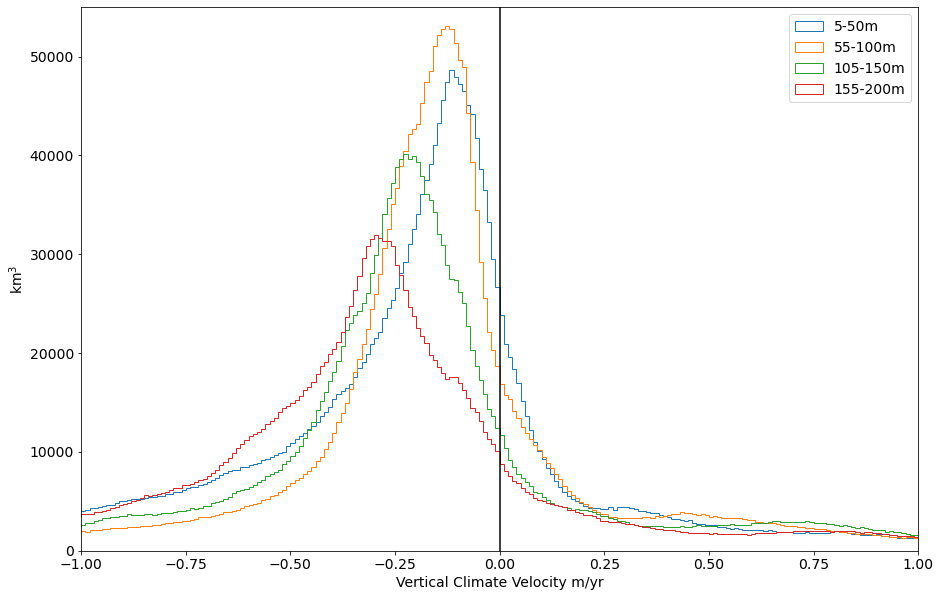

In [26]:
fig, ax = plt.subplots(figsize = [15,10])

depth_st = 0
depth_end = 9
data_50 = np.concatenate([data_for_box_per_depth(agul, depth_st, depth_end), data_for_box_per_depth(arbs, depth_st, depth_end), data_for_box_per_depth(balt, depth_st, depth_end), data_for_box_per_depth(beau, depth_st, depth_end), data_for_box_per_depth(beng, depth_st, depth_end),
               data_for_box_per_depth(blac, depth_st, depth_end), data_for_box_per_depth(bobe, depth_st, depth_end), data_for_box_per_depth(cana, depth_st, depth_end), data_for_box_per_depth(cari, depth_st, depth_end), data_for_box_per_depth(cebs, depth_st, depth_end),
               data_for_box_per_depth(ecas, depth_st, depth_end), data_for_box_per_depth(ebrs, depth_st, depth_end), data_for_box_per_depth(esis, depth_st, depth_end), data_for_box_per_depth(faro, depth_st, depth_end), data_for_box_per_depth(guic, depth_st, depth_end),
               data_for_box_per_depth(goal, depth_st, depth_end), data_for_box_per_depth(gree, depth_st, depth_end), data_for_box_per_depth(humb, depth_st, depth_end), data_for_box_per_depth(ices, depth_st, depth_end), data_for_box_per_depth(indo, depth_st, depth_end),
               data_for_box_per_depth(kuro, depth_st, depth_end), data_for_box_per_depth(labn, depth_st, depth_end), data_for_box_per_depth(neus, depth_st, depth_end), data_for_box_per_depth(nsea, depth_st, depth_end), data_for_box_per_depth(oyac, depth_st, depth_end),
               data_for_box_per_depth(reds, depth_st, depth_end), data_for_box_per_depth(soja, depth_st, depth_end), data_for_box_per_depth(sook, depth_st, depth_end), data_for_box_per_depth(socc, depth_st, depth_end), data_for_box_per_depth(schs, depth_st, depth_end),
               data_for_box_per_depth(scos, depth_st, depth_end), data_for_box_per_depth(seas, depth_st, depth_end), data_for_box_per_depth(swas, depth_st, depth_end), data_for_box_per_depth(wbes, depth_st, depth_end), data_for_box_per_depth(wcas, depth_st, depth_end),
               data_for_box_per_depth(yell, depth_st, depth_end)])
w_50 = np.ones(len(data_50))
w_50[:] = .005*(111.139*(1/12))*(111.000*(1/12))
ax.hist(data_50,bins = np.arange(-2,2,0.01), weights = w_50, histtype = 'step', label = '5-50m')

depth_st = 10
depth_end = 19
data_50 = np.concatenate([data_for_box_per_depth(agul, depth_st, depth_end), data_for_box_per_depth(arbs, depth_st, depth_end), data_for_box_per_depth(balt, depth_st, depth_end), data_for_box_per_depth(beau, depth_st, depth_end), data_for_box_per_depth(beng, depth_st, depth_end),
               data_for_box_per_depth(blac, depth_st, depth_end), data_for_box_per_depth(bobe, depth_st, depth_end), data_for_box_per_depth(cana, depth_st, depth_end), data_for_box_per_depth(cari, depth_st, depth_end), data_for_box_per_depth(cebs, depth_st, depth_end),
               data_for_box_per_depth(ecas, depth_st, depth_end), data_for_box_per_depth(ebrs, depth_st, depth_end), data_for_box_per_depth(esis, depth_st, depth_end), data_for_box_per_depth(faro, depth_st, depth_end), data_for_box_per_depth(guic, depth_st, depth_end),
               data_for_box_per_depth(goal, depth_st, depth_end), data_for_box_per_depth(gree, depth_st, depth_end), data_for_box_per_depth(humb, depth_st, depth_end), data_for_box_per_depth(ices, depth_st, depth_end), data_for_box_per_depth(indo, depth_st, depth_end),
               data_for_box_per_depth(kuro, depth_st, depth_end), data_for_box_per_depth(labn, depth_st, depth_end), data_for_box_per_depth(neus, depth_st, depth_end), data_for_box_per_depth(nsea, depth_st, depth_end), data_for_box_per_depth(oyac, depth_st, depth_end),
               data_for_box_per_depth(reds, depth_st, depth_end), data_for_box_per_depth(soja, depth_st, depth_end), data_for_box_per_depth(sook, depth_st, depth_end), data_for_box_per_depth(socc, depth_st, depth_end), data_for_box_per_depth(schs, depth_st, depth_end),
               data_for_box_per_depth(scos, depth_st, depth_end), data_for_box_per_depth(seas, depth_st, depth_end), data_for_box_per_depth(swas, depth_st, depth_end), data_for_box_per_depth(wbes, depth_st, depth_end), data_for_box_per_depth(wcas, depth_st, depth_end),
               data_for_box_per_depth(yell, depth_st, depth_end)])
w_50 = np.ones(len(data_50))
w_50[:] = .005*(111.139*(1/12))*(111.000*(1/12))
ax.hist(data_50,bins = np.arange(-2,2,0.01), weights = w_50, histtype = 'step',label = '55-100m')

depth_st = 20
depth_end = 29
data_50 = np.concatenate([data_for_box_per_depth(agul, depth_st, depth_end), data_for_box_per_depth(arbs, depth_st, depth_end), data_for_box_per_depth(balt, depth_st, depth_end), data_for_box_per_depth(beau, depth_st, depth_end), data_for_box_per_depth(beng, depth_st, depth_end),
               data_for_box_per_depth(blac, depth_st, depth_end), data_for_box_per_depth(bobe, depth_st, depth_end), data_for_box_per_depth(cana, depth_st, depth_end), data_for_box_per_depth(cari, depth_st, depth_end), data_for_box_per_depth(cebs, depth_st, depth_end),
               data_for_box_per_depth(ecas, depth_st, depth_end), data_for_box_per_depth(ebrs, depth_st, depth_end), data_for_box_per_depth(esis, depth_st, depth_end), data_for_box_per_depth(faro, depth_st, depth_end), data_for_box_per_depth(guic, depth_st, depth_end),
               data_for_box_per_depth(goal, depth_st, depth_end), data_for_box_per_depth(gree, depth_st, depth_end), data_for_box_per_depth(humb, depth_st, depth_end), data_for_box_per_depth(ices, depth_st, depth_end), data_for_box_per_depth(indo, depth_st, depth_end),
               data_for_box_per_depth(kuro, depth_st, depth_end), data_for_box_per_depth(labn, depth_st, depth_end), data_for_box_per_depth(neus, depth_st, depth_end), data_for_box_per_depth(nsea, depth_st, depth_end), data_for_box_per_depth(oyac, depth_st, depth_end),
               data_for_box_per_depth(reds, depth_st, depth_end), data_for_box_per_depth(soja, depth_st, depth_end), data_for_box_per_depth(sook, depth_st, depth_end), data_for_box_per_depth(socc, depth_st, depth_end), data_for_box_per_depth(schs, depth_st, depth_end),
               data_for_box_per_depth(scos, depth_st, depth_end), data_for_box_per_depth(seas, depth_st, depth_end), data_for_box_per_depth(swas, depth_st, depth_end), data_for_box_per_depth(wbes, depth_st, depth_end), data_for_box_per_depth(wcas, depth_st, depth_end),
               data_for_box_per_depth(yell, depth_st, depth_end)])
w_50 = np.ones(len(data_50))
w_50[:] = .005*(111.139*(1/12))*(111.000*(1/12))
ax.hist(data_50,bins = np.arange(-2,2,0.01), weights = w_50, histtype = 'step',label = '105-150m')


depth_st = 30
depth_end = 39
data_50 = np.concatenate([data_for_box_per_depth(agul, depth_st, depth_end), data_for_box_per_depth(arbs, depth_st, depth_end), data_for_box_per_depth(balt, depth_st, depth_end), data_for_box_per_depth(beau, depth_st, depth_end), data_for_box_per_depth(beng, depth_st, depth_end),
               data_for_box_per_depth(blac, depth_st, depth_end), data_for_box_per_depth(bobe, depth_st, depth_end), data_for_box_per_depth(cana, depth_st, depth_end), data_for_box_per_depth(cari, depth_st, depth_end), data_for_box_per_depth(cebs, depth_st, depth_end),
               data_for_box_per_depth(ecas, depth_st, depth_end), data_for_box_per_depth(ebrs, depth_st, depth_end), data_for_box_per_depth(esis, depth_st, depth_end), data_for_box_per_depth(faro, depth_st, depth_end), data_for_box_per_depth(guic, depth_st, depth_end),
               data_for_box_per_depth(goal, depth_st, depth_end), data_for_box_per_depth(gree, depth_st, depth_end), data_for_box_per_depth(humb, depth_st, depth_end), data_for_box_per_depth(ices, depth_st, depth_end), data_for_box_per_depth(indo, depth_st, depth_end),
               data_for_box_per_depth(kuro, depth_st, depth_end), data_for_box_per_depth(labn, depth_st, depth_end), data_for_box_per_depth(neus, depth_st, depth_end), data_for_box_per_depth(nsea, depth_st, depth_end), data_for_box_per_depth(oyac, depth_st, depth_end),
               data_for_box_per_depth(reds, depth_st, depth_end), data_for_box_per_depth(soja, depth_st, depth_end), data_for_box_per_depth(sook, depth_st, depth_end), data_for_box_per_depth(socc, depth_st, depth_end), data_for_box_per_depth(schs, depth_st, depth_end),
               data_for_box_per_depth(scos, depth_st, depth_end), data_for_box_per_depth(seas, depth_st, depth_end), data_for_box_per_depth(swas, depth_st, depth_end), data_for_box_per_depth(wbes, depth_st, depth_end), data_for_box_per_depth(wcas, depth_st, depth_end),
               data_for_box_per_depth(yell, depth_st, depth_end)])
w_50 = np.ones(len(data_50))
w_50[:] = .005*(111.139*(1/12))*(111.000*(1/12))
ax.hist(data_50,bins = np.arange(-2,2,0.01), weights = w_50, histtype = 'step',label = '155-200m')
ax.plot([0,0],[0,1.5*10**6],'k')



plt.ylim([0,0.3*10**6])
plt.tick_params(labelsize = 14)
plt.ylim([0,55000])
plt.xlim([-1,1])
plt.ylabel('km$^3$',fontsize = 14)
plt.xlabel('Vertical Climate Velocity m/yr', fontsize = 14)  
plt.legend(fontsize = 14)

## 7. Figure 2

In [27]:
def significant_cells(lme):
    percent = len(lme.temptrend.values[lme.pvals <=0.05])/len(np.where(np.isnan(lme.temptrend)==False)[0]) * 100
    return percent

In [28]:
percents = np.empty([66,2])
percents[:,:] = np.nan

# 1. East Bering Sea
ebes_sc = significant_cells(ebes)
ebes_h_sc = significant_cells(ebes_h)

percents[0,0] = ebes_sc
percents[0,1] = ebes_h_sc

# 2. Gulf of Alaska
goal_sc = significant_cells(goal)
goal_h_sc = significant_cells(goal_h)

percents[1,0] = goal_sc
percents[1,1] = goal_h_sc

# 3. California Current
cali_sc = significant_cells(cali)
cali_h_sc = significant_cells(cali_h)

percents[2,0] = cali_sc
percents[2,1] = cali_h_sc

# 4. Gulf of California
goca_sc = significant_cells(goca)
goca_h_sc = significant_cells(goca_h)

percents[3,0] = goca_sc
percents[3,1] = goca_h_sc

# 5. Gulf of Mexico
gome_sc = significant_cells(gome)
gome_h_sc = significant_cells(gome_h)

percents[4,0] = gome_sc
percents[4,1] = gome_h_sc

# 6. Southeast U.S. Continental Shelf
seus_sc = significant_cells(seus)
seus_h_sc = significant_cells(seus_h)

percents[5,0] = seus_sc
percents[5,1] = seus_h_sc

# 7. Northeast U.S. Continental Shelf
neus_sc = significant_cells(neus)
neus_h_sc = significant_cells(neus_h)

percents[6,0] = neus_sc
percents[6,1] = neus_h_sc

# 8. Scotian Shelf
scos_sc = significant_cells(scos)
scos_h_sc = significant_cells(scos_h)

percents[7,0] = scos_sc
percents[7,1] = scos_h_sc

# 9. Labrador - Newfoundland
labn_sc = significant_cells(labn)
labn_h_sc = significant_cells(labn_h)

percents[8,0] = labn_sc
percents[8,1] = labn_h_sc

# 10. Insular Pacific - Hawaiian
ipha_sc = significant_cells(ipha)
ipha_h_sc = significant_cells(ipha_h)

percents[9,0] = ipha_sc
percents[9,1] = ipha_h_sc


# 11. Pacific Central - American Coastal
pcac_sc = significant_cells(pcac)
pcac_h_sc = significant_cells(pcac_h)

percents[10,0] = pcac_sc
percents[10,1] = pcac_h_sc

# 12. Caribbean Sea
cari_sc = significant_cells(ebes)
cari_h_sc = significant_cells(ebes_h)

percents[11,0] = cari_sc
percents[11,1] = cari_h_sc

# 13. Humboldt Current
humb_sc = significant_cells(humb)
humb_h_sc = significant_cells(humb_h)

percents[12,0] = humb_sc
percents[12,1] = humb_h_sc

# 14. Patagonian Shelf
pats_sc = significant_cells(pats)
pats_h_sc = significant_cells(pats_h)

percents[13,0] = pats_sc
percents[13,1] = pats_h_sc

# 15. South Brazil Shelf
sbrs_sc = significant_cells(sbrs)
sbrs_h_sc = significant_cells(sbrs_h)

percents[14,0] = sbrs_sc
percents[14,1] = sbrs_h_sc

# 16. East Brazil Shelf
ebrs_sc = significant_cells(ebrs)
ebrs_h_sc = significant_cells(ebrs_h)

percents[15,0] = ebrs_sc
percents[15,1] = ebrs_h_sc

# 17. North Brazil Shelf
nbrs_sc = significant_cells(nbrs)
nbrs_h_sc = significant_cells(nbrs_h)

percents[16,0] = nbrs_sc
percents[16,1] = nbrs_h_sc

# 18. Canadian Eastern Arctic - West Greenland
ceaw_sc = significant_cells(ceaw)
ceaw_h_sc = significant_cells(ceaw_h)

percents[17,0] = ceaw_sc
percents[17,1] = ceaw_h_sc

# 19. Greenland Sea
gree_sc = significant_cells(gree)
gree_h_sc = significant_cells(gree_h)

percents[18,0] = gree_sc
percents[18,1] = gree_h_sc

# 20. Barents Sea
bare_sc = significant_cells(bare)
bare_h_sc = significant_cells(bare_h)

percents[19,0] = bare_sc
percents[19,1] = bare_h_sc

# 21. Norwegian Sea
nors_sc = significant_cells(nors)
nors_h_sc = significant_cells(nors_h)

percents[20,0] = nors_sc
percents[20,1] = nors_h_sc

# 22. North Sea
nsea_sc = significant_cells(nsea)
nsea_h_sc = significant_cells(nsea_h)

percents[21,0] = nsea_sc
percents[21,1] = nsea_h_sc

# 23. Baltic Sea
balt_sc = significant_cells(balt)
balt_h_sc = significant_cells(balt_h)

percents[22,0] = balt_sc
percents[22,1] = balt_h_sc

# 24. Celtic-Biscay Shelf
cebs_sc = significant_cells(cebs)
cebs_h_sc = significant_cells(cebs_h)

percents[23,0] = cebs_sc
percents[23,1] = cebs_h_sc

# 25. Iberian Coastal
iber_sc = significant_cells(iber)
iber_h_sc = significant_cells(iber_h)

percents[24,0] = iber_sc
percents[24,1] = iber_h_sc

# 26. Mediterranean Sea
meds_sc = significant_cells(meds)
meds_h_sc = significant_cells(meds_h)

percents[25,0] = meds_sc
percents[25,1] = meds_h_sc

# 27. Canary Current
cana_sc = significant_cells(cana)
cana_h_sc = significant_cells(cana_h)

percents[26,0] = cana_sc
percents[26,1] = cana_h_sc

# 28. Guinea Current
guic_sc = significant_cells(guic)
guic_h_sc = significant_cells(guic_h)

percents[27,0] = guic_sc
percents[27,1] = guic_h_sc

# 29. Benguela Current
beng_sc = significant_cells(beng)
beng_h_sc = significant_cells(beng_h)

percents[28,0] = beng_sc
percents[28,1] = beng_h_sc

# 30. Agulhas Current
agul_sc = significant_cells(agul)
agul_h_sc = significant_cells(agul_h)

percents[29,0] = agul_sc
percents[29,1] = agul_h_sc

# 31. Somali Coastal Current
socc_sc = significant_cells(socc)
socc_h_sc = significant_cells(socc_h)

percents[30,0] = socc_sc
percents[30,1] = socc_h_sc

# 32. Arabian Sea
arbs_sc = significant_cells(arbs)
arbs_h_sc = significant_cells(nors_h)

percents[31,0] = arbs_sc
percents[31,1] = arbs_h_sc

# 33. Red Sea
reds_sc = significant_cells(reds)
reds_h_sc = significant_cells(reds_h)

percents[32,0] = reds_sc
percents[32,1] = reds_h_sc

# 34. Bay of Bengal
bobe_sc = significant_cells(bobe)
bobe_h_sc = significant_cells(bobe_h)

percents[33,0] = bobe_sc
percents[33,1] = bobe_h_sc

# 35. Gulf of Thailand
goth_sc = significant_cells(goth)
goth_h_sc = significant_cells(goth_h)

percents[34,0] = goth_sc
percents[34,1] = goth_h_sc

# 36. South China Sea
schs_sc = significant_cells(schs)
schs_h_sc = significant_cells(schs_h)

percents[35,0] = schs_sc
percents[35,1] = schs_h_sc

# 37. Sulu-Celebes Sea
scbs_sc = significant_cells(scbs)
scbs_h_sc = significant_cells(scbs_h)

percents[36,0] = scbs_sc
percents[36,1] = scbs_h_sc

# 38. Indonesian Sea
indo_sc = significant_cells(indo)
indo_h_sc = significant_cells(indo_h)

percents[37,0] = indo_sc
percents[37,1] = indo_h_sc

# 39. North Australian Shelf
naus_sc = significant_cells(naus)
naus_h_sc = significant_cells(naus_h)

percents[38,0] = naus_sc
percents[38,1] = naus_h_sc

# 40. Northeast Australian Shelf
neas_sc = significant_cells(neas)
neas_h_sc = significant_cells(neas_h)

percents[39,0] = neas_sc
percents[39,1] = neas_h_sc

# 41. East Central Australian Shelf
ecas_sc = significant_cells(ecas)
ecas_h_sc = significant_cells(ecas_h)

percents[40,0] = ecas_sc
percents[40,1] = ecas_h_sc

# 42. Southeast Australian Shelf
seas_sc = significant_cells(seas)
seas_h_sc = significant_cells(seas_h)

percents[41,0] = seas_sc
percents[41,1] = seas_h_sc

# 43. South West Australian Shelf
swas_sc = significant_cells(swas)
swas_h_sc = significant_cells(swas_h)

percents[42,0] = swas_sc
percents[42,1] = swas_h_sc

# 44. West Central Australian Shelf
wcas_sc = significant_cells(wcas)
wcas_h_sc = significant_cells(wcas_h)

percents[43,0] = wcas_sc
percents[43,1] = wcas_h_sc

# 45. Northwest Australian Shelf
nwas_sc = significant_cells(nwas)
nwas_h_sc = significant_cells(nwas_h)

percents[44,0] = nwas_sc
percents[44,1] = nwas_h_sc

# 46. New Zealand Shelf
nzes_sc = significant_cells(nzes)
nzes_h_sc = significant_cells(nzes_h)

percents[45,0] = nzes_sc
percents[45,1] = nzes_h_sc

# 47. East China Sea
echs_sc = significant_cells(echs)
echs_h_sc = significant_cells(echs_h)

percents[46,0] = echs_sc
percents[46,1] = echs_h_sc

# 48. Yellow Sea
yell_sc = significant_cells(yell)
yell_h_sc = significant_cells(yell_h)

percents[47,0] = yell_sc
percents[47,1] = yell_h_sc

# 49. Kuroshio Current
kuro_sc = significant_cells(kuro)
kuro_h_sc = significant_cells(kuro_h)

percents[48,0] = kuro_sc
percents[48,1] = kuro_h_sc

# 50. Sea of Japan
soja_sc = significant_cells(soja)
soja_h_sc = significant_cells(soja_h)

percents[49,0] = soja_sc
percents[49,1] = soja_h_sc

# 51. Oyashio Current
oyac_sc = significant_cells(oyac)
oyac_h_sc = significant_cells(oyac_h)

percents[50,0] = oyac_sc
percents[50,1] = oyac_h_sc

# 52. Sea of Okhotsk
sook_sc = significant_cells(sook)
sook_h_sc = significant_cells(sook_h)

percents[51,0] = sook_sc
percents[51,1] = sook_h_sc

# 53. West Bering Sea
wbes_sc = significant_cells(wbes)
wbes_h_sc = significant_cells(wbes_h)

percents[52,0] = wbes_sc
percents[52,1] = wbes_h_sc

# 54. Northern Bering - Chukchi Seas
nbcs_sc = significant_cells(nbcs)
nbcs_h_sc = significant_cells(nbcs_h)

percents[53,0] = nbcs_sc
percents[53,1] = nbcs_h_sc

# 55. Beaufort Sea
beau_sc = significant_cells(beau)
beau_h_sc = significant_cells(beau_h)

percents[54,0] = beau_sc
percents[54,1] = beau_h_sc

# 56. East Siberian Sea
esis_sc = significant_cells(esis)
esis_h_sc = significant_cells(esis_h)

percents[55,0] = esis_sc
percents[55,1] = esis_h_sc

# 57. Laptev Sea
laps_sc = significant_cells(laps)
laps_h_sc = significant_cells(laps_h)

percents[56,0] = laps_sc
percents[56,1] = laps_h_sc

# 58. Kara Sea
kara_sc = significant_cells(kara)
kara_h_sc = significant_cells(kara_h)

percents[57,0] = kara_sc
percents[57,1] = kara_h_sc

# 59. Iceland Shelf and Sea
ices_sc = significant_cells(ices)
ices_h_sc = significant_cells(ices_h)

percents[58,0] = ices_sc
percents[58,1] = ices_h_sc

# 60. Faroe Plateau
faro_sc = significant_cells(faro)
faro_h_sc = significant_cells(faro_h)

percents[59,0] = faro_sc
percents[59,1] = faro_h_sc

# 61. Antarctica

# 62. Black Sea
blac_sc = significant_cells(blac)
blac_h_sc = significant_cells(blac_h)

percents[61,0] = blac_sc
percents[61,1] = blac_h_sc

# 63. Hudson Bay Complex
hubc_sc = significant_cells(hubc)
hubc_h_sc = significant_cells(hubc_h)

percents[62,0] = hubc_sc
percents[62,1] = hubc_h_sc

# 64. Central Arctic

# 65. Aleutian Islands
aleu_sc = significant_cells(aleu)
aleu_h_sc = significant_cells(aleu_h)

percents[64,0] = aleu_sc
percents[64,1] = aleu_h_sc

# 66. Canadian High Arctic - North Greenland
chan_sc = significant_cells(chan)
chan_h_sc = significant_cells(chan_h)

percents[65,0] = chan_sc
percents[65,1] = chan_h_sc


In [29]:
p = {'name': LME.sort_values(by = 'LME_NUMBER').LME_NAME,
     'number': LME.sort_values(by = 'LME_NUMBER').LME_NUMBER,
    'vert': percents[:,0],
    'hori': percents[:,1]}
percent_sig = pn.DataFrame(p)

In [30]:
# gets the ends of the whiskers from the boxplots so that the fliers will not be included in the violin plots
def bp_min_max(bp, data):
    bp_min = bp['whiskers'][0].get_xdata()[1]
    bp_max = bp['whiskers'][1].get_xdata()[1]
    data[data>bp_max] = np.nan
    data[data<bp_min] = np.nan
    return data

In [31]:
trop_nums = [32,34,12,16,28,35,38,10,17,39,40,45,11,33,37,31,36] 
s_trop_nums = [30,29,27,41,47,4,5,49,26,15,6,44]
temp_nums = [62,3,24,60,13,25,46,7,22,14,8,50,42,43,48]
s_pol_nums = [65,23,1,2,59,9,21,51,52,53]
polar_nums = [20,55,18,66,56,19,63,58,57]

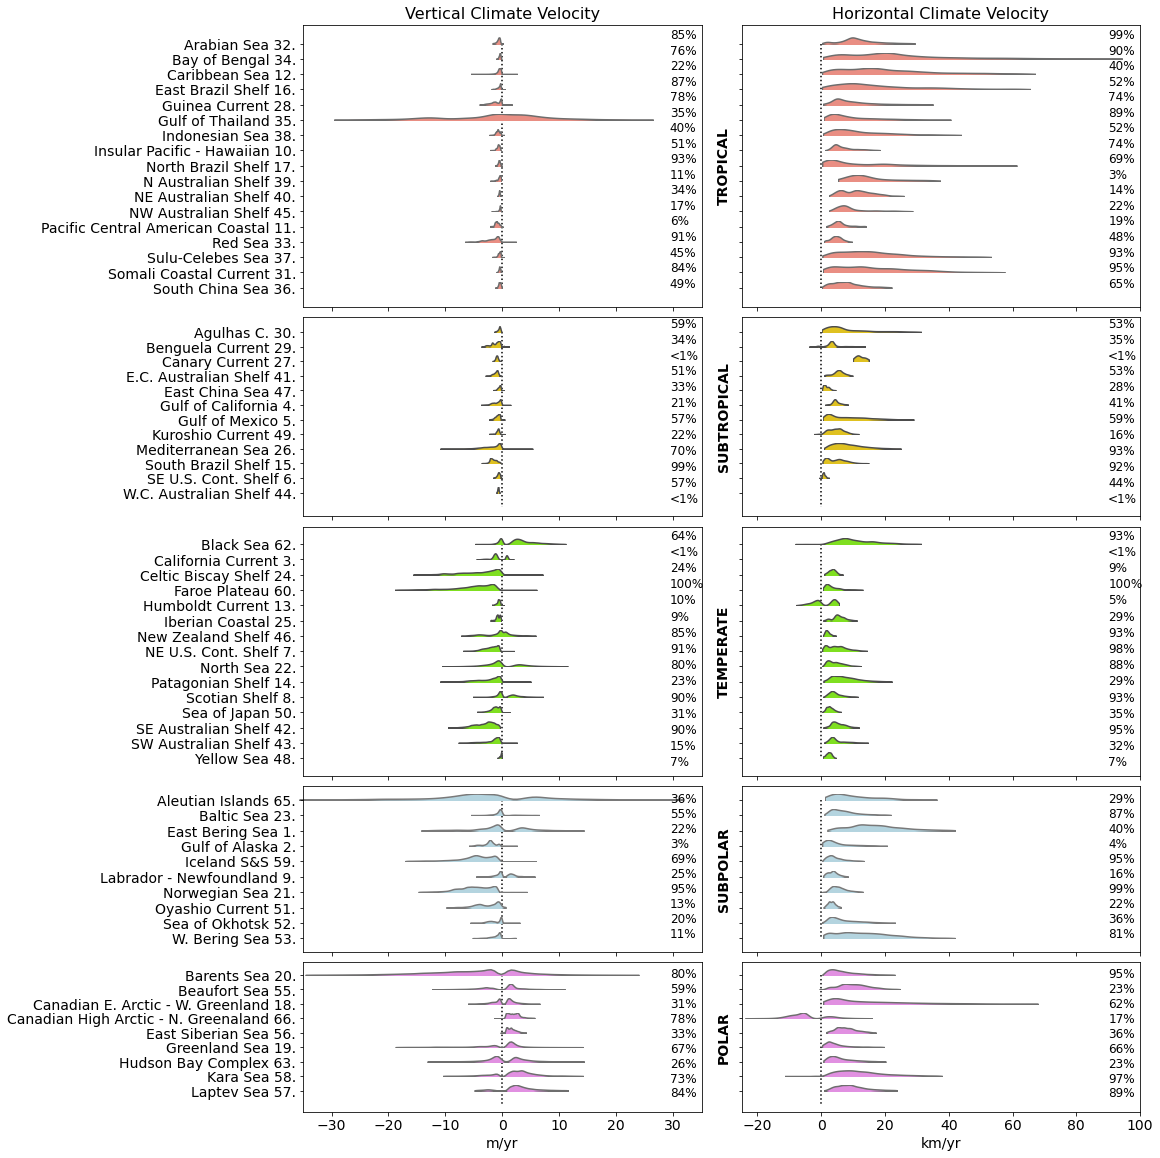

In [32]:
# Alphabetical
from matplotlib import gridspec

# create a figure
fig = plt.figure()
 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(20)
 
# set width of each subplot as 8
fig.set_figwidth(15)
 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=5, width_ratios=[1,1], 
                         wspace=0.1,
                         hspace=0.05, height_ratios=[17/63, 12/63, 15/63, 10/63, 9/63])



#fig, axes= plt.subplots(nrows = 5, ncols = 2, figsize = [15,20], sharex='col')

labels1 = ['Arabian Sea 32.', 'Bay of Bengal 34.', 'Caribbean Sea 12.', 'East Brazil Shelf 16.', 'Guinea Current 28.', 'Gulf of Thailand 35.','Indonesian Sea 38.','Insular Pacific - Hawaiian 10.','North Brazil Shelf 17.','N Australian Shelf 39.','NE Australian Shelf 40.','NW Australian Shelf 45.', 'Pacific Central American Coastal 11.', 'Red Sea 33.', 'Sulu-Celebes Sea 37.', 'Somali Coastal Current 31.','South China Sea 36.']
labels1h = ['','',              '','',              '','','','', '','','','',              '',               '',               '',               '','']

labels2 = ['Agulhas C. 30.', 'Benguela Current 29.','Canary Current 27.','E.C. Australian Shelf 41.', 'East China Sea 47.','Gulf of California 4.', 'Gulf of Mexico 5.', 'Kuroshio Current 49.','Mediterranean Sea 26.', 'South Brazil Shelf 15.', 'SE U.S. Cont. Shelf 6.', 'W.C. Australian Shelf 44.']
labels2h = ['','','','','','','','','','','','']

labels3 = ['Black Sea 62.','California Current 3.', 'Celtic Biscay Shelf 24.', 'Faroe Plateau 60.', 'Humboldt Current 13.', 'Iberian Coastal 25.', 'New Zealand Shelf 46.', 'NE U.S. Cont. Shelf 7.', 'North Sea 22.', 'Patagonian Shelf 14.', 'Scotian Shelf 8.', 'Sea of Japan 50.', 'SE Australian Shelf 42.', 'SW Australian Shelf 43.','Yellow Sea 48.']
labels3h = ['','','','','','','','','','','','','','','']

labels4 = ['Aleutian Islands 65.', 'Baltic Sea 23.', 'East Bering Sea 1.','Gulf of Alaska 2.','Iceland S&S 59.','Labrador - Newfoundland 9.','Norwegian Sea 21.', 'Oyashio Current 51.', 'Sea of Okhotsk 52.', 'W. Bering Sea 53.']
labels4h = ['','','','','','','','','','']

labels5 = ['Barents Sea 20.','Beaufort Sea 55.','Canadian E. Arctic - W. Greenland 18.', 'Canadian High Arctic - N. Greenaland 66.', 'East Siberian Sea 56.', 'Greenland Sea 19.', 'Hudson Bay Complex 63.', 'Kara Sea 58.', 'Laptev Sea 57.']
labels5h = ['','','','','','','','','']

#tropical
ax0 = fig.add_subplot(spec[0])                
sns.violinplot([bp_min_max(barbss, ARBS_Vs),
                      bp_min_max(bbobes, BOBE_Vs),
                      bp_min_max(bcaris, CARI_Vs),
                      bp_min_max(bebrss, EBRS_Vs),
                      bp_min_max(bguics, GUIC_Vs),
                      bp_min_max(bgoths, GOTH_Vs),
                      bp_min_max(bindos, INDO_Vs),
                      bp_min_max(biphas, IPHA_Vs),
                      bp_min_max(bnbrss, NBRS_Vs),
                      bp_min_max(bnauss, NAUS_Vs),
                      bp_min_max(bneass, NEAS_Vs),
                      bp_min_max(bnwass, NWAS_Vs),
                      bp_min_max(bpcacs, PCAC_Vs),
                      bp_min_max(bredss, REDS_Vs),
                      bp_min_max(bscbss, SCBS_Vs),
                      bp_min_max(bsoccs, SOCC_Vs),
                      bp_min_max(bschss, SCHS_Vs)],
                    scale = 'width', color='salmon', 
                    cut=0, inner=None, orient = 'h', ax = ax0
                     #alpha = 0.5,
               ,vmin = -5, vmax = 5)

for item in ax0.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax0.transData))
num_items = len(ax0.collections)

ax0.set_yticklabels(labels1, fontsize = 14)#, 'SON','DJF', 'MAM', 'JJA', 'SON','DJF', 'MAM', 'JJA', 'SON','DJF', 'MAM', 'JJA', 'SON'], fontsize = 14)
ax0.set_title('Vertical Climate Velocity',fontsize = 16)
ax0.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], c = 'k', linestyle = ':', zorder = 0 )
ax0.set_xlim([-35,35])
ax0.set_xticklabels('')
#ax0.text(-0.1, 0.95, transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(trop_nums)):
    ax0.text(0.92, 0.95 - 0.055*i, str(round(percent_sig.vert[percent_sig.number == trop_nums[i]].values[0])) + '%', transform=ax0.transAxes,fontsize = 12)#, weight = 'bold')

ax5 = fig.add_subplot(spec[1])  
sns.violinplot([bp_min_max(barbshs, ARBS_Hs),
                      bp_min_max(bbobehs, BOBE_Hs),
                      bp_min_max(bcarihs, CARI_Hs),
                      bp_min_max(bebrshs, EBRS_Hs),
                      bp_min_max(bguichs, GUIC_Hs),
                      bp_min_max(bgothhs, GOTH_Hs),
                      bp_min_max(bindohs, INDO_Hs),
                      bp_min_max(biphahs, IPHA_Hs),
                      bp_min_max(bnbrshs, NBRS_Hs),
                      bp_min_max(bnaushs, NAUS_Hs),
                      bp_min_max(bneashs, NEAS_Hs),
                      bp_min_max(bnwashs, NWAS_Hs),
                      bp_min_max(bpcachs, PCAC_Hs),
                      bp_min_max(bredshs, REDS_Hs),
                      bp_min_max(bscbshs, SCBS_Hs),
                      bp_min_max(bsocchs, SOCC_Hs),
                      bp_min_max(bschshs, SCHS_Hs)],
                    scale = 'width', color='salmon', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax5,vmin = -5, vmax = 5)

for item in ax5.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax5.transData))
num_items = len(ax5.collections)

ax5.set_title('Horizontal Climate Velocity',fontsize = 16)
ax5.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], c = 'k', linestyle = ':', zorder = 0 )
ax5.set_xlim([-25,100])
ax5.set_xticklabels('')
ax5.set_yticklabels('')
ax5.set_ylabel('TROPICAL', fontsize = 14, weight = 'bold')
ax5.yaxis.set_label_position("left")
#ax0.text(-0.1, 0.95, 'Tropical', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(trop_nums)):
    ax5.text(0.92, 0.95 - 0.055*i, str(round(percent_sig.hori[percent_sig.number == trop_nums[i]].values[0])) + '%', transform=ax5.transAxes,fontsize = 12)#, weight = 'bold')



ax1 = fig.add_subplot(spec[2])  
sns.violinplot([bp_min_max(baguls, AGUL_Vs),
                      bp_min_max(bbengs, BENG_Vs),
                      bp_min_max(bcanas, CANA_Vs),
                      bp_min_max(becass, ECAS_Vs),
                      bp_min_max(bechss, ECHS_Vs),
                      bp_min_max(bgocas, GOCA_Vs),
                      bp_min_max(bgomes, GOME_Vs),
                      bp_min_max(bkuros, KURO_Vs),
                      bp_min_max(bmedss, MEDS_Vs),
                      bp_min_max(bsbrss, SBRS_Vs),
                      bp_min_max(bseuss, SEUS_Vs),
                      bp_min_max(bwcass, WCAS_Vs)],
                    scale = 'width', color='gold', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax1)

for item in ax1.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax1.transData))
num_items = len(ax1.collections)

ax1.set_yticklabels(labels2, fontsize = 14)
ax1.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12], c = 'k', linestyle = ':', zorder = 0 )
ax1.set_xlim([-35,35])
ax1.set_xticklabels('')
#ax1.text(-0.1, 0.45, 'Subtropical', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(s_trop_nums)):
    if str(round(percent_sig.hori[percent_sig.number == s_trop_nums[i]].values[0])) == '0':
        ax1.text(0.92, 0.95 - 0.08*i, '<1%', transform=ax1.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax1.text(0.92, 0.95 - 0.08*i, str(round(percent_sig.vert[percent_sig.number == s_trop_nums[i]].values[0])) + '%', transform=ax1.transAxes,fontsize = 12)#, weight = 'bold')


ax6 = fig.add_subplot(spec[3])  
sns.violinplot([bp_min_max(bagulhs, AGUL_Hs),
                      bp_min_max(bbenghs, BENG_Hs),
                      bp_min_max(bcanahs, CANA_Hs),
                      bp_min_max(becashs, ECAS_Hs),
                      bp_min_max(bechshs, ECHS_Hs),
                      bp_min_max(bgocahs, GOCA_Hs),
                      bp_min_max(bgomehs, GOME_Hs),
                      bp_min_max(bkurohs, KURO_Hs),
                      bp_min_max(bmedshs, MEDS_Hs),
                      bp_min_max(bsbrshs, SBRS_Hs),
                      bp_min_max(bseushs, SEUS_Hs),
                      bp_min_max(bwcashs, WCAS_Hs)],
                    scale = 'width', color='gold', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax6)

for item in ax6.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax6.transData))
num_items = len(ax6.collections)

ax6.set_yticklabels('')
ax6.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12], c = 'k', linestyle = ':', zorder = 0 )
ax6.set_xlim([-25,100])
ax6.set_xticklabels('')
ax6.set_ylabel('SUBTROPICAL', fontsize = 14, weight = 'bold')
ax6.yaxis.set_label_position("left")
for i in range(len(s_trop_nums)):
    if str(round(percent_sig.hori[percent_sig.number == s_trop_nums[i]].values[0])) == '0':
        ax6.text(0.92, 0.95 - 0.08*i, '<1%', transform=ax6.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax6.text(0.92, 0.95 - 0.08*i, str(round(percent_sig.hori[percent_sig.number == s_trop_nums[i]].values[0])) + '%', transform=ax6.transAxes,fontsize = 12)#, weight = 'bold')

ax2 = fig.add_subplot(spec[4])  
sns.violinplot([bp_min_max(bblacs, BLAC_Vs),
                      bp_min_max(bcalis, CALI_Vs),
                      bp_min_max(bcebss, CEBS_Vs),
                      bp_min_max(bfaros, FARO_Vs),
                      bp_min_max(bhumbs, HUMB_Vs),
                      bp_min_max(bibers, IBER_Vs),
                      bp_min_max(bpatss, PATS_Vs),
                      bp_min_max(bnzess, NZES_Vs),
                      bp_min_max(bneuss, NEUS_Vs),
                      bp_min_max(bnseas, NSEA_Vs),
                      bp_min_max(bscoss, SCOS_Vs),
                      bp_min_max(bsojas, SOJA_Vs),
                      bp_min_max(bseass, SEAS_Vs), 
                      bp_min_max(bswass, SWAS_Vs), 
                      bp_min_max(byells, YELL_Vs)],
                    scale = 'width', color='chartreuse', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax2)

for item in ax2.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax2.transData))
num_items = len(ax2.collections)

ax2.set_yticklabels(labels3, fontsize = 14)
ax2.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], c = 'k', linestyle = ':', zorder = 0 )
ax2.set_xlim([-35,35])
ax2.set_xticklabels('')
#ax2.text(-0.1, 0.35, 'Temperate', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(temp_nums)):
    if str(round(percent_sig.hori[percent_sig.number == temp_nums[i]].values[0])) == '0':
        ax2.text(0.92, 0.95 - 0.065*i, '<1%', transform=ax2.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax2.text(0.92, 0.95 - 0.065*i, str(round(percent_sig.vert[percent_sig.number == temp_nums[i]].values[0])) + '%', transform=ax2.transAxes,fontsize = 12)#, weight = 'bold')


ax7 = fig.add_subplot(spec[5])  
sns.violinplot([bp_min_max(bblachs, BLAC_Hs),
                      bp_min_max(bcalihs, CALI_Hs),
                      bp_min_max(bcebshs, CEBS_Hs),
                      bp_min_max(bfarohs, FARO_Hs),
                      bp_min_max(bhumbhs, HUMB_Hs),
                      bp_min_max(biberhs, IBER_Hs),
                      bp_min_max(bpatshs, PATS_Hs),
                      bp_min_max(bnzeshs, NZES_Hs),
                      bp_min_max(bneushs, NEUS_Hs),
                      bp_min_max(bnseahs, NSEA_Hs),
                      bp_min_max(bscoshs, SCOS_Hs),
                      bp_min_max(bsojahs, SOJA_Hs),
                      bp_min_max(bseashs, SEAS_Hs), 
                      bp_min_max(bswashs, SWAS_Hs), 
                      bp_min_max(byellhs, YELL_Hs)],
                    scale = 'width', color='chartreuse', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax7)

for item in ax7.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax7.transData))
num_items = len(ax7.collections)

ax7.set_yticklabels('')
ax7.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], c = 'k', linestyle = ':', zorder = 0 )
ax7.set_xlim([-25,100])
ax7.set_xticklabels('')
ax7.set_ylabel('TEMPERATE', fontsize = 14, weight = 'bold')
ax7.yaxis.set_label_position("left")
for i in range(len(temp_nums)):
    if str(round(percent_sig.hori[percent_sig.number == temp_nums[i]].values[0])) == '0':
        ax7.text(0.92, 0.95 - 0.065*i, '<1%', transform=ax7.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax7.text(0.92, 0.95 - 0.065*i, str(round(percent_sig.hori[percent_sig.number == temp_nums[i]].values[0])) + '%', transform=ax7.transAxes,fontsize = 12)#, weight = 'bold')


ax3 = fig.add_subplot(spec[6]) 
sns.violinplot([bp_min_max(baleus, ALEU_Vs),
                      bp_min_max(bbalts, BALT_Vs),
                      bp_min_max(bebess, EBES_Vs),
                      bp_min_max(bgoals, GOAL_Vs),
                      bp_min_max(bicess, ICES_Vs), 
                      bp_min_max(blabns, LABN_Vs),
                      bp_min_max(bnorss, NORS_Vs),
                      bp_min_max(boyacs, OYAC_Vs),
                      bp_min_max(bsooks, SOOK_Vs),
                      bp_min_max(bwbess, WBES_Vs)],
                    scale = 'width', color='lightblue', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax3)

for item in ax3.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax3.transData))
num_items = len(ax3.collections)
ax3.set_yticklabels(labels4, fontsize = 14)
ax3.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax3.set_xlim([-35,35])
ax3.set_xticklabels('')
#ax3.text(-0.1, 0.25, 'Subpolar', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(s_pol_nums)):
    ax3.text(0.92, 0.9 - 0.09*i, str(round(percent_sig.vert[percent_sig.number == s_pol_nums[i]].values[0])) + '%', transform=ax3.transAxes,fontsize = 12)#, weight = 'bold')



ax8 = fig.add_subplot(spec[7]) 
sns.violinplot([bp_min_max(baleuhs, ALEU_Hs),
                      bp_min_max(bbalths, BALT_Hs),
                      bp_min_max(bebeshs, EBES_Hs),
                      bp_min_max(bgoalhs, GOAL_Hs),
                      bp_min_max(biceshs, ICES_Hs), 
                      bp_min_max(blabnhs, LABN_Hs),
                      bp_min_max(bnorshs, NORS_Hs),
                      bp_min_max(boyachs, OYAC_Hs),
                      bp_min_max(bsookhs, SOOK_Hs),
                      bp_min_max(bwbeshs, WBES_Hs)],                    scale = 'width', color='lightblue', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax8)

for item in ax8.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax8.transData))
num_items = len(ax8.collections)

ax8.set_yticklabels('')
ax8.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax8.set_xlim([-25,100])
ax8.set_xticklabels('')
ax8.set_ylabel('SUBPOLAR', fontsize = 14, weight = 'bold')
ax8.yaxis.set_label_position("left")
for i in range(len(s_pol_nums)):
    ax8.text(0.92, 0.9 - 0.09*i, str(round(percent_sig.hori[percent_sig.number == s_pol_nums[i]].values[0])) + '%', transform=ax8.transAxes,fontsize = 12)#, weight = 'bold')


ax4 = fig.add_subplot(spec[8]) 
sns.violinplot([bp_min_max(bbares, BARE_Vs),
                      bp_min_max(bbeaus, BEAU_Vs),
                      bp_min_max(bceaws, CEAW_Vs),
                      bp_min_max(bchans, CHAN_Vs),
                      bp_min_max(besiss, ESIS_Vs),
                      bp_min_max(bgrees, GREE_Vs),
                      bp_min_max(bhubcs, HUBC_Vs),
                      bp_min_max(bkaras, KARA_Vs),
                      bp_min_max(blapss, LAPS_Vs)],
                    scale = 'width', color='violet', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax4)

for item in ax4.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax4.transData))
num_items = len(ax4.collections)
ax4.set_yticklabels(labels5)
ax4.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax4.set_xlabel('m/yr', fontsize = 14)
ax4.set_xlim([-35,35])
ax4.tick_params(labelsize = 14)
#ax4.text(-0.1, 0.05, 'Polar', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(polar_nums)):
    ax4.text(0.92, 0.9 - 0.1*i, str(round(percent_sig.vert[percent_sig.number == polar_nums[i]].values[0])) + '%', transform=ax4.transAxes,fontsize = 12)#, weight = 'bold')


ax9 = fig.add_subplot(spec[9]) 
sns.violinplot([bp_min_max(bbarehs, BARE_Hs),
                      bp_min_max(bbeauhs, BEAU_Hs),
                      bp_min_max(bceawhs, CEAW_Hs),
                      bp_min_max(bchanhs, CHAN_Hs),
                      bp_min_max(besishs, ESIS_Hs),
                      bp_min_max(bgreehs, GREE_Hs),
                      bp_min_max(bhubchs, HUBC_Hs),
                      bp_min_max(bkarahs, KARA_Hs),
                      bp_min_max(blapshs, LAPS_Hs)],
                    scale = 'width', color='violet', 
                    cut=0, inner=None, orient = 'h', 
                     #alpha = 0.5, 
                     ax = ax9)

for item in ax9.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax9.transData))
num_items = len(ax9.collections)

ax9.set_yticklabels('')
ax9.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax9.set_xlabel('km/yr', fontsize = 14)
ax9.set_xlim([-25,100])
ax9.tick_params(labelsize = 14)
ax9.set_ylabel('POLAR', fontsize = 14, weight = 'bold')
ax9.yaxis.set_label_position("left")
for i in range(len(polar_nums)):
    if str(round(percent_sig.hori[percent_sig.number == polar_nums[i]].values[0])) == '0':
        ax9.text(0.92, 0.9 - 0.1*i, '<1%', transform=ax9.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax9.text(0.92, 0.9 - 0.1*i, str(round(percent_sig.hori[percent_sig.number == polar_nums[i]].values[0])) + '%', transform=ax9.transAxes,fontsize = 12)#, weight = 'bold')


## 8. Figure S2

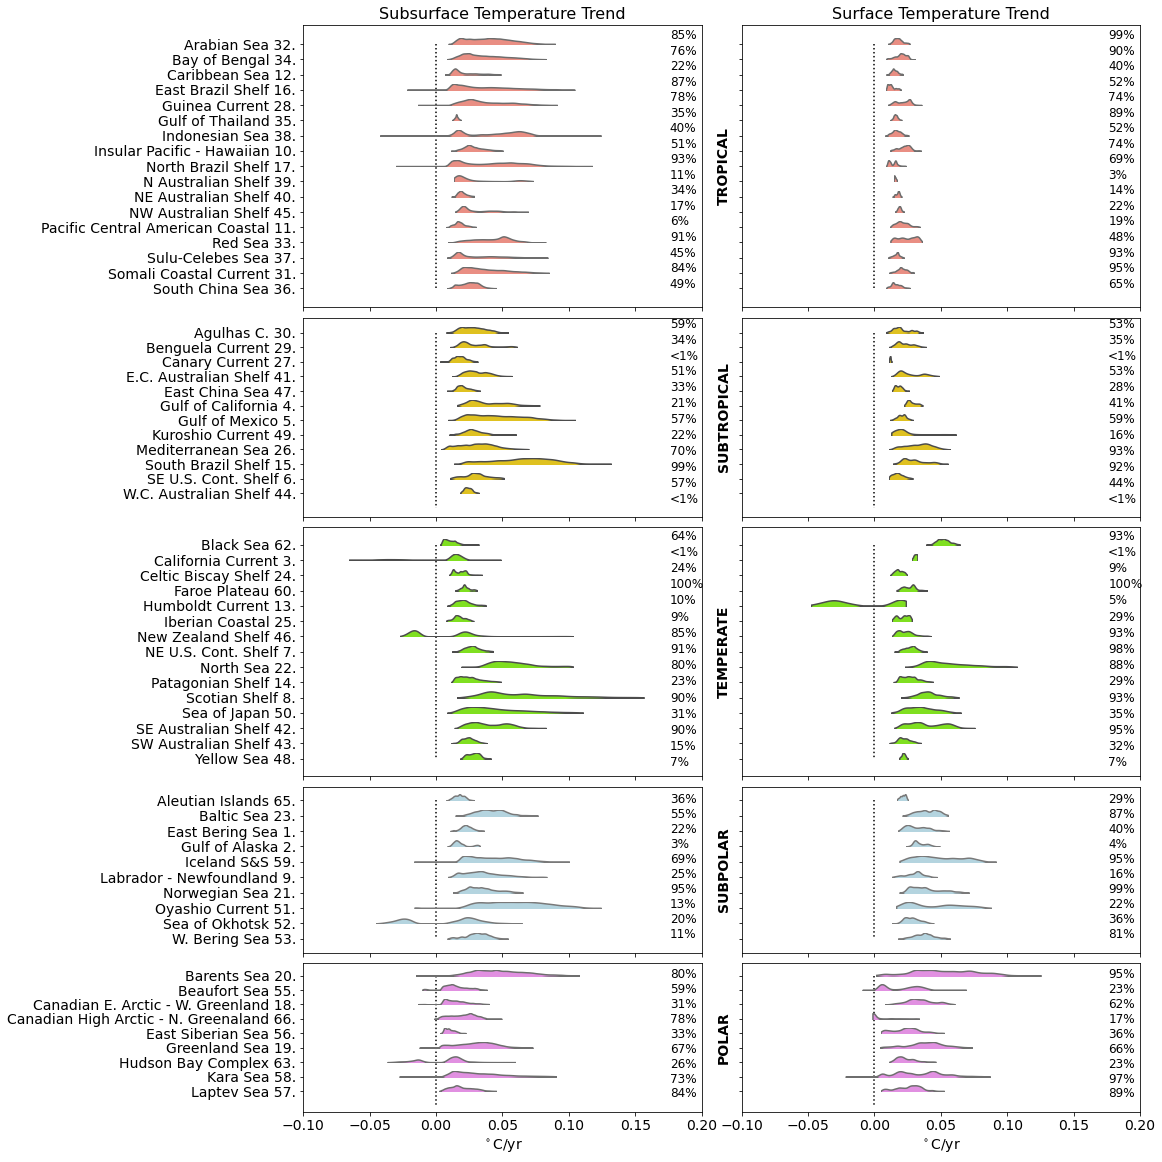

In [33]:
# Alphabetical

lims = [-0.1, 0.2]

from matplotlib import gridspec

# create a figure
fig = plt.figure()
 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(20)
 
# set width of each subplot as 8
fig.set_figwidth(15)
 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=5, width_ratios=[1,1], 
                         wspace=0.1,
                         hspace=0.05, height_ratios=[17/63, 12/63, 15/63, 10/63, 9/63])



#fig, axes= plt.subplots(nrows = 5, ncols = 2, figsize = [15,20], sharex='col')

labels1 = ['Arabian Sea 32.', 'Bay of Bengal 34.', 'Caribbean Sea 12.', 'East Brazil Shelf 16.', 'Guinea Current 28.', 'Gulf of Thailand 35.','Indonesian Sea 38.','Insular Pacific - Hawaiian 10.','North Brazil Shelf 17.','N Australian Shelf 39.','NE Australian Shelf 40.','NW Australian Shelf 45.', 'Pacific Central American Coastal 11.', 'Red Sea 33.', 'Sulu-Celebes Sea 37.', 'Somali Coastal Current 31.','South China Sea 36.']
labels1h = ['','',              '','',              '','','','', '','','','',              '',               '',               '',               '','']

labels2 = ['Agulhas C. 30.', 'Benguela Current 29.','Canary Current 27.','E.C. Australian Shelf 41.', 'East China Sea 47.','Gulf of California 4.', 'Gulf of Mexico 5.', 'Kuroshio Current 49.','Mediterranean Sea 26.', 'South Brazil Shelf 15.', 'SE U.S. Cont. Shelf 6.', 'W.C. Australian Shelf 44.']
labels2h = ['','','','','','','','','','','','']

labels3 = ['Black Sea 62.','California Current 3.', 'Celtic Biscay Shelf 24.', 'Faroe Plateau 60.', 'Humboldt Current 13.', 'Iberian Coastal 25.', 'New Zealand Shelf 46.', 'NE U.S. Cont. Shelf 7.', 'North Sea 22.', 'Patagonian Shelf 14.', 'Scotian Shelf 8.', 'Sea of Japan 50.', 'SE Australian Shelf 42.', 'SW Australian Shelf 43.','Yellow Sea 48.']
labels3h = ['','','','','','','','','','','','','','','']

labels4 = ['Aleutian Islands 65.', 'Baltic Sea 23.', 'East Bering Sea 1.','Gulf of Alaska 2.','Iceland S&S 59.','Labrador - Newfoundland 9.','Norwegian Sea 21.', 'Oyashio Current 51.', 'Sea of Okhotsk 52.', 'W. Bering Sea 53.']
labels4h = ['','','','','','','','','','']

labels5 = ['Barents Sea 20.','Beaufort Sea 55.','Canadian E. Arctic - W. Greenland 18.', 'Canadian High Arctic - N. Greenaland 66.', 'East Siberian Sea 56.', 'Greenland Sea 19.', 'Hudson Bay Complex 63.', 'Kara Sea 58.', 'Laptev Sea 57.']
labels5h = ['','','','','','','','','']

#tropical
ax0 = fig.add_subplot(spec[0])                
sns.violinplot([bp_min_max(barbss_tt, ARBS_tt_Vs),
                      bp_min_max(bbobes_tt, BOBE_tt_Vs),
                      bp_min_max(bcaris_tt, CARI_tt_Vs),
                      bp_min_max(bebrss_tt, EBRS_tt_Vs),
                      bp_min_max(bguics_tt, GUIC_tt_Vs),
                      bp_min_max(bgoths_tt, GOTH_tt_Vs),
                      bp_min_max(bindos_tt, INDO_tt_Vs),
                      bp_min_max(biphas_tt, IPHA_tt_Vs),
                      bp_min_max(bnbrss_tt, NBRS_tt_Vs),
                      bp_min_max(bnauss_tt, NAUS_tt_Vs),
                      bp_min_max(bneass_tt, NEAS_tt_Vs),
                      bp_min_max(bnwass_tt, NWAS_tt_Vs),
                      bp_min_max(bpcacs_tt, PCAC_tt_Vs),
                      bp_min_max(bredss_tt, REDS_tt_Vs),
                      bp_min_max(bscbss_tt, SCBS_tt_Vs),
                      bp_min_max(bsoccs_tt, SOCC_tt_Vs),
                      bp_min_max(bschss_tt, SCHS_tt_Vs)],
                    scale = 'width', color='salmon', 
                    cut=0, inner=None, orient = 'h', ax = ax0
                     #alpha = 0.5,
               ,vmin = -5, vmax = 5)

for item in ax0.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax0.transData))
num_items = len(ax0.collections)

ax0.set_yticklabels(labels1, fontsize = 14)#, 'SON','DJF', 'MAM', 'JJA', 'SON','DJF', 'MAM', 'JJA', 'SON','DJF', 'MAM', 'JJA', 'SON'], fontsize = 14)
ax0.set_title('Subsurface Temperature Trend',fontsize = 16)
ax0.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], c = 'k', linestyle = ':', zorder = 0 )
ax0.set_xlim(lims)
ax0.set_xticklabels('')
#ax0.text(-0.1, 0.95, transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(trop_nums)):
    ax0.text(0.92, 0.95 - 0.055*i, str(round(percent_sig.vert[percent_sig.number == trop_nums[i]].values[0])) + '%', transform=ax0.transAxes,fontsize = 12)#, weight = 'bold')

ax5 = fig.add_subplot(spec[1])  
sns.violinplot([bp_min_max(barbshs_tt, ARBS__tt_Hs),
                      bp_min_max(bbobehs_tt, BOBE__tt_Hs),
                      bp_min_max(bcarihs_tt, CARI__tt_Hs),
                      bp_min_max(bebrshs_tt, EBRS__tt_Hs),
                      bp_min_max(bguichs_tt, GUIC__tt_Hs),
                      bp_min_max(bgothhs_tt, GOTH__tt_Hs),
                      bp_min_max(bindohs_tt, INDO__tt_Hs),
                      bp_min_max(biphahs_tt, IPHA__tt_Hs),
                      bp_min_max(bnbrshs_tt, NBRS__tt_Hs),
                      bp_min_max(bnaushs_tt, NAUS__tt_Hs),
                      bp_min_max(bneashs_tt, NEAS__tt_Hs),
                      bp_min_max(bnwashs_tt, NWAS__tt_Hs),
                      bp_min_max(bpcachs_tt, PCAC__tt_Hs),
                      bp_min_max(bredshs_tt, REDS__tt_Hs),
                      bp_min_max(bscbshs_tt, SCBS__tt_Hs),
                      bp_min_max(bsocchs_tt, SOCC__tt_Hs),
                      bp_min_max(bschshs_tt, SCHS__tt_Hs)],
                    scale = 'width', color='salmon', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax5,vmin = -5, vmax = 5)

for item in ax5.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax5.transData))
num_items = len(ax5.collections)

ax5.set_title('Surface Temperature Trend',fontsize = 16)
ax5.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], c = 'k', linestyle = ':', zorder = 0 )
ax5.set_xlim(lims)
ax5.set_xticklabels('')
ax5.set_yticklabels('')
ax5.set_ylabel('TROPICAL', fontsize = 14, weight = 'bold')
ax5.yaxis.set_label_position("left")
#ax0.text(-0.1, 0.95, 'Tropical', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(trop_nums)):
    ax5.text(0.92, 0.95 - 0.055*i, str(round(percent_sig.hori[percent_sig.number == trop_nums[i]].values[0])) + '%', transform=ax5.transAxes,fontsize = 12)#, weight = 'bold')



ax1 = fig.add_subplot(spec[2])  
sns.violinplot([bp_min_max(baguls_tt, AGUL_tt_Vs),
                      bp_min_max(bbengs_tt, BENG_tt_Vs),
                      bp_min_max(bcanas_tt, CANA_tt_Vs),
                      bp_min_max(becass_tt, ECAS_tt_Vs),
                      bp_min_max(bechss_tt, ECHS_tt_Vs),
                      bp_min_max(bgocas_tt, GOCA_tt_Vs),
                      bp_min_max(bgomes_tt, GOME_tt_Vs),
                      bp_min_max(bkuros_tt, KURO_tt_Vs),
                      bp_min_max(bmedss_tt, MEDS_tt_Vs),
                      bp_min_max(bsbrss_tt, SBRS_tt_Vs),
                      bp_min_max(bseuss_tt, SEUS_tt_Vs),
                      bp_min_max(bwcass_tt, WCAS_tt_Vs)],
                    scale = 'width', color='gold', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax1)

for item in ax1.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax1.transData))
num_items = len(ax1.collections)

ax1.set_yticklabels(labels2, fontsize = 14)
ax1.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12], c = 'k', linestyle = ':', zorder = 0 )
ax1.set_xlim(lims)
ax1.set_xticklabels('')
#ax1.text(-0.1, 0.45, 'Subtropical', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(s_trop_nums)):
    if str(round(percent_sig.hori[percent_sig.number == s_trop_nums[i]].values[0])) == '0':
        ax1.text(0.92, 0.95 - 0.08*i, '<1%', transform=ax1.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax1.text(0.92, 0.95 - 0.08*i, str(round(percent_sig.vert[percent_sig.number == s_trop_nums[i]].values[0])) + '%', transform=ax1.transAxes,fontsize = 12)#, weight = 'bold')


ax6 = fig.add_subplot(spec[3])  
sns.violinplot([bp_min_max(bagulhs_tt, AGUL__tt_Hs),
                      bp_min_max(bbenghs_tt, BENG__tt_Hs),
                      bp_min_max(bcanahs_tt, CANA__tt_Hs),
                      bp_min_max(becashs_tt, ECAS__tt_Hs),
                      bp_min_max(bechshs_tt, ECHS__tt_Hs),
                      bp_min_max(bgocahs_tt, GOCA__tt_Hs),
                      bp_min_max(bgomehs_tt, GOME__tt_Hs),
                      bp_min_max(bkurohs_tt, KURO__tt_Hs),
                      bp_min_max(bmedshs_tt, MEDS__tt_Hs),
                      bp_min_max(bsbrshs_tt, SBRS__tt_Hs),
                      bp_min_max(bseushs_tt, SEUS__tt_Hs),
                      bp_min_max(bwcashs_tt, WCAS__tt_Hs)],
                    scale = 'width', color='gold', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax6)

for item in ax6.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax6.transData))
num_items = len(ax6.collections)

ax6.set_yticklabels('')
ax6.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12], c = 'k', linestyle = ':', zorder = 0 )
ax6.set_xlim(lims)
ax6.set_xticklabels('')
ax6.set_ylabel('SUBTROPICAL', fontsize = 14, weight = 'bold')
ax6.yaxis.set_label_position("left")
for i in range(len(s_trop_nums)):
    if str(round(percent_sig.hori[percent_sig.number == s_trop_nums[i]].values[0])) == '0':
        ax6.text(0.92, 0.95 - 0.08*i, '<1%', transform=ax6.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax6.text(0.92, 0.95 - 0.08*i, str(round(percent_sig.hori[percent_sig.number == s_trop_nums[i]].values[0])) + '%', transform=ax6.transAxes,fontsize = 12)#, weight = 'bold')

ax2 = fig.add_subplot(spec[4])  
sns.violinplot([bp_min_max(bblacs_tt, BLAC_tt_Vs),
                      bp_min_max(bcalis_tt, CALI_tt_Vs),
                      bp_min_max(bcebss_tt, CEBS_tt_Vs),
                      bp_min_max(bfaros_tt, FARO_tt_Vs),
                      bp_min_max(bhumbs_tt, HUMB_tt_Vs),
                      bp_min_max(bibers_tt, IBER_tt_Vs),
                      bp_min_max(bpatss_tt, PATS_tt_Vs),
                      bp_min_max(bnzess_tt, NZES_tt_Vs),
                      bp_min_max(bneuss_tt, NEUS_tt_Vs),
                      bp_min_max(bnseas_tt, NSEA_tt_Vs),
                      bp_min_max(bscoss_tt, SCOS_tt_Vs),
                      bp_min_max(bsojas_tt, SOJA_tt_Vs),
                      bp_min_max(bseass_tt, SEAS_tt_Vs), 
                      bp_min_max(bswass_tt, SWAS_tt_Vs), 
                      bp_min_max(byells_tt, YELL_tt_Vs)],
                    scale = 'width', color='chartreuse', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax2)

for item in ax2.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax2.transData))
num_items = len(ax2.collections)

ax2.set_yticklabels(labels3, fontsize = 14)
ax2.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], c = 'k', linestyle = ':', zorder = 0 )
ax2.set_xlim(lims)
ax2.set_xticklabels('')
#ax2.text(-0.1, 0.35, 'Temperate', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(temp_nums)):
    if str(round(percent_sig.hori[percent_sig.number == temp_nums[i]].values[0])) == '0':
        ax2.text(0.92, 0.95 - 0.065*i, '<1%', transform=ax2.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax2.text(0.92, 0.95 - 0.065*i, str(round(percent_sig.vert[percent_sig.number == temp_nums[i]].values[0])) + '%', transform=ax2.transAxes,fontsize = 12)#, weight = 'bold')


ax7 = fig.add_subplot(spec[5])  
sns.violinplot([bp_min_max(bblachs_tt, BLAC__tt_Hs),
                      bp_min_max(bcalihs_tt, CALI__tt_Hs),
                      bp_min_max(bcebshs_tt, CEBS__tt_Hs),
                      bp_min_max(bfarohs_tt, FARO__tt_Hs),
                      bp_min_max(bhumbhs_tt, HUMB__tt_Hs),
                      bp_min_max(biberhs_tt, IBER__tt_Hs),
                      bp_min_max(bpatshs_tt, PATS__tt_Hs),
                      bp_min_max(bnzeshs_tt, NZES__tt_Hs),
                      bp_min_max(bneushs_tt, NEUS__tt_Hs),
                      bp_min_max(bnseahs_tt, NSEA__tt_Hs),
                      bp_min_max(bscoshs_tt, SCOS__tt_Hs),
                      bp_min_max(bsojahs_tt, SOJA__tt_Hs),
                      bp_min_max(bseashs_tt, SEAS__tt_Hs), 
                      bp_min_max(bswashs_tt, SWAS__tt_Hs), 
                      bp_min_max(byellhs_tt, YELL__tt_Hs)],
                    scale = 'width', color='chartreuse', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax7)

for item in ax7.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax7.transData))
num_items = len(ax7.collections)

ax7.set_yticklabels('')
ax7.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], c = 'k', linestyle = ':', zorder = 0 )
ax7.set_xlim(lims)
ax7.set_xticklabels('')
ax7.set_ylabel('TEMPERATE', fontsize = 14, weight = 'bold')
ax7.yaxis.set_label_position("left")
for i in range(len(temp_nums)):
    if str(round(percent_sig.hori[percent_sig.number == temp_nums[i]].values[0])) == '0':
        ax7.text(0.92, 0.95 - 0.065*i, '<1%', transform=ax7.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax7.text(0.92, 0.95 - 0.065*i, str(round(percent_sig.hori[percent_sig.number == temp_nums[i]].values[0])) + '%', transform=ax7.transAxes,fontsize = 12)#, weight = 'bold')


ax3 = fig.add_subplot(spec[6]) 
sns.violinplot([bp_min_max(baleus_tt, ALEU_tt_Vs),
                      bp_min_max(bbalts_tt, BALT_tt_Vs),
                      bp_min_max(bebess_tt, EBES_tt_Vs),
                      bp_min_max(bgoals_tt, GOAL_tt_Vs),
                      bp_min_max(bicess_tt, ICES_tt_Vs), 
                      bp_min_max(blabns_tt, LABN_tt_Vs),
                      bp_min_max(bnorss_tt, NORS_tt_Vs),
                      bp_min_max(boyacs_tt, OYAC_tt_Vs),
                      bp_min_max(bsooks_tt, SOOK_tt_Vs),
                      bp_min_max(bwbess_tt, WBES_tt_Vs)],
                    scale = 'width', color='lightblue', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax3)

for item in ax3.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax3.transData))
num_items = len(ax3.collections)
ax3.set_yticklabels(labels4, fontsize = 14)
ax3.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax3.set_xlim(lims)
ax3.set_xticklabels('')
#ax3.text(-0.1, 0.25, 'Subpolar', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(s_pol_nums)):
    ax3.text(0.92, 0.9 - 0.09*i, str(round(percent_sig.vert[percent_sig.number == s_pol_nums[i]].values[0])) + '%', transform=ax3.transAxes,fontsize = 12)#, weight = 'bold')



ax8 = fig.add_subplot(spec[7]) 
sns.violinplot([bp_min_max(baleuhs_tt, ALEU__tt_Hs),
                      bp_min_max(bbalths_tt, BALT__tt_Hs),
                      bp_min_max(bebeshs_tt, EBES__tt_Hs),
                      bp_min_max(bgoalhs_tt, GOAL__tt_Hs),
                      bp_min_max(biceshs_tt, ICES__tt_Hs), 
                      bp_min_max(blabnhs_tt, LABN__tt_Hs),
                      bp_min_max(bnorshs_tt, NORS__tt_Hs),
                      bp_min_max(boyachs_tt, OYAC__tt_Hs),
                      bp_min_max(bsookhs_tt, SOOK__tt_Hs),
                      bp_min_max(bwbeshs_tt, WBES__tt_Hs)],                    scale = 'width', color='lightblue', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax8)

for item in ax8.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax8.transData))
num_items = len(ax8.collections)

ax8.set_yticklabels('')
ax8.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax8.set_xlim(lims)
ax8.set_xticklabels('')
ax8.set_ylabel('SUBPOLAR', fontsize = 14, weight = 'bold')
ax8.yaxis.set_label_position("left")
for i in range(len(s_pol_nums)):
    ax8.text(0.92, 0.9 - 0.09*i, str(round(percent_sig.hori[percent_sig.number == s_pol_nums[i]].values[0])) + '%', transform=ax8.transAxes,fontsize = 12)#, weight = 'bold')


ax4 = fig.add_subplot(spec[8]) 
sns.violinplot([bp_min_max(bbares_tt, BARE_tt_Vs),
                      bp_min_max(bbeaus_tt, BEAU_tt_Vs),
                      bp_min_max(bceaws_tt, CEAW_tt_Vs),
                      bp_min_max(bchans_tt, CHAN_tt_Vs),
                      bp_min_max(besiss_tt, ESIS_tt_Vs),
                      bp_min_max(bgrees_tt, GREE_tt_Vs),
                      bp_min_max(bhubcs_tt, HUBC_tt_Vs),
                      bp_min_max(bkaras_tt, KARA_tt_Vs),
                      bp_min_max(blapss_tt, LAPS_tt_Vs)],
                    scale = 'width', color='violet', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax4)

for item in ax4.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax4.transData))
num_items = len(ax4.collections)
ax4.set_yticklabels(labels5)
ax4.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax4.set_xlabel('$^\circ$C/yr', fontsize = 14)
ax4.set_xlim(lims)
ax4.tick_params(labelsize = 14)
#ax4.text(-0.1, 0.05, 'Polar', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(polar_nums)):
    ax4.text(0.92, 0.9 - 0.1*i, str(round(percent_sig.vert[percent_sig.number == polar_nums[i]].values[0])) + '%', transform=ax4.transAxes,fontsize = 12)#, weight = 'bold')


ax9 = fig.add_subplot(spec[9]) 
sns.violinplot([bp_min_max(bbarehs_tt, BARE__tt_Hs),
                      bp_min_max(bbeauhs_tt, BEAU__tt_Hs),
                      bp_min_max(bceawhs_tt, CEAW__tt_Hs),
                      bp_min_max(bchanhs_tt, CHAN__tt_Hs),
                      bp_min_max(besishs_tt, ESIS__tt_Hs),
                      bp_min_max(bgreehs_tt, GREE__tt_Hs),
                      bp_min_max(bhubchs_tt, HUBC__tt_Hs),
                      bp_min_max(bkarahs_tt, KARA__tt_Hs),
                      bp_min_max(blapshs_tt, LAPS__tt_Hs)],
                    scale = 'width', color='violet', 
                    cut=0, inner=None, orient = 'h', 
                     #alpha = 0.5, 
                     ax = ax9)

for item in ax9.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax9.transData))
num_items = len(ax9.collections)

ax9.set_yticklabels('')
ax9.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax9.set_xlabel('$^\circ$C/yr', fontsize = 14)
ax9.set_xlim(lims)
ax9.tick_params(labelsize = 14)
ax9.set_ylabel('POLAR', fontsize = 14, weight = 'bold')
ax9.yaxis.set_label_position("left")
for i in range(len(polar_nums)):
    if str(round(percent_sig.hori[percent_sig.number == polar_nums[i]].values[0])) == '0':
        ax9.text(0.92, 0.9 - 0.1*i, '<1%', transform=ax9.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax9.text(0.92, 0.9 - 0.1*i, str(round(percent_sig.hori[percent_sig.number == polar_nums[i]].values[0])) + '%', transform=ax9.transAxes,fontsize = 12)#, weight = 'bold')


## 9. Figure S3

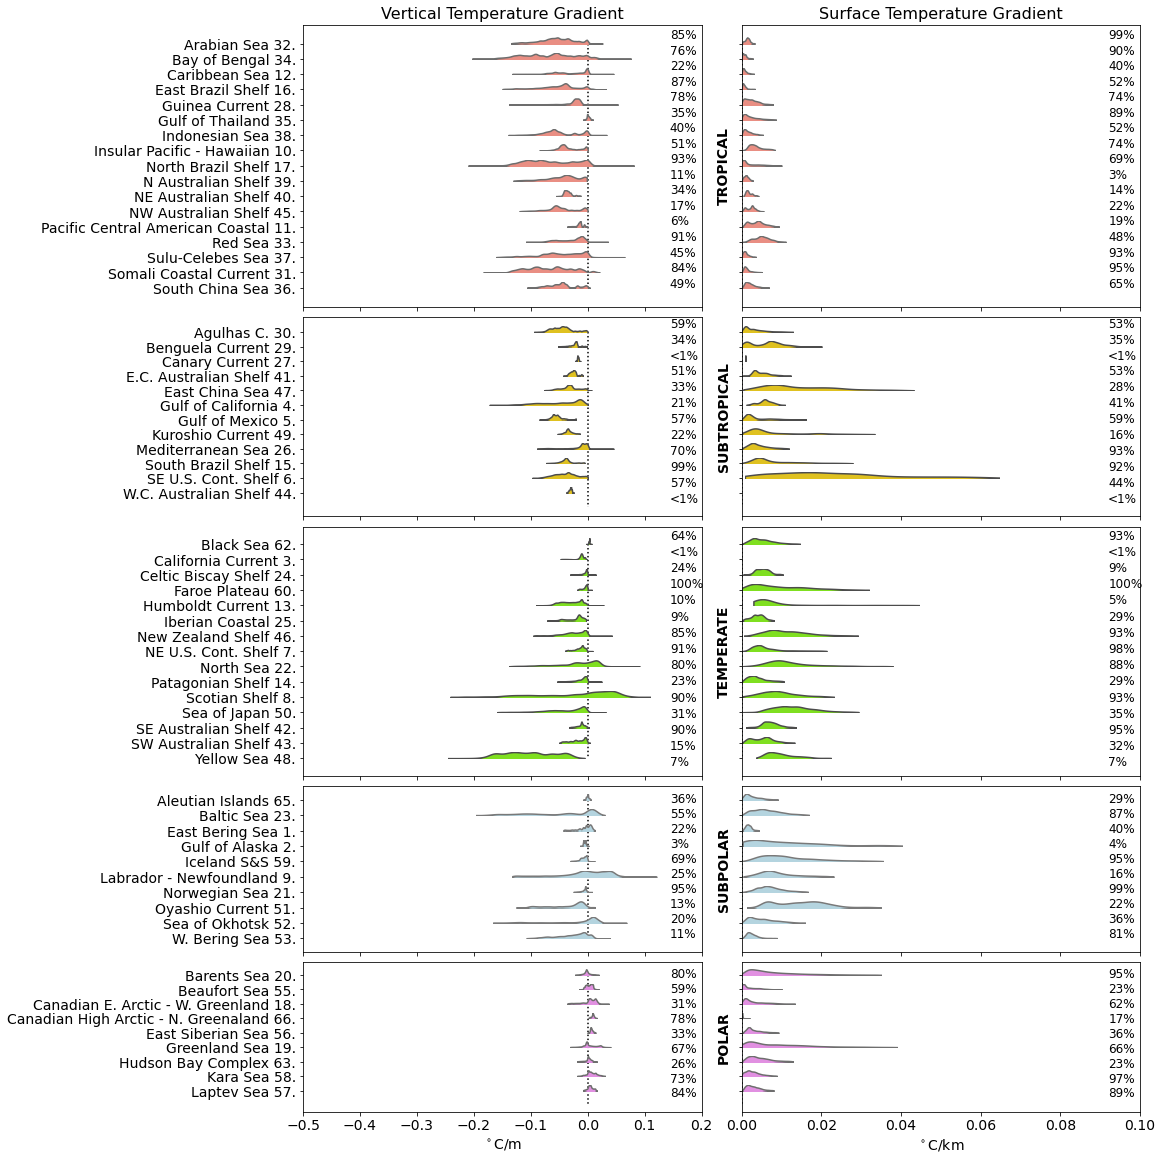

In [34]:
# Alphabetical
limsv = [-0.5, 0.2]
limsh = [0, 0.1]

from matplotlib import gridspec

# create a figure
fig = plt.figure()
 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(20)
 
# set width of each subplot as 8
fig.set_figwidth(15)
 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=5, width_ratios=[1,1], 
                         wspace=0.1,
                         hspace=0.05, height_ratios=[17/63, 12/63, 15/63, 10/63, 9/63])



#fig, axes= plt.subplots(nrows = 5, ncols = 2, figsize = [15,20], sharex='col')

labels1 = ['Arabian Sea 32.', 'Bay of Bengal 34.', 'Caribbean Sea 12.', 'East Brazil Shelf 16.', 'Guinea Current 28.', 'Gulf of Thailand 35.','Indonesian Sea 38.','Insular Pacific - Hawaiian 10.','North Brazil Shelf 17.','N Australian Shelf 39.','NE Australian Shelf 40.','NW Australian Shelf 45.', 'Pacific Central American Coastal 11.', 'Red Sea 33.', 'Sulu-Celebes Sea 37.', 'Somali Coastal Current 31.','South China Sea 36.']
labels1h = ['','',              '','',              '','','','', '','','','',              '',               '',               '',               '','']

labels2 = ['Agulhas C. 30.', 'Benguela Current 29.','Canary Current 27.','E.C. Australian Shelf 41.', 'East China Sea 47.','Gulf of California 4.', 'Gulf of Mexico 5.', 'Kuroshio Current 49.','Mediterranean Sea 26.', 'South Brazil Shelf 15.', 'SE U.S. Cont. Shelf 6.', 'W.C. Australian Shelf 44.']
labels2h = ['','','','','','','','','','','','']

labels3 = ['Black Sea 62.','California Current 3.', 'Celtic Biscay Shelf 24.', 'Faroe Plateau 60.', 'Humboldt Current 13.', 'Iberian Coastal 25.', 'New Zealand Shelf 46.', 'NE U.S. Cont. Shelf 7.', 'North Sea 22.', 'Patagonian Shelf 14.', 'Scotian Shelf 8.', 'Sea of Japan 50.', 'SE Australian Shelf 42.', 'SW Australian Shelf 43.','Yellow Sea 48.']
labels3h = ['','','','','','','','','','','','','','','']

labels4 = ['Aleutian Islands 65.', 'Baltic Sea 23.', 'East Bering Sea 1.','Gulf of Alaska 2.','Iceland S&S 59.','Labrador - Newfoundland 9.','Norwegian Sea 21.', 'Oyashio Current 51.', 'Sea of Okhotsk 52.', 'W. Bering Sea 53.']
labels4h = ['','','','','','','','','','']

labels5 = ['Barents Sea 20.','Beaufort Sea 55.','Canadian E. Arctic - W. Greenland 18.', 'Canadian High Arctic - N. Greenaland 66.', 'East Siberian Sea 56.', 'Greenland Sea 19.', 'Hudson Bay Complex 63.', 'Kara Sea 58.', 'Laptev Sea 57.']
labels5h = ['','','','','','','','','']

#tropical
ax0 = fig.add_subplot(spec[0])                
sns.violinplot([bp_min_max(barbss_sg, ARBS_sg_Vs),
                      bp_min_max(bbobes_sg, BOBE_sg_Vs),
                      bp_min_max(bcaris_sg, CARI_sg_Vs),
                      bp_min_max(bebrss_sg, EBRS_sg_Vs),
                      bp_min_max(bguics_sg, GUIC_sg_Vs),
                      bp_min_max(bgoths_sg, GOTH_sg_Vs),
                      bp_min_max(bindos_sg, INDO_sg_Vs),
                      bp_min_max(biphas_sg, IPHA_sg_Vs),
                      bp_min_max(bnbrss_sg, NBRS_sg_Vs),
                      bp_min_max(bnauss_sg, NAUS_sg_Vs),
                      bp_min_max(bneass_sg, NEAS_sg_Vs),
                      bp_min_max(bnwass_sg, NWAS_sg_Vs),
                      bp_min_max(bpcacs_sg, PCAC_sg_Vs),
                      bp_min_max(bredss_sg, REDS_sg_Vs),
                      bp_min_max(bscbss_sg, SCBS_sg_Vs),
                      bp_min_max(bsoccs_sg, SOCC_sg_Vs),
                      bp_min_max(bschss_sg, SCHS_sg_Vs)],
                    scale = 'width', color='salmon', 
                    cut=0, inner=None, orient = 'h', ax = ax0
                     #alpha = 0.5,
               ,vmin = -5, vmax = 5)

for item in ax0.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax0.transData))
num_items = len(ax0.collections)

ax0.set_yticklabels(labels1, fontsize = 14)#, 'SON','DJF', 'MAM', 'JJA', 'SON','DJF', 'MAM', 'JJA', 'SON','DJF', 'MAM', 'JJA', 'SON'], fontsize = 14)
ax0.set_title('Vertical Temperature Gradient',fontsize = 16)
ax0.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], c = 'k', linestyle = ':', zorder = 0 )
ax0.set_xlim(limsv)
ax0.set_xticklabels('')
#ax0.text(-0.1, 0.95, transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(trop_nums)):
    ax0.text(0.92, 0.95 - 0.055*i, str(round(percent_sig.vert[percent_sig.number == trop_nums[i]].values[0])) + '%', transform=ax0.transAxes,fontsize = 12)#, weight = 'bold')

ax5 = fig.add_subplot(spec[1])  
sns.violinplot([bp_min_max(barbshs_sg, ARBS__sg_Hs),
                      bp_min_max(bbobehs_sg, BOBE__sg_Hs),
                      bp_min_max(bcarihs_sg, CARI__sg_Hs),
                      bp_min_max(bebrshs_sg, EBRS__sg_Hs),
                      bp_min_max(bguichs_sg, GUIC__sg_Hs),
                      bp_min_max(bgothhs_sg, GOTH__sg_Hs),
                      bp_min_max(bindohs_sg, INDO__sg_Hs),
                      bp_min_max(biphahs_sg, IPHA__sg_Hs),
                      bp_min_max(bnbrshs_sg, NBRS__sg_Hs),
                      bp_min_max(bnaushs_sg, NAUS__sg_Hs),
                      bp_min_max(bneashs_sg, NEAS__sg_Hs),
                      bp_min_max(bnwashs_sg, NWAS__sg_Hs),
                      bp_min_max(bpcachs_sg, PCAC__sg_Hs),
                      bp_min_max(bredshs_sg, REDS__sg_Hs),
                      bp_min_max(bscbshs_sg, SCBS__sg_Hs),
                      bp_min_max(bsocchs_sg, SOCC__sg_Hs),
                      bp_min_max(bschshs_sg, SCHS__sg_Hs)],
                    scale = 'width', color='salmon', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax5,vmin = -5, vmax = 5)

for item in ax5.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax5.transData))
num_items = len(ax5.collections)

ax5.set_title('Surface Temperature Gradient',fontsize = 16)
ax5.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], c = 'k', linestyle = ':', zorder = 0 )
ax5.set_xlim(limsh)
ax5.set_xticklabels('')
ax5.set_yticklabels('')
ax5.set_ylabel('TROPICAL', fontsize = 14, weight = 'bold')
ax5.yaxis.set_label_position("left")
#ax0.text(-0.1, 0.95, 'Tropical', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(trop_nums)):
    ax5.text(0.92, 0.95 - 0.055*i, str(round(percent_sig.hori[percent_sig.number == trop_nums[i]].values[0])) + '%', transform=ax5.transAxes,fontsize = 12)#, weight = 'bold')



ax1 = fig.add_subplot(spec[2])  
sns.violinplot([bp_min_max(baguls_sg, AGUL_sg_Vs),
                      bp_min_max(bbengs_sg, BENG_sg_Vs),
                      bp_min_max(bcanas_sg, CANA_sg_Vs),
                      bp_min_max(becass_sg, ECAS_sg_Vs),
                      bp_min_max(bechss_sg, ECHS_sg_Vs),
                      bp_min_max(bgocas_sg, GOCA_sg_Vs),
                      bp_min_max(bgomes_sg, GOME_sg_Vs),
                      bp_min_max(bkuros_sg, KURO_sg_Vs),
                      bp_min_max(bmedss_sg, MEDS_sg_Vs),
                      bp_min_max(bsbrss_sg, SBRS_sg_Vs),
                      bp_min_max(bseuss_sg, SEUS_sg_Vs),
                      bp_min_max(bwcass_sg, WCAS_sg_Vs)],
                    scale = 'width', color='gold', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax1)

for item in ax1.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax1.transData))
num_items = len(ax1.collections)

ax1.set_yticklabels(labels2, fontsize = 14)
ax1.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12], c = 'k', linestyle = ':', zorder = 0 )
ax1.set_xlim(limsv)
ax1.set_xticklabels('')
#ax1.text(-0.1, 0.45, 'Subtropical', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(s_trop_nums)):
    if str(round(percent_sig.hori[percent_sig.number == s_trop_nums[i]].values[0])) == '0':
        ax1.text(0.92, 0.95 - 0.08*i, '<1%', transform=ax1.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax1.text(0.92, 0.95 - 0.08*i, str(round(percent_sig.vert[percent_sig.number == s_trop_nums[i]].values[0])) + '%', transform=ax1.transAxes,fontsize = 12)#, weight = 'bold')


ax6 = fig.add_subplot(spec[3])  
sns.violinplot([bp_min_max(bagulhs_sg, AGUL__sg_Hs),
                      bp_min_max(bbenghs_sg, BENG__sg_Hs),
                      bp_min_max(bcanahs_sg, CANA__sg_Hs),
                      bp_min_max(becashs_sg, ECAS__sg_Hs),
                      bp_min_max(bechshs_sg, ECHS__sg_Hs),
                      bp_min_max(bgocahs_sg, GOCA__sg_Hs),
                      bp_min_max(bgomehs_sg, GOME__sg_Hs),
                      bp_min_max(bkurohs_sg, KURO__sg_Hs),
                      bp_min_max(bmedshs_sg, MEDS__sg_Hs),
                      bp_min_max(bsbrshs_sg, SBRS__sg_Hs),
                      bp_min_max(bseushs_sg, SEUS__sg_Hs),
                      bp_min_max(bwcashs_sg, WCAS__sg_Hs)],
                    scale = 'width', color='gold', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax6)

for item in ax6.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax6.transData))
num_items = len(ax6.collections)

ax6.set_yticklabels('')
ax6.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12], c = 'k', linestyle = ':', zorder = 0 )
ax6.set_xlim(limsh)
ax6.set_xticklabels('')
ax6.set_ylabel('SUBTROPICAL', fontsize = 14, weight = 'bold')
ax6.yaxis.set_label_position("left")
for i in range(len(s_trop_nums)):
    if str(round(percent_sig.hori[percent_sig.number == s_trop_nums[i]].values[0])) == '0':
        ax6.text(0.92, 0.95 - 0.08*i, '<1%', transform=ax6.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax6.text(0.92, 0.95 - 0.08*i, str(round(percent_sig.hori[percent_sig.number == s_trop_nums[i]].values[0])) + '%', transform=ax6.transAxes,fontsize = 12)#, weight = 'bold')

ax2 = fig.add_subplot(spec[4])  
sns.violinplot([bp_min_max(bblacs_sg, BLAC_sg_Vs),
                      bp_min_max(bcalis_sg, CALI_sg_Vs),
                      bp_min_max(bcebss_sg, CEBS_sg_Vs),
                      bp_min_max(bfaros_sg, FARO_sg_Vs),
                      bp_min_max(bhumbs_sg, HUMB_sg_Vs),
                      bp_min_max(bibers_sg, IBER_sg_Vs),
                      bp_min_max(bpatss_sg, PATS_sg_Vs),
                      bp_min_max(bnzess_sg, NZES_sg_Vs),
                      bp_min_max(bneuss_sg, NEUS_sg_Vs),
                      bp_min_max(bnseas_sg, NSEA_sg_Vs),
                      bp_min_max(bscoss_sg, SCOS_sg_Vs),
                      bp_min_max(bsojas_sg, SOJA_sg_Vs),
                      bp_min_max(bseass_sg, SEAS_sg_Vs), 
                      bp_min_max(bswass_sg, SWAS_sg_Vs), 
                      bp_min_max(byells_sg, YELL_sg_Vs)],
                    scale = 'width', color='chartreuse', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax2)

for item in ax2.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax2.transData))
num_items = len(ax2.collections)

ax2.set_yticklabels(labels3, fontsize = 14)
ax2.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], c = 'k', linestyle = ':', zorder = 0 )
ax2.set_xlim(limsv)
ax2.set_xticklabels('')
#ax2.text(-0.1, 0.35, 'Temperate', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(temp_nums)):
    if str(round(percent_sig.hori[percent_sig.number == temp_nums[i]].values[0])) == '0':
        ax2.text(0.92, 0.95 - 0.065*i, '<1%', transform=ax2.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax2.text(0.92, 0.95 - 0.065*i, str(round(percent_sig.vert[percent_sig.number == temp_nums[i]].values[0])) + '%', transform=ax2.transAxes,fontsize = 12)#, weight = 'bold')


ax7 = fig.add_subplot(spec[5])  
sns.violinplot([bp_min_max(bblachs_sg, BLAC__sg_Hs),
                      bp_min_max(bcalihs_sg, CALI__sg_Hs),
                      bp_min_max(bcebshs_sg, CEBS__sg_Hs),
                      bp_min_max(bfarohs_sg, FARO__sg_Hs),
                      bp_min_max(bhumbhs_sg, HUMB__sg_Hs),
                      bp_min_max(biberhs_sg, IBER__sg_Hs),
                      bp_min_max(bpatshs_sg, PATS__sg_Hs),
                      bp_min_max(bnzeshs_sg, NZES__sg_Hs),
                      bp_min_max(bneushs_sg, NEUS__sg_Hs),
                      bp_min_max(bnseahs_sg, NSEA__sg_Hs),
                      bp_min_max(bscoshs_sg, SCOS__sg_Hs),
                      bp_min_max(bsojahs_sg, SOJA__sg_Hs),
                      bp_min_max(bseashs_sg, SEAS__sg_Hs), 
                      bp_min_max(bswashs_sg, SWAS__sg_Hs), 
                      bp_min_max(byellhs_sg, YELL__sg_Hs)],
                    scale = 'width', color='chartreuse', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax7)

for item in ax7.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax7.transData))
num_items = len(ax7.collections)

ax7.set_yticklabels('')
ax7.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], c = 'k', linestyle = ':', zorder = 0 )
ax7.set_xlim(limsh)
ax7.set_xticklabels('')
ax7.set_ylabel('TEMPERATE', fontsize = 14, weight = 'bold')
ax7.yaxis.set_label_position("left")
for i in range(len(temp_nums)):
    if str(round(percent_sig.hori[percent_sig.number == temp_nums[i]].values[0])) == '0':
        ax7.text(0.92, 0.95 - 0.065*i, '<1%', transform=ax7.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax7.text(0.92, 0.95 - 0.065*i, str(round(percent_sig.hori[percent_sig.number == temp_nums[i]].values[0])) + '%', transform=ax7.transAxes,fontsize = 12)#, weight = 'bold')


ax3 = fig.add_subplot(spec[6]) 
sns.violinplot([bp_min_max(baleus_sg, ALEU_sg_Vs),
                      bp_min_max(bbalts_sg, BALT_sg_Vs),
                      bp_min_max(bebess_sg, EBES_sg_Vs),
                      bp_min_max(bgoals_sg, GOAL_sg_Vs),
                      bp_min_max(bicess_sg, ICES_sg_Vs), 
                      bp_min_max(blabns_sg, LABN_sg_Vs),
                      bp_min_max(bnorss_sg, NORS_sg_Vs),
                      bp_min_max(boyacs_sg, OYAC_sg_Vs),
                      bp_min_max(bsooks_sg, SOOK_sg_Vs),
                      bp_min_max(bwbess_sg, WBES_sg_Vs)],
                    scale = 'width', color='lightblue', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax3)

for item in ax3.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax3.transData))
num_items = len(ax3.collections)
ax3.set_yticklabels(labels4, fontsize = 14)
ax3.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax3.set_xlim(limsv)
ax3.set_xticklabels('')
#ax3.text(-0.1, 0.25, 'Subpolar', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(s_pol_nums)):
    ax3.text(0.92, 0.9 - 0.09*i, str(round(percent_sig.vert[percent_sig.number == s_pol_nums[i]].values[0])) + '%', transform=ax3.transAxes,fontsize = 12)#, weight = 'bold')



ax8 = fig.add_subplot(spec[7]) 
sns.violinplot([bp_min_max(baleuhs_sg, ALEU__sg_Hs),
                      bp_min_max(bbalths_sg, BALT__sg_Hs),
                      bp_min_max(bebeshs_sg, EBES__sg_Hs),
                      bp_min_max(bgoalhs_sg, GOAL__sg_Hs),
                      bp_min_max(biceshs_sg, ICES__sg_Hs), 
                      bp_min_max(blabnhs_sg, LABN__sg_Hs),
                      bp_min_max(bnorshs_sg, NORS__sg_Hs),
                      bp_min_max(boyachs_sg, OYAC__sg_Hs),
                      bp_min_max(bsookhs_sg, SOOK__sg_Hs),
                      bp_min_max(bwbeshs_sg, WBES__sg_Hs)],                    scale = 'width', color='lightblue', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax8)

for item in ax8.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax8.transData))
num_items = len(ax8.collections)

ax8.set_yticklabels('')
ax8.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax8.set_xlim(limsh)
ax8.set_xticklabels('')
ax8.set_ylabel('SUBPOLAR', fontsize = 14, weight = 'bold')
ax8.yaxis.set_label_position("left")
for i in range(len(s_pol_nums)):
    ax8.text(0.92, 0.9 - 0.09*i, str(round(percent_sig.hori[percent_sig.number == s_pol_nums[i]].values[0])) + '%', transform=ax8.transAxes,fontsize = 12)#, weight = 'bold')


ax4 = fig.add_subplot(spec[8]) 
sns.violinplot([bp_min_max(bbares_sg, BARE_sg_Vs),
                      bp_min_max(bbeaus_sg, BEAU_sg_Vs),
                      bp_min_max(bceaws_sg, CEAW_sg_Vs),
                      bp_min_max(bchans_sg, CHAN_sg_Vs),
                      bp_min_max(besiss_sg, ESIS_sg_Vs),
                      bp_min_max(bgrees_sg, GREE_sg_Vs),
                      bp_min_max(bhubcs_sg, HUBC_sg_Vs),
                      bp_min_max(bkaras_sg, KARA_sg_Vs),
                      bp_min_max(blapss_sg, LAPS_sg_Vs)],
                    scale = 'width', color='violet', 
                    cut=0, inner=None, orient = 'h', alpha = 0.5, ax = ax4)

for item in ax4.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax4.transData))
num_items = len(ax4.collections)
ax4.set_yticklabels(labels5)
ax4.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax4.set_xlabel('$^\circ$C/m', fontsize = 14)
ax4.set_xlim(limsv)
ax4.tick_params(labelsize = 14)
#ax4.text(-0.1, 0.05, 'Polar', transform=ax.transAxes, rotation = 90, fontsize = 18, weight = 'bold')
for i in range(len(polar_nums)):
    ax4.text(0.92, 0.9 - 0.1*i, str(round(percent_sig.vert[percent_sig.number == polar_nums[i]].values[0])) + '%', transform=ax4.transAxes,fontsize = 12)#, weight = 'bold')


ax9 = fig.add_subplot(spec[9]) 
sns.violinplot([bp_min_max(bbarehs_sg, BARE__sg_Hs),
                      bp_min_max(bbeauhs_sg, BEAU__sg_Hs),
                      bp_min_max(bceawhs_sg, CEAW__sg_Hs),
                      bp_min_max(bchanhs_sg, CHAN__sg_Hs),
                      bp_min_max(besishs_sg, ESIS__sg_Hs),
                      bp_min_max(bgreehs_sg, GREE__sg_Hs),
                      bp_min_max(bhubchs_sg, HUBC__sg_Hs),
                      bp_min_max(bkarahs_sg, KARA__sg_Hs),
                      bp_min_max(blapshs_sg, LAPS__sg_Hs)],
                    scale = 'width', color='violet', 
                    cut=0, inner=None, orient = 'h', 
                     #alpha = 0.5, 
                     ax = ax9)

for item in ax9.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                       transform=ax9.transData))
num_items = len(ax9.collections)

ax9.set_yticklabels('')
ax9.plot([0,0,0,0,0,0,0,0,0,0],[0,1,2,3,4,5,6,7,8,9], c = 'k', linestyle = ':', zorder = 0 )
ax9.set_xlabel('$^\circ$C/km', fontsize = 14)
ax9.set_xlim(limsh)
ax9.tick_params(labelsize = 14)
ax9.set_ylabel('POLAR', fontsize = 14, weight = 'bold')
ax9.yaxis.set_label_position("left")
for i in range(len(polar_nums)):
    if str(round(percent_sig.hori[percent_sig.number == polar_nums[i]].values[0])) == '0':
        ax9.text(0.92, 0.9 - 0.1*i, '<1%', transform=ax9.transAxes,fontsize = 12)#, weight = 'bold')
    else:
        ax9.text(0.92, 0.9 - 0.1*i, str(round(percent_sig.hori[percent_sig.number == polar_nums[i]].values[0])) + '%', transform=ax9.transAxes,fontsize = 12)#, weight = 'bold')


## 10. Figure 3

/Users/nyelab/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/nyelab/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


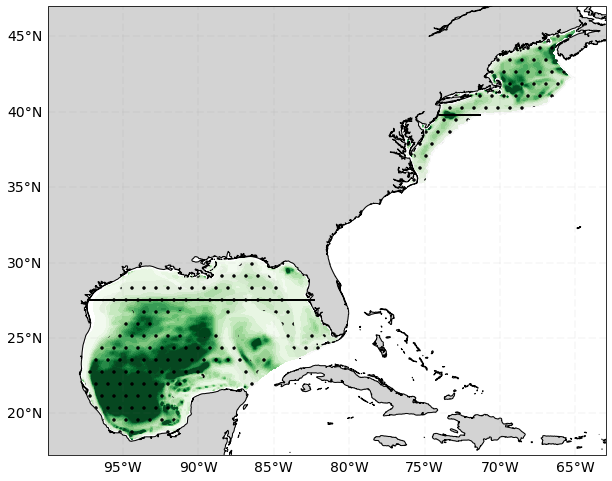

In [35]:
fig,ax = plt.subplots(figsize = [10,15], subplot_kw={'projection': ccrs.PlateCarree()}, sharex = True)
extent = [260,297,17.25,45.5]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.05, linestyle='--')
gl.xlabel_style = {'size': 14, 'color': 'k'}
gl.ylabel_style = {'size': 14, 'color': 'k'}
gl.ylabels_right = False
gl.xlabels_top = False

ax.set_extent(extent)
ax.coastlines(resolution='10m')
#ax.set_title('Horizontal Climate Velocity', fontsize = 14)
CS = ax.contourf(gome_h.lon,gome_h.lat,gome_h.HCV[:,:],levels = np.arange(0,15),transform=ccrs.PlateCarree(), cmap = 'Greens', extend = 'max')
cs2 = ax.contourf(gome_h.lon, gome_h.lat, gome_h.pvals[:,:], hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)

#cbar = plt.colorbar(CS,location = 'top',orientation = 'horizontal',  label = '')
#cbar.ax.tick_params(labelsize=12) 
#cbar.set_label('km/yr', rotation=270, labelpad = 15, fontsize = 14)
ax.add_feature(cartopy.feature.LAND, color = 'lightgrey')
#plt.plot([neus.lon[40], neus.lon[75]], [neus.lat[60], neus.lat[60]], color = 'orange', linewidth = 2)
ax.plot([gome.lon[12], gome.lon[192]], [gome.lat[117], gome.lat[117]], color = 'k', linewidth = 2)
#ax.text(-0.3, 0.5, 'D', transform=ax.transAxes, 
#            size=20, weight='bold')

CS = ax.contourf(neus_h.lon,neus_h.lat,neus_h.HCV[:,:],levels = np.arange(0,15),transform=ccrs.PlateCarree(), cmap = 'Greens', extend = 'max')
cs2 = ax.contourf(neus_h.lon, neus_h.lat, neus_h.pvals[:,:], hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
#cbar = plt.colorbar(CS, pad = 0.02, shrink=0.85, label = '', ax = ax)
#cbar.ax.tick_params(labelsize=12) 
#cbar.set_label('km/yr', rotation=270, labelpad = 15, fontsize = 14)
ax.add_feature(cartopy.feature.LAND, color = 'lightgrey')
#plt.plot([neus.lon[40], neus.lon[75]], [neus.lat[60], neus.lat[60]], color = 'orange', linewidth = 2)
ax.plot([neus.lon[45], neus.lon[77]], [neus.lat[60], neus.lat[60]], color = 'k', linewidth = 2)
#ax.text(-0.3, 0.5, 'D', transform=ax[3].transAxes, 
#            size=20, weight='bold')



In [36]:
ebes_h_roll = ebes_h.roll(lon=325, roll_coords = True)
ebes_roll = ebes.roll(lon=325, roll_coords=True)

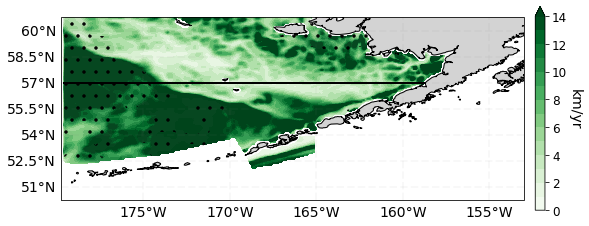

In [37]:
fig,ax = plt.subplots( figsize = [10,15], subplot_kw={'projection': ccrs.PlateCarree()}, sharex = True)
extent = [180.25,207,50.25,60.5]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.05, linestyle='--')
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.05, linestyle='--')
gl.xlabel_style = {'size': 14, 'color': 'k'}
gl.ylabel_style = {'size': 14, 'color': 'k'}
gl.ylabels_right = False
gl.xlabels_top = False
ax.set_extent(extent)
ax.coastlines(resolution='10m')
#ax.set_title('Horizontal Climate Velocity', fontsize = 14)
CS = ax.contourf(ebes_h_roll.lon,ebes_h_roll.lat,ebes_h_roll.HCV[:,:],levels = np.arange(0,15),transform=ccrs.PlateCarree(), cmap = 'Greens', extend = 'max')
cs2 = ax.contourf(ebes_h_roll.lon, ebes_h_roll.lat, ebes_h_roll.pvals[:,:], hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
cbar = plt.colorbar(CS, pad = 0.02, shrink=0.25, label = '', ax = ax)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('km/yr', rotation=270, labelpad = 15, fontsize = 14)
ax.add_feature(cartopy.feature.LAND, color = 'lightgrey')
#plt.plot([neus.lon[40], neus.lon[75]], [neus.lat[60], neus.lat[60]], color = 'orange', linewidth = 2)
ax.plot([ebes.lon[12], ebes.lon[192]], [ebes.lat[117], ebes.lat[117]], color = 'k', linewidth = 2)
#ax.text(-0.3, 0.5, 'D', transform=ax.transAxes, 
#            size=20, weight='bold')
ax.plot([ebes_h_roll.lon[0], ebes_h_roll.lon[250]], [ebes_h_roll.lat[66], ebes_h_roll.lat[66]], color = 'k', linewidth = 2)

Text(0.5, 1.0, 'NE US')

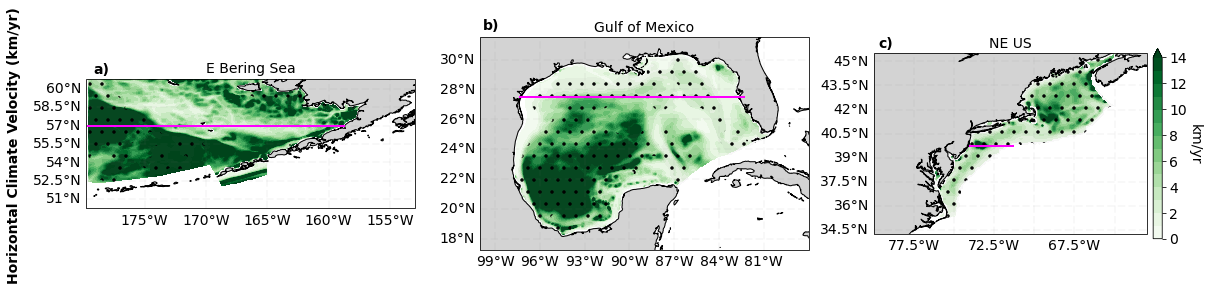

In [38]:
fig, ax = plt.subplots( nrows = 1, ncols = 3, figsize = [20,10], subplot_kw={'projection': ccrs.PlateCarree()})

ax1 = ax[0] 
ax2 = ax[1]
ax3 = ax[2]



extent = [180.25,207,50.25,60.5]
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.05, linestyle='--')
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.05, linestyle='--')
gl.xlabel_style = {'size': 14, 'color': 'k'}
gl.ylabel_style = {'size': 14, 'color': 'k'}
gl.ylabels_right = False
gl.xlabels_top = False
ax1.set_extent(extent)
ax1.coastlines(resolution='10m')
#ax.set_title('Horizontal Climate Velocity', fontsize = 14)
CS = ax1.contourf(ebes_h_roll.lon,ebes_h_roll.lat,ebes_h_roll.HCV[:,:],levels = np.arange(0,15),transform=ccrs.PlateCarree(), cmap = 'Greens', extend = 'max')
cs2 = ax1.contourf(ebes_h_roll.lon, ebes_h_roll.lat, ebes_h_roll.pvals[:,:], hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
#cbar = plt.colorbar(CS, pad = 0.02, shrink=0.25, label = '', ax = ax)
#cbar.ax.tick_params(labelsize=12) 
#cbar.set_label('km/yr', rotation=270, labelpad = 15, fontsize = 14)
ax1.add_feature(cartopy.feature.LAND, color = 'lightgrey')
#plt.plot([neus.lon[40], neus.lon[75]], [neus.lat[60], neus.lat[60]], color = 'orange', linewidth = 2)
ax1.plot([ebes.lon[12], ebes.lon[192]], [ebes.lat[117], ebes.lat[117]], color = 'k', linewidth = 2)
#ax.text(-0.3, 0.5, 'D', transform=ax.transAxes, 
#            size=20, weight='bold')
ax1.plot([ebes_h_roll.lon[0], ebes_h_roll.lon[250]], [ebes_h_roll.lat[66], ebes_h_roll.lat[66]], color = 'magenta', linewidth = 2)
fig.text(0.07, 0.5, 'Horizontal Climate Velocity (km/yr)', fontsize = 14,fontweight = 'bold', va='center', rotation='vertical')
fig.text(0.13, 0.6, 'a)', fontsize = 14, fontweight = 'bold')

extent2 = [260,282,17.25,31.5]
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.05, linestyle='--')
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.05, linestyle='--')
gl2.xlabel_style = {'size': 14, 'color': 'k'}
gl2.ylabel_style = {'size': 14, 'color': 'k'}
gl2.ylabels_right = False
gl2.xlabels_top = False
ax2.set_extent(extent2)
ax2.coastlines(resolution='10m')
#ax.set_title('Horizontal Climate Velocity', fontsize = 14)
CS = ax2.contourf(gome_h.lon,gome_h.lat,gome_h.HCV[:,:],levels = np.arange(0,15),transform=ccrs.PlateCarree(), cmap = 'Greens', extend = 'max')
cs2 = ax2.contourf(gome_h.lon, gome_h.lat, gome_h.pvals[:,:], hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
#cbar2 = plt.colorbar(CS, pad = 0.02, shrink=0.25, label = '', ax = ax2)
#cbar2.ax.tick_params(labelsize=12) 
#cbar2.set_label('km/yr', rotation=270, labelpad = 15, fontsize = 14)
ax2.add_feature(cartopy.feature.LAND, color = 'lightgrey')
#plt.plot([neus.lon[40], neus.lon[75]], [neus.lat[60], neus.lat[60]], color = 'orange', linewidth = 2)
ax2.plot([gome.lon[12], gome.lon[192]], [gome.lat[117], gome.lat[117]], color = 'magenta', linewidth = 2)
fig.text(0.4, 0.66, 'b)', fontsize = 14, fontweight = 'bold')


extent3 = [280,297,34.25,45.5]
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.05, linestyle='--')
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.05, linestyle='--')
gl3.xlabel_style = {'size': 14, 'color': 'k'}
gl3.ylabel_style = {'size': 14, 'color': 'k'}
gl3.ylabels_right = False
gl3.xlabels_top = False
ax3.set_extent(extent3)
ax3.coastlines(resolution='10m')
#ax.set_title('Horizontal Climate Velocity', fontsize = 14)
CS = ax3.contourf(neus_h.lon,neus_h.lat,neus_h.HCV[:,:],levels = np.arange(0,15),transform=ccrs.PlateCarree(), cmap = 'Greens', extend = 'max')
cs2 = ax3.contourf(neus_h.lon, neus_h.lat, neus_h.pvals[:,:], hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
cbar = plt.colorbar(CS, pad = 0.02, shrink=0.35, label = '', ax = ax3)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('km/yr', rotation=270, labelpad = 15, fontsize = 14)
ax3.add_feature(cartopy.feature.LAND, color = 'lightgrey')
#plt.plot([neus.lon[40], neus.lon[75]], [neus.lat[60], neus.lat[60]], color = 'orange', linewidth = 2)
ax3.plot([ebes.lon[12], ebes.lon[192]], [ebes.lat[117], ebes.lat[117]], color = 'k', linewidth = 2)
ax3.plot([neus.lon[45], neus.lon[77]], [neus.lat[60], neus.lat[60]], color = 'magenta', linewidth = 2)
fig.text(0.675, 0.635, 'c)', fontsize = 14, fontweight = 'bold')


ax1.set_title('E Bering Sea', fontsize = 14)
ax2.set_title('Gulf of Mexico', fontsize = 14)
ax3.set_title('NE US', fontsize = 14)




Text(0.675, 0.9, 'f)')

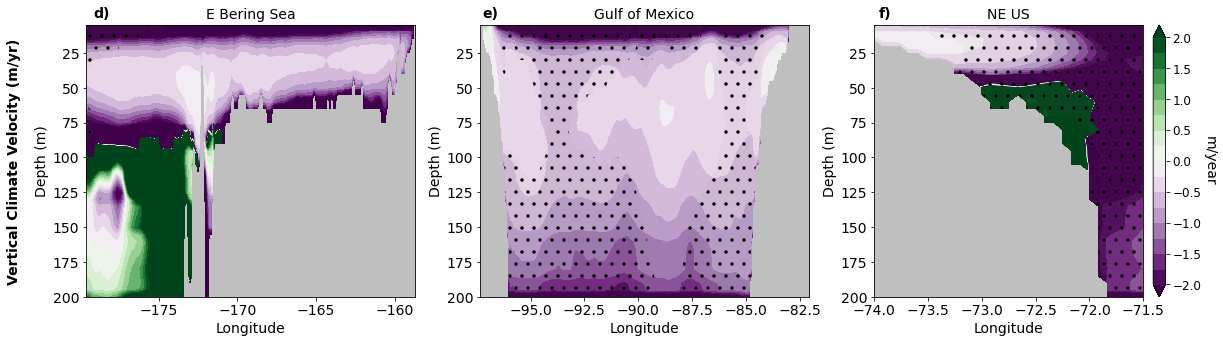

In [39]:
fig, ax = plt.subplots( nrows = 1, ncols = 3, figsize = [20,5])


vmin = -2 
vmax = 2
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[0].contourf(ebes_roll.lon[:250], ebes_roll.depth, ebes_roll.VCV2[66,:250,:].T,levels = np.arange(-2, 2.25, 0.25),cmap = 'PRGn', vmin = vmin, vmax = vmax, norm = norm, extend = 'both')
cs = ax[0].contourf(ebes_roll.lon[:250], ebes_roll.depth, ebes_roll.pvals[66,:250,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[0].invert_yaxis()
#cbar3 = plt.colorbar(c, ax = ax[3], pad = 0.01)
#cbar3.set_label('m/year', rotation=270, labelpad = 15, fontsize = 14)
#cbar3.ax.tick_params(labelsize=12) 
ax[0].tick_params(labelsize = 14)
ax[0].set_ylabel('Depth (m)', fontsize = 14)
ax[0].set_title('E Bering Sea', fontsize = 14)

ax[0].set_xlabel('Longitude', fontsize = 14)
ax[0].fill_between([ebes_roll.lon[0], ebes_roll.lon[250]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[0].set_xlim([ebes_roll.lon[0], ebes_roll.lon[250]])
fig.text(0.07, 0.5, 'Vertical Climate Velocity (m/yr)', fontsize = 14,fontweight = 'bold', va='center', rotation='vertical')
fig.text(0.13, 0.9, 'd)', fontsize = 14, fontweight = 'bold')


###
vmin = -2 
vmax = 2
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[1].contourf(gome.lon[12:195], gome.depth, gome.VCV2[117,12:195,:].T,levels = np.arange(-2, 2.25, 0.25),cmap = 'PRGn', vmin = vmin, vmax = vmax, norm = norm, extend = 'both')
cs = ax[1].contourf(gome.lon[12:195], gome.depth, gome.pvals[117,12:195,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[1].invert_yaxis()
#cbar3 = plt.colorbar(c, ax = ax[3], pad = 0.01)
#cbar3.set_label('m/year', rotation=270, labelpad = 15, fontsize = 14)
#cbar3.ax.tick_params(labelsize=12) 
ax[1].tick_params(labelsize = 14)
ax[1].set_ylabel('Depth (m)', fontsize = 14)
ax[1].set_title('Gulf of Mexico', fontsize = 14)

ax[1].set_xlabel('Longitude', fontsize = 14)
ax[1].fill_between([gome.lon[12], gome.lon[195]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[1].set_xlim([gome.lon[12], gome.lon[195]])
fig.text(0.4, 0.9, 'e)', fontsize = 14, fontweight = 'bold')


###
vmin = -2 
vmax = 2
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[2].contourf(neus.lon[45:77], neus.depth, neus.VCV2[60,45:77,:].T,levels = np.arange(-2, 2.25, 0.25),cmap = 'PRGn', vmin = vmin, vmax = vmax, norm = norm, extend = 'both')
cs = ax[2].contourf(neus.lon[45:77], neus.depth, neus.pvals[60,45:77,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[2].invert_yaxis()
cbar3 = plt.colorbar(c, ax = ax[2], pad = 0.03)
cbar3.set_label('m/year', rotation=270, labelpad = 15, fontsize = 14)
cbar3.ax.tick_params(labelsize=12) 
ax[2].tick_params(labelsize = 14)
ax[2].set_ylabel('Depth (m)', fontsize = 14)
ax[2].set_title('NE US', fontsize = 14)

ax[2].set_xlabel('Longitude', fontsize = 14)
ax[2].fill_between([neus.lon[45], neus.lon[76]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[2].set_xlim([neus.lon[45], neus.lon[75]])
fig.text(0.675, 0.9, 'f)', fontsize = 14, fontweight = 'bold')


Text(0.555, 0.9, 'h)')

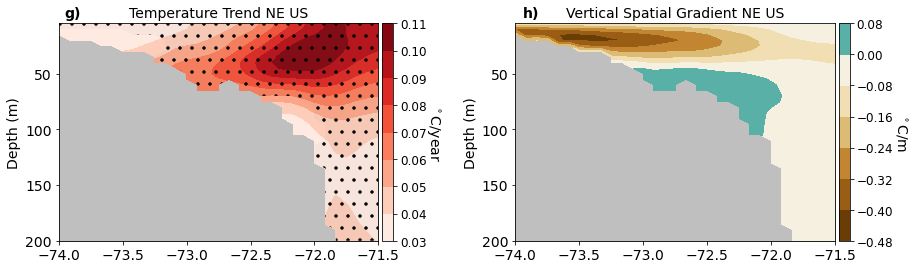

In [40]:
fig, ax = plt.subplots(ncols = 2, figsize = [15,4], sharex = True)


c = ax[0].contourf(neus.lon[45:77], neus.depth, neus.temptrend[60,45:77,:].T, cmap = 'Reds')#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
cs = ax[0].contourf(neus.lon[45:77], neus.depth, neus.pvals[60,45:77,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[0].invert_yaxis()
cbar1 = plt.colorbar(c, ax = ax[0], pad = 0.01, format = "%.2f")
cbar1.set_label('$^\circ$C/year', rotation=270, labelpad = 15, fontsize = 14)
cbar1.ax.tick_params(labelsize=12) 
ax[0].tick_params(labelsize = 14)
ax[0].set_ylabel('Depth (m)', fontsize = 14)
ax[0].set_title('Temperature Trend NE US', fontsize = 14)
ax[0].fill_between([neus.lon[45], neus.lon[76]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[0].set_xlim([neus.lon[45], neus.lon[75]])
fig.text(0.13, 0.9, 'g)', fontsize = 14, fontweight = 'bold')

vmin = -0.48 
vmax = 0.08
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[1].contourf(neus.lon[45:77], neus.depth, neus.v_spatgrad[:,60,45:77], cmap = 'BrBG', vmin = vmin, vmax = vmax, norm = norm)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
ax[1].invert_yaxis()
cbar2 = plt.colorbar(c, ax = ax[1], pad = 0.01)
cbar2.set_label('$^\circ$C/m', rotation=270, labelpad = 15, fontsize = 14)
cbar2.ax.tick_params(labelsize=12) 
ax[1].tick_params(labelsize = 14)
ax[1].set_ylabel('Depth (m)', fontsize = 14)
ax[1].set_title('Vertical Spatial Gradient NE US', fontsize = 14)
ax[1].fill_between([neus.lon[45], neus.lon[76]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[1].set_xlim([neus.lon[45], neus.lon[75]])
fig.text(0.555, 0.9, 'h)', fontsize = 14, fontweight = 'bold')

<ipython-input-41-7f88b85a7155>:3: RuntimeWarning: Mean of empty slice
  c = ax[0].contourf(neus.lon[45:76], neus.depth, np.nanmean(neus.temp[:,:,60,45:76],0), cmap = 'bwr', levels = 20)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')


(-74.0, -71.5)

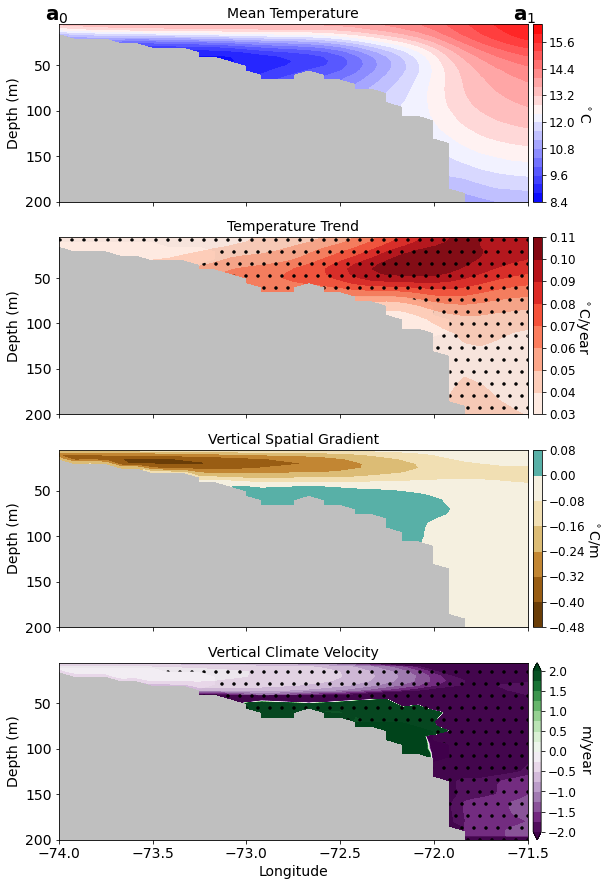

In [41]:
fig, ax = plt.subplots(nrows = 4, figsize = [10,15], sharex = True)

c = ax[0].contourf(neus.lon[45:76], neus.depth, np.nanmean(neus.temp[:,:,60,45:76],0), cmap = 'bwr', levels = 20)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
ax[0].invert_yaxis()
cbar1 = plt.colorbar(c, ax = ax[0], pad = 0.01)
cbar1.set_label('$^\circ$C', rotation=270, labelpad = 15, fontsize = 14)
cbar1.ax.tick_params(labelsize=12) 
ax[0].tick_params(labelsize = 14)
ax[0].set_ylabel('Depth (m)', fontsize = 14)
ax[0].set_title('Mean Temperature', fontsize = 14)
ax[0].fill_between([neus.lon[45], neus.lon[76]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[0].set_xlim([neus.lon[45], neus.lon[75]])
ax[0].text(-0.03, 1.02, 'a$_0$', transform=ax[0].transAxes, 
            size=20, weight='bold')
ax[0].text(0.97, 1.02, 'a$_1$', transform=ax[0].transAxes, 
            size=20, weight='bold')

c = ax[1].contourf(neus.lon[45:77], neus.depth, neus.temptrend[60,45:77,:].T, cmap = 'Reds')#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
cs = ax[1].contourf(neus.lon[45:77], neus.depth, neus.pvals[60,45:77,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[1].invert_yaxis()
cbar1 = plt.colorbar(c, ax = ax[1], pad = 0.01, format = "%.2f")
cbar1.set_label('$^\circ$C/year', rotation=270, labelpad = 15, fontsize = 14)
cbar1.ax.tick_params(labelsize=12) 
ax[1].tick_params(labelsize = 14)
ax[1].set_ylabel('Depth (m)', fontsize = 14)
ax[1].set_title('Temperature Trend', fontsize = 14)
ax[1].fill_between([neus.lon[45], neus.lon[76]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[1].set_xlim([neus.lon[45], neus.lon[75]])

vmin = -0.48 
vmax = 0.08
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[2].contourf(neus.lon[45:77], neus.depth, neus.v_spatgrad[:,60,45:77], cmap = 'BrBG', vmin = vmin, vmax = vmax, norm = norm)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
ax[2].invert_yaxis()
cbar2 = plt.colorbar(c, ax = ax[2], pad = 0.01)
cbar2.set_label('$^\circ$C/m', rotation=270, labelpad = 15, fontsize = 14)
cbar2.ax.tick_params(labelsize=12) 
ax[2].tick_params(labelsize = 14)
ax[2].set_ylabel('Depth (m)', fontsize = 14)
ax[2].set_title('Vertical Spatial Gradient', fontsize = 14)
ax[2].fill_between([neus.lon[45], neus.lon[76]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[2].set_xlim([neus.lon[45], neus.lon[75]])

vmin = -2 
vmax = 2
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[3].contourf(neus.lon[45:77], neus.depth, neus.VCV2[60,45:77,:].T,levels = np.arange(-2, 2.25, 0.25),cmap = 'PRGn', vmin = vmin, vmax = vmax, norm = norm, extend = 'both')
cs = ax[3].contourf(neus.lon[45:77], neus.depth, neus.pvals[60,45:77,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[3].invert_yaxis()
cbar3 = plt.colorbar(c, ax = ax[3], pad = 0.01)
cbar3.set_label('m/year', rotation=270, labelpad = 15, fontsize = 14)
cbar3.ax.tick_params(labelsize=12) 
ax[3].tick_params(labelsize = 14)
ax[3].set_ylabel('Depth (m)', fontsize = 14)
ax[3].set_title('Vertical Climate Velocity', fontsize = 14)

ax[3].set_xlabel('Longitude', fontsize = 14)
ax[3].fill_between([neus.lon[45], neus.lon[76]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[3].set_xlim([neus.lon[45], neus.lon[75]])

<ipython-input-42-0a273af7f331>:4: RuntimeWarning: Mean of empty slice
  c = ax[0].contourf(gome.lon[12:195], gome.depth, np.nanmean(gome.temp[:,:,117,12:195],0), cmap = 'bwr', levels = 20)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')


(-97.33333587646484, -82.08333587646484)

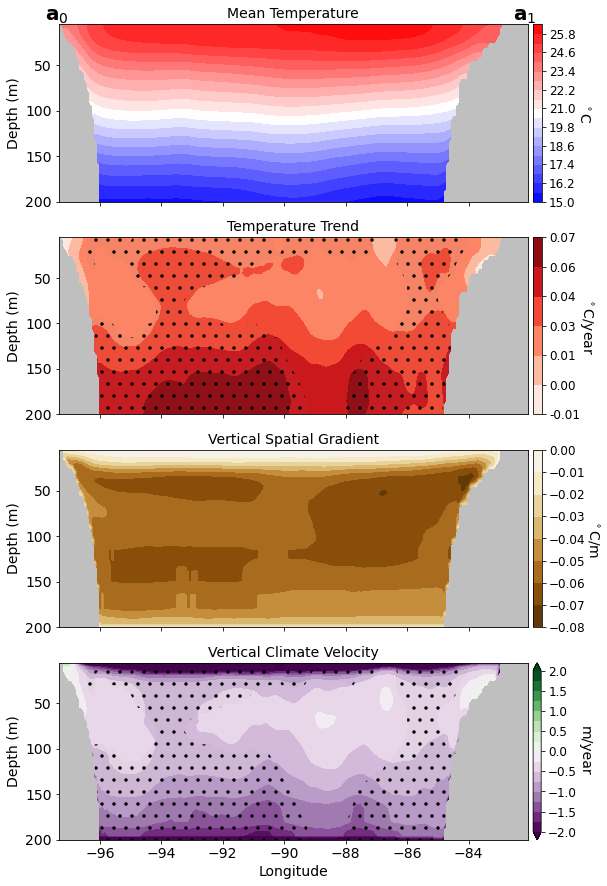

In [42]:
#[gome.lon[12], gome.lon[192]], [gome.lat[117], gome.lat[117]]
fig, ax = plt.subplots(nrows = 4, figsize = [10,15], sharex = True)

c = ax[0].contourf(gome.lon[12:195], gome.depth, np.nanmean(gome.temp[:,:,117,12:195],0), cmap = 'bwr', levels = 20)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
ax[0].invert_yaxis()
cbar1 = plt.colorbar(c, ax = ax[0], pad = 0.01)
cbar1.set_label('$^\circ$C', rotation=270, labelpad = 15, fontsize = 14)
cbar1.ax.tick_params(labelsize=12) 
ax[0].tick_params(labelsize = 14)
ax[0].set_ylabel('Depth (m)', fontsize = 14)
ax[0].set_title('Mean Temperature', fontsize = 14)
ax[0].fill_between([gome.lon[12], gome.lon[195]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[0].set_xlim([gome.lon[12], gome.lon[195]])
ax[0].text(-0.03, 1.02, 'a$_0$', transform=ax[0].transAxes, 
            size=20, weight='bold')
ax[0].text(0.97, 1.02, 'a$_1$', transform=ax[0].transAxes, 
            size=20, weight='bold')

c = ax[1].contourf(gome.lon[12:195], gome.depth, gome.temptrend[117,12:195,:].T, cmap = 'Reds')#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
cs = ax[1].contourf(gome.lon[12:195], gome.depth, gome.pvals[117,12:195,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[1].invert_yaxis()
cbar1 = plt.colorbar(c, ax = ax[1], pad = 0.01, format = "%.2f")
cbar1.set_label('$^\circ$C/year', rotation=270, labelpad = 15, fontsize = 14)
cbar1.ax.tick_params(labelsize=12) 
ax[1].tick_params(labelsize = 14)
ax[1].set_ylabel('Depth (m)', fontsize = 14)
ax[1].set_title('Temperature Trend', fontsize = 14)
ax[1].fill_between([gome.lon[12], gome.lon[195]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[1].set_xlim([gome.lon[12], gome.lon[195]])

vmin = -0.08 
vmax = 0.08
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[2].contourf(gome.lon[12:195], gome.depth, gome.v_spatgrad2[:,117,12:195], cmap = 'BrBG', vmin = vmin, vmax = vmax, norm = norm)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
ax[2].invert_yaxis()
cbar2 = plt.colorbar(c, ax = ax[2], pad = 0.01)
cbar2.set_label('$^\circ$C/m', rotation=270, labelpad = 15, fontsize = 14)
cbar2.ax.tick_params(labelsize=12) 
ax[2].tick_params(labelsize = 14)
ax[2].set_ylabel('Depth (m)', fontsize = 14)
ax[2].set_title('Vertical Spatial Gradient', fontsize = 14)
ax[2].fill_between([gome.lon[12], gome.lon[195]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[2].set_xlim([gome.lon[12], gome.lon[195]])

vmin = -2 
vmax = 2
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[3].contourf(gome.lon[12:195], gome.depth, gome.VCV2[117,12:195,:].T,levels = np.arange(-2, 2.25, 0.25),cmap = 'PRGn', vmin = vmin, vmax = vmax, norm = norm, extend = 'both')
cs = ax[3].contourf(gome.lon[12:195], gome.depth, gome.pvals[117,12:195,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[3].invert_yaxis()
cbar3 = plt.colorbar(c, ax = ax[3], pad = 0.01)
cbar3.set_label('m/year', rotation=270, labelpad = 15, fontsize = 14)
cbar3.ax.tick_params(labelsize=12) 
ax[3].tick_params(labelsize = 14)
ax[3].set_ylabel('Depth (m)', fontsize = 14)
ax[3].set_title('Vertical Climate Velocity', fontsize = 14)

ax[3].set_xlabel('Longitude', fontsize = 14)
ax[3].fill_between([gome.lon[12], gome.lon[195]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[3].set_xlim([gome.lon[12], gome.lon[195]])

<ipython-input-43-7a2993e458fe>:4: RuntimeWarning: Mean of empty slice
  c = ax[0].contourf(ebes_roll.lon[:250], ebes_roll.depth, np.nanmean(ebes_roll.temp[:,:,66,:250],0), cmap = 'bwr', levels = 20)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')


(-179.5833282470703, -158.75)

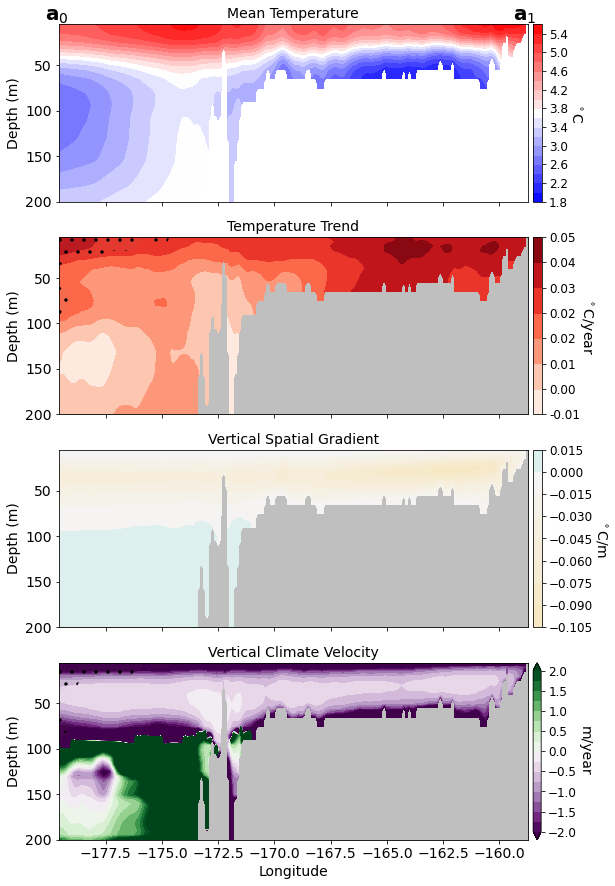

In [43]:
#[ebes.lon[12], ebes.lon[192]], [ebes.lat[117], ebes.lat[117]]
fig, ax = plt.subplots(nrows = 4, figsize = [10,15], sharex = True)

c = ax[0].contourf(ebes_roll.lon[:250], ebes_roll.depth, np.nanmean(ebes_roll.temp[:,:,66,:250],0), cmap = 'bwr', levels = 20)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
ax[0].invert_yaxis()
cbar1 = plt.colorbar(c, ax = ax[0], pad = 0.01)
cbar1.set_label('$^\circ$C', rotation=270, labelpad = 15, fontsize = 14)
cbar1.ax.tick_params(labelsize=12) 
ax[0].tick_params(labelsize = 14)
ax[0].set_ylabel('Depth (m)', fontsize = 14)
ax[0].set_title('Mean Temperature', fontsize = 14)
ax[0].fill_between([ebes.lon[0], ebes.lon[250]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[0].set_xlim([ebes.lon[0], ebes.lon[250]])
ax[0].text(-0.03, 1.02, 'a$_0$', transform=ax[0].transAxes, 
            size=20, weight='bold')
ax[0].text(0.97, 1.02, 'a$_1$', transform=ax[0].transAxes, 
            size=20, weight='bold')

c = ax[1].contourf(ebes_h_roll.lon[:250], ebes_roll.depth, ebes_roll.temptrend[66,:250,:].T, cmap = 'Reds')#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
cs = ax[1].contourf(ebes_h_roll.lon[:250], ebes_roll.depth, ebes_roll.pvals[66,:250,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[1].invert_yaxis()
cbar1 = plt.colorbar(c, ax = ax[1], pad = 0.01, format = "%.2f")
cbar1.set_label('$^\circ$C/year', rotation=270, labelpad = 15, fontsize = 14)
cbar1.ax.tick_params(labelsize=12) 
ax[1].tick_params(labelsize = 14)
ax[1].set_ylabel('Depth (m)', fontsize = 14)
ax[1].set_title('Temperature Trend', fontsize = 14)
ax[1].fill_between([ebes_roll.lon[0], ebes_roll.lon[250]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[1].set_xlim([ebes_roll.lon[0], ebes_roll.lon[250]])

vmin = -0.48 
vmax = 0.08
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[2].contourf(ebes_roll.lon[:250], ebes_roll.depth, ebes_roll.v_spatgrad2[:,66,:250], cmap = 'BrBG', vmin = vmin, vmax = vmax, norm = norm)#,levels = np.arange(-2, 2.25, 0.25), vmin = -2, vmax = 2, extend = 'both')
ax[2].invert_yaxis()
cbar2 = plt.colorbar(c, ax = ax[2], pad = 0.01)
cbar2.set_label('$^\circ$C/m', rotation=270, labelpad = 15, fontsize = 14)
cbar2.ax.tick_params(labelsize=12) 
ax[2].tick_params(labelsize = 14)
ax[2].set_ylabel('Depth (m)', fontsize = 14)
ax[2].set_title('Vertical Spatial Gradient', fontsize = 14)
ax[2].fill_between([ebes_roll.lon[0], ebes_roll.lon[250]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[2].set_xlim([ebes_roll.lon[0], ebes_roll.lon[250]])

vmin = -2 
vmax = 2
norm = matplotlib.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

c = ax[3].contourf(ebes_roll.lon[:250], ebes_roll.depth, ebes_roll.VCV2[66,:250,:].T,levels = np.arange(-2, 2.25, 0.25),cmap = 'PRGn', vmin = vmin, vmax = vmax, norm = norm, extend = 'both')
cs = ax[3].contourf(ebes_roll.lon[:250], ebes_roll.depth, ebes_roll.pvals[66,:250,:].T, hatches=['.'], levels = [ 0, 0.05],
                  cmap='gray', extend='lower', alpha=0.05)
ax[3].invert_yaxis()
cbar3 = plt.colorbar(c, ax = ax[3], pad = 0.01)
cbar3.set_label('m/year', rotation=270, labelpad = 15, fontsize = 14)
cbar3.ax.tick_params(labelsize=12) 
ax[3].tick_params(labelsize = 14)
ax[3].set_ylabel('Depth (m)', fontsize = 14)
ax[3].set_title('Vertical Climate Velocity', fontsize = 14)

ax[3].set_xlabel('Longitude', fontsize = 14)
ax[3].fill_between([ebes_roll.lon[0], ebes_roll.lon[250]],[5,5],[200,200],color = 'grey',alpha = 0.5, zorder = 0)
ax[3].set_xlim([ebes_roll.lon[0], ebes_roll.lon[250]])

## 11. Figure 4

<ipython-input-44-9345929c13dd>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Negative', 'Positive'],fontsize = 14, rotation = 45)


[Text(0.5, 0, 'Low'), Text(1.5, 0, 'Medium'), Text(2.5, 0, 'High')]

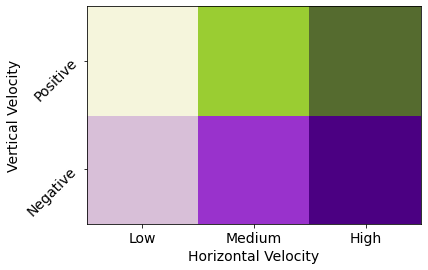

In [44]:
#cmap2 = matplotlib.colors.ListedColormap(['orchid','yellowgreen', 'mediumorchid','olivedrab','darkorchid','darkolivegreen'])
cmap2 = matplotlib.colors.ListedColormap(['thistle','beige', 'darkorchid','yellowgreen','indigo','darkolivegreen','white'])
boundaries2 = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5,200]
norm2 = matplotlib.colors.BoundaryNorm(boundaries2, cmap2.N, clip=True)

mat = [[1, 3, 5],
[2, 4, 6]]

fig, ax = plt.subplots()
plt.pcolor(mat, cmap = cmap2, norm = norm2)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('Horizontal Velocity', fontsize = 14)
ax.set_ylabel('Vertical Velocity', fontsize = 14)
ax.set_xticks([0.5,1.5,2.5])
ax.set_yticklabels(['Negative', 'Positive'],fontsize = 14, rotation = 45)
ax.set_yticks([0.5,1.5])
ax.set_xticklabels(['Low', 'Medium', 'High'],fontsize = 14)#, rotation = 45)

In [45]:
median_V = [np.nanmedian(BALT_Vs),
          np.nanmedian(SOOK_Vs),
          np.nanmedian(NSEA_Vs),
          np.nanmedian(GOAL_Vs),
          np.nanmedian(LABN_Vs),
          np.nanmedian(CEBS_Vs),
          np.nanmedian(SOJA_Vs),
          np.nanmedian(OYAC_Vs),
          np.nanmedian(SCOS_Vs),
          np.nanmedian(CALI_Vs),
          np.nanmedian(BLAC_Vs),
          np.nanmedian(NEUS_Vs),
          np.nanmedian(MEDS_Vs),
          np.nanmedian(IBER_Vs),
          np.nanmedian(KURO_Vs),
          np.nanmedian(YELL_Vs),
          np.nanmedian(CANA_Vs),
          np.nanmedian(ECHS_Vs),
          np.nanmedian(SEUS_Vs),
          np.nanmedian(GOCA_Vs),
          np.nanmedian(GOME_Vs),
          np.nanmedian(ARBS_Vs),
          np.nanmedian(REDS_Vs),
          np.nanmedian(IPHA_Vs),
          np.nanmedian(CARI_Vs),
          np.nanmedian(SCHS_Vs),
          np.nanmedian(BOBE_Vs),
          np.nanmedian(PCAC_Vs),
          np.nanmedian(SCBS_Vs),
          np.nanmedian(GOTH_Vs),
          np.nanmedian(NBRS_Vs),
          np.nanmedian(GUIC_Vs),
          np.nanmedian(SOCC_Vs),
          np.nanmedian(INDO_Vs),
          np.nanmedian(EBRS_Vs),
          np.nanmedian(HUMB_Vs),
          np.nanmedian(BENG_Vs),
          np.nanmedian(NAUS_Vs),
          np.nanmedian(NEAS_Vs),
          np.nanmedian(AGUL_Vs),
          np.nanmedian(NWAS_Vs),
          np.nanmedian(ECAS_Vs),
          np.nanmedian(SBRS_Vs),
          np.nanmedian(NZES_Vs),
          np.nanmedian(PATS_Vs),
          np.nanmedian(SEAS_Vs),
          np.nan,
          np.nanmedian(SWAS_Vs),
          np.nanmedian(WCAS_Vs),
          np.nanmedian(FARO_Vs),
          np.nanmedian(ICES_Vs),
          np.nanmedian(GREE_Vs),
          np.nanmedian(NORS_Vs),
          np.nanmedian(BARE_Vs),
          np.nanmedian(KARA_Vs),
          np.nanmedian(LAPS_Vs),
          np.nanmedian(ESIS_Vs),
          np.nanmedian(WBES_Vs),
          np.nanmedian(ALEU_Vs),
          np.nanmedian(EBES_Vs),
          np.nanmedian(CEAW_Vs),
          np.nanmedian(HUBC_Vs),
          np.nanmedian(BEAU_Vs),
          np.nanmedian(CHAN_Vs),
          np.nan,
          np.nanmedian(NBCS_Vs)]

In [46]:
median_H = [np.nanmedian(BALT_Hs),
          np.nanmedian(SOOK_Hs),
          np.nanmedian(NSEA_Hs),
          np.nanmedian(GOAL_Hs),
          np.nanmedian(LABN_Hs),
          np.nanmedian(CEBS_Hs),
          np.nanmedian(SOJA_Hs),
          np.nanmedian(OYAC_Hs),
          np.nanmedian(SCOS_Hs),
          np.nanmedian(CALI_Hs),
          np.nanmedian(BLAC_Hs),
          np.nanmedian(NEUS_Hs),
          np.nanmedian(MEDS_Hs),
          np.nanmedian(IBER_Hs),
          np.nanmedian(KURO_Hs),
          np.nanmedian(YELL_Hs),
          np.nanmedian(CANA_Hs),
          np.nanmedian(ECHS_Hs),
          np.nanmedian(SEUS_Hs),
          np.nanmedian(GOCA_Hs),
          np.nanmedian(GOME_Hs),
          np.nanmedian(ARBS_Hs),
          np.nanmedian(REDS_Hs),
          np.nanmedian(IPHA_Hs),
          np.nanmedian(CARI_Hs),
          np.nanmedian(SCHS_Hs),
          np.nanmedian(BOBE_Hs),
          np.nanmedian(PCAC_Hs),
          np.nanmedian(SCBS_Hs),
          np.nanmedian(GOTH_Hs),
          np.nanmedian(NBRS_Hs),
          np.nanmedian(GUIC_Hs),
          np.nanmedian(SOCC_Hs),
          np.nanmedian(INDO_Hs),
          np.nanmedian(EBRS_Hs),
          np.nanmedian(HUMB_Hs),
          np.nanmedian(BENG_Hs),
          np.nanmedian(NAUS_Hs),
          np.nanmedian(NEAS_Hs),
          np.nanmedian(AGUL_Hs),
          np.nanmedian(NWAS_Hs),
          np.nanmedian(ECAS_Hs),
          np.nanmedian(SBRS_Hs),
          np.nanmedian(NZES_Hs),
          np.nanmedian(PATS_Hs),
          np.nanmedian(SEAS_Hs),
          np.nan,
          np.nanmedian(SWAS_Hs),
          np.nanmedian(WCAS_Hs),
          np.nanmedian(FARO_Hs),
          np.nanmedian(ICES_Hs),
          np.nanmedian(GREE_Hs),
          np.nanmedian(NORS_Hs),
          np.nanmedian(BARE_Hs),
          np.nanmedian(KARA_Hs),
          np.nanmedian(LAPS_Hs),
          np.nanmedian(ESIS_Hs),
          np.nanmedian(WBES_Hs),
          np.nanmedian(ALEU_Hs),
          np.nanmedian(EBES_Hs),
          np.nanmedian(CEAW_Hs),
          np.nanmedian(HUBC_Hs),
          np.nanmedian(BEAU_Hs),
          np.nanmedian(CHAN_Hs),
          np.nan,
          np.nanmedian(NBCS_Hs)]

/Users/nyelab/miniconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [47]:
median_H_no_nan = np.array(median_H)[np.logical_not(np.isnan(median_H))]
H_classes_2 = mc.FisherJenks(abs(median_H_no_nan),3)
H_classes_2

FisherJenks           

   Interval      Count
----------------------
[ 0.62,  6.35] |    34
( 6.35, 11.90] |    19
(11.90, 21.35] |     9

In [48]:
lmh_v2_sign = np.empty(len(median_V))
lmh_v2_sign[:] = np.nan
for i in range(len(median_V)):
    if median_V[i] < 0:
        lmh_v2_sign[i] = -1
    if median_V[i] > 0:
        lmh_v2_sign[i] = 1

In [49]:
lmh_h2 = np.empty(len(median_H))
lmh_h2[:] = np.nan
for i in range(len(median_H)):
    if abs(median_H[i])<=6.35:
        lmh_h2[i] = 1
    if abs(median_H[i])>6.35 and abs(median_H[i]) <= 11.90:
        lmh_h2[i] = 2
    if abs(median_H[i])>11.90:
        lmh_h2[i] = 3
        

In [50]:
lme_lmh2 = pn.DataFrame(LME.LME_NAME)

In [51]:
lme_lmh2['Number'] = LME.LME_NUMBER
lme_lmh2['h'] = lmh_h2
lme_lmh2['v_sign'] = lmh_v2_sign
lme_lmh2['v_h_sign'] = 100

In [52]:
for i in range(len(lme_lmh2)):
    if lme_lmh2['v_sign'][i] == -1:
        if lme_lmh2['h'][i] == 1:
            lme_lmh2['v_h_sign'][i] = 1
        if lme_lmh2['h'][i] == 2:
            lme_lmh2['v_h_sign'][i] = 3
        if lme_lmh2['h'][i] == 3:
            lme_lmh2['v_h_sign'][i] = 5
    if lme_lmh2['v_sign'][i] == 1:
        if lme_lmh2['h'][i] == 1:
            lme_lmh2['v_h_sign'][i] = 2
        if lme_lmh2['h'][i] == 2:
            lme_lmh2['v_h_sign'][i] = 4
        if lme_lmh2['h'][i] == 3:
            lme_lmh2['v_h_sign'][i] = 6

<ipython-input-52-bb21bc5f87a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lme_lmh2['v_h_sign'][i] = 1
<ipython-input-52-bb21bc5f87a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lme_lmh2['v_h_sign'][i] = 3
<ipython-input-52-bb21bc5f87a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lme_lmh2['v_h_sign'][i] = 4
<ipython-input-52-bb21bc5f87a2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

/Users/nyelab/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/nyelab/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


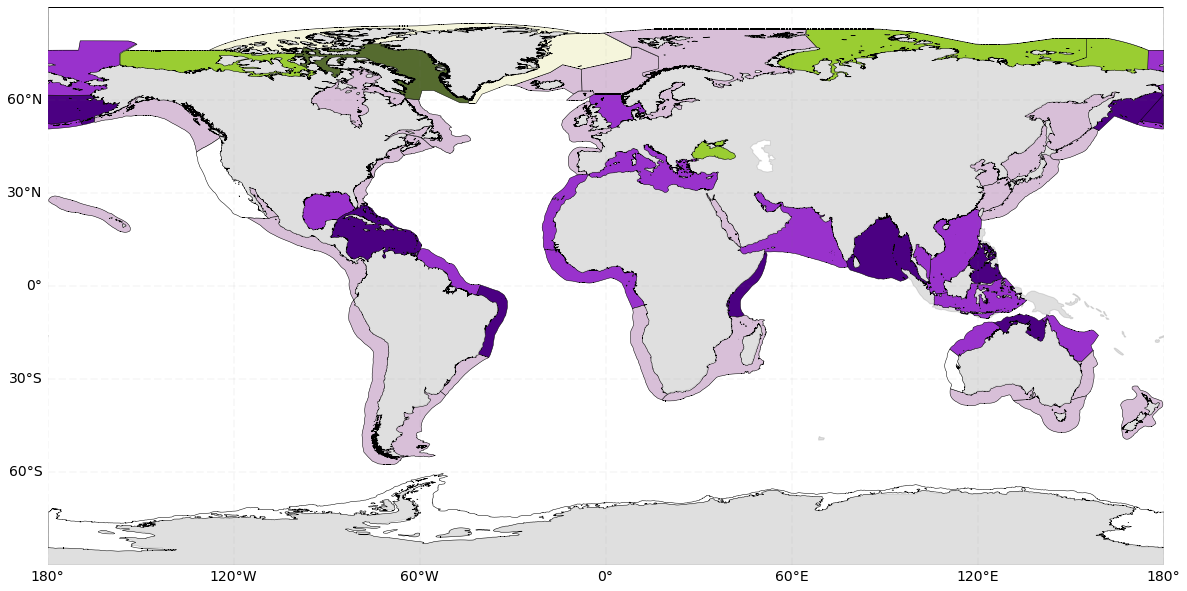

In [53]:


#scheme = mc.FisherJenks(np.round(vertical_mean, k=5)
#scheme2 = []
fig,ax = plt.subplots( figsize = [20,20],subplot_kw={'projection': ccrs.PlateCarree()})
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.05, linestyle='--')
gl.xlabel_style = {'size': 14, 'color': 'k'}
gl.ylabel_style = {'size': 14, 'color': 'k'}
gl.ylabels_right = False
gl.xlabels_top = False
#ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.LAND, color = 'grey', alpha = 0.25)
gplt.choropleth(
    LME.geometry,
    hue=lme_lmh2['v_h_sign'],
   cmap=cmap2,norm=norm2, linewidth=0.5,
    edgecolor='k',
    #alpha = 0.5,
    #legend=True,
    projection=gcrs.PlateCarree(),
    ax = ax,
    #scheme = scheme
    
)
ax.tick_params(labelsize = 14)
#ax.set_title('Median H and sign of V', fontsize = 16)

## 12. Figure 5

In [54]:
neusfall1 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northeast_US_Continental_Shelf1.nc')
neusfall2 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northeast_US_Continental_Shelf2.nc')
neusfall3 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northeast_US_Continental_Shelf3.nc')
neusfall4 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Northeast_US_Continental_Shelf4.nc')

In [55]:
gomfall1 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexico1.nc')
gomfall2 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexico2.nc')
gomfall3 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexico3.nc')
gomfall4 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexico4.nc')
gomfall5 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexico5.nc')
gomfall6 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexico6.nc')
gomfall7 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexico7.nc')
gomfall8 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/Gulf_of_Mexico8.nc')

In [56]:
gomfall = xr.merge([gomfall1, gomfall2, gomfall3, gomfall4, gomfall5, gomfall6, gomfall7, gomfall8])

In [57]:
ebsmjj1 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea1.nc')
ebsmjj2 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea2.nc')
ebsmjj3 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea3.nc')
ebsmjj4 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea4.nc')
ebsmjj4_1 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea4_1.nc')
ebsmjj5 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea5.nc')
ebsmjj5_1 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea5_1.nc')
ebsmjj6 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea6.nc')
ebsmjj6_1 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea6_1.nc')
ebsmjj7 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea7.nc')
ebsmjj7_1 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea7_1.nc')
ebsmjj8 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea8.nc')
ebsmjj8_1 = xr.open_dataset('/Users/nyelab/Desktop/ClimateVelocity_Vertical/LME_data_files/East_Bering_Sea8_1.nc')

In [58]:
lon_indicies = np.arange(0,320)
lon_indicies = np.append(lon_indicies, [4300, 4301, 4302, 4303, 4304,4305,4306,4307,4308,4309])
lon_indicies

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

In [59]:
ebsmjj1 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj1.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj1.latitude,
                          'longitude': ebsmjj1.longitude[lon_indicies],
                          'depth': ebsmjj1.depth,
                          'time': ebsmjj1.time})

In [60]:
ebsmjj2 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj2.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj2.latitude,
                          'longitude': ebsmjj2.longitude[lon_indicies],
                          'depth': ebsmjj2.depth,
                          'time': ebsmjj2.time})
ebsmjj3 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj3.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj3.latitude,
                          'longitude': ebsmjj3.longitude[lon_indicies],
                          'depth': ebsmjj3.depth,
                          'time': ebsmjj3.time})
ebsmjj4 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj4.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj4.latitude,
                          'longitude': ebsmjj4.longitude[lon_indicies],
                          'depth': ebsmjj4.depth,
                          'time': ebsmjj4.time})
ebsmjj4_1 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj4_1.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj4_1.latitude,
                          'longitude': ebsmjj4_1.longitude[lon_indicies],
                          'depth': ebsmjj4_1.depth,
                          'time': ebsmjj4_1.time})
ebsmjj5 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj5.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj5.latitude,
                          'longitude': ebsmjj5.longitude[lon_indicies],
                          'depth': ebsmjj5.depth,
                          'time': ebsmjj5.time})
ebsmjj5_1 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj5_1.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj5_1.latitude,
                          'longitude': ebsmjj5_1.longitude[lon_indicies],
                          'depth': ebsmjj5_1.depth,
                          'time': ebsmjj5_1.time})
ebsmjj6 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj6.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj6.latitude,
                          'longitude': ebsmjj6.longitude[lon_indicies],
                          'depth': ebsmjj6.depth,
                          'time': ebsmjj6.time})
ebsmjj6_1 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj6_1.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj6_1.latitude,
                          'longitude': ebsmjj6_1.longitude[lon_indicies],
                          'depth': ebsmjj6_1.depth,
                          'time': ebsmjj6_1.time})
ebsmjj7 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj7.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj7.latitude,
                          'longitude': ebsmjj7.longitude[lon_indicies],
                          'depth': ebsmjj7.depth,
                          'time': ebsmjj7.time})
ebsmjj7_1 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj7_1.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj7_1.latitude,
                          'longitude': ebsmjj7_1.longitude[lon_indicies],
                          'depth': ebsmjj7_1.depth,
                          'time': ebsmjj7_1.time})
ebsmjj8 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj8.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj8.latitude,
                          'longitude': ebsmjj8.longitude[lon_indicies],
                          'depth': ebsmjj8.depth,
                          'time': ebsmjj8.time})
ebsmjj8_1 = xr.Dataset(data_vars = {'thetao': (['time','depth','latitude','longitude'],ebsmjj8_1.thetao[:,:,:,lon_indicies])},
                               coords = {'latitude': ebsmjj8_1.latitude,
                          'longitude': ebsmjj8_1.longitude[lon_indicies],
                          'depth': ebsmjj8_1.depth,
                          'time': ebsmjj8_1.time})

In [61]:
ebsmjj = xr.merge([ebsmjj1,ebsmjj2,ebsmjj3,ebsmjj4,ebsmjj4_1,ebsmjj5,ebsmjj5_1,ebsmjj6,ebsmjj6_1,ebsmjj7,ebsmjj7_1,ebsmjj8,ebsmjj8_1])

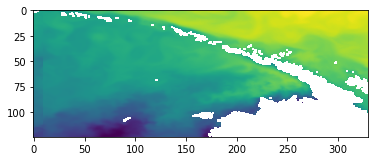

In [62]:
ebsmjj_roll = ebsmjj.roll(longitude = 340,roll_coords = True)
plt.imshow(ebsmjj_roll.thetao[10,2,:,:])

In [63]:
data_may = ebsmjj_roll.sel(time=ebsmjj_roll.time.dt.month==5)
data_june = ebsmjj_roll.sel(time=ebsmjj_roll.time.dt.month==6)
data_july = ebsmjj_roll.sel(time=ebsmjj_roll.time.dt.month==7)

In [64]:
ebsmjj_select = xr.merge([data_may, data_june, data_july])

In [65]:
neusfall = xr.merge([neusfall1, neusfall2, neusfall3, neusfall4])

In [66]:
# select SON
neus_SON = neusfall.sel(time=neusfall.time.dt.season=="SON")

# calculate mean per year
neus_SON = neus_SON.groupby(neus_SON.time.dt.year).mean("time")

### Recalculate climate velocity for seasons matching the trawl survey

In [67]:
def inSHAPE_all_depth_glorys(longitude, latitude, var, depth, shape):
    x = longitude
    y = latitude
    empty = np.empty([27, len(depth), len(y), len(x)]) #Chnaged the years for 
    empty[:,:,:,:] = np.nan
    for i in range(len(y)):
        for j in range(len(x)):
            if Point(x[j], y[i]).within(shape) == True:
                empty[:,:,i,j] = var[:,:,i,j]
    return empty

In [68]:
def climate_vel_season_only(data, season, LME_name):
    # select season
    data_season = data.sel(time=data.time.dt.season=="SON")

    # calculate mean per year
    data_season = data_season.groupby(data_season.time.dt.year).mean("time")
    
    temp = inSHAPE_all_depth_glorys(data_season.longitude, data_season.latitude, data_season.thetao, data_season.depth,
                             LME[LME.LME_NAME == LME_name].geometry[LME.OBJECTID[LME.LME_NAME == LME_name].values[0] -1])
    
    start = time.perf_counter()
    
    z = np.arange(5,205,5)
    
    temp_5m = np.empty([27,len(z),len(data_season.latitude),len(data_season.longitude)])
    temp_5m[:,:,:,:] = np.nan
    for t in range(27):
        for i in range(len(data_season.latitude)):
            for j in range(len(data_season.longitude)):
                Y_data = temp[t,:,i,j]
                if np.any(Y_data)==True:
                    func = int1(data_season.depth,Y_data,bounds_error = False)
                    temp_5m[t,:,i,j] = func(z)
                    
    time4 = time.perf_counter()
    print('5m interpolation completed, '+ str((time4-start)/60) + ' minutes elapsed')
    
    temp5m = xr.Dataset(data_vars = {'temp': (['year','depth','lat','lon'],temp_5m)}, 
                    coords = {'year': data_season.year, 'depth': z, 'lat': np.array(data_season.latitude), 'lon': np.array(data_season.longitude)})
    
    start = time.perf_counter()

    slopes = np.empty([len(temp5m.lat),len(temp5m.lon),len(temp5m.depth)])
    p_vals = np.empty([len(temp5m.lat),len(temp5m.lon),len(temp5m.depth)])
    slopes[:,:,:] = np.nan
    p_vals[:,:,:] = np.nan

    x = np.arange(0,27)
    for i in range(len(temp5m.lat)):
        for j in range(len(temp5m.lon)):
            for k in range(len(temp5m.depth)):
                y = temp5m.temp[:27,k,i,j]
                if any(y) == True:
                    LR = linregress(x, y)
                    slopes[i,j,k] = LR.slope
                    p_vals[i,j,k] = LR.pvalue
    p_vals[p_vals>0.05] = np.nan                
    time4 = time.perf_counter()
    
    print('Temperature Trends Complete, '+ str((time4-start)/60) + ' minutes elapsed')
    
    # Calculate the spatial gradient in the vertical
    start = time.perf_counter()
    
    UP = 5 # 5 meters between each data point
    DOWN = 5

    temp_slice_mean = np.nanmean(temp5m.temp[:,:,:,:],0)
    UD_net = np.empty([len(temp5m.depth),len(temp5m.lat),len(temp5m.lon)])
    UD_net[:,:,:] = np.nan

    for i in range(len(temp5m.depth)):
        for j in range(len(temp5m.lat)):
            for k in range(len(temp5m.lon)):
                if np.isnan(temp_slice_mean[i,j,k]) == False:
                    if i == 0: #at the surface
                        focal_temp = temp_slice_mean[i,j,k]
                        DO_grad = -1*(focal_temp - temp_slice_mean[i+1,j,k])/DOWN # angle = 0
                        UD_net[i,j,k] = DO_grad
                    if i == (len(temp5m.depth) -1): #at the bottom
                        focal_temp = temp_slice_mean[i,j,k]
                        UP_grad = (focal_temp - temp_slice_mean[i-1,j,k])/UP # angle = 180
                        UD_net[i,j,k] = UP_grad
                    if i >0 and i < (len(temp5m.depth)-1):
                        focal_temp = temp_slice_mean[i,j,k]
                        UP_grad = (focal_temp - temp_slice_mean[i-1,j,k])/UP # angle = 0
                        DO_grad = -1*((focal_temp - temp_slice_mean[i+1,j,k])/DOWN) # angle = 180
                        if np.isnan(UP_grad) == True and np.isnan(DO_grad) == True:
                            UD_net[i,j,k] = np.nan
                        else:
                            UD_net[i,j,k] = np.nansum([UP_grad, DO_grad])/2

    time4 = time.perf_counter()
    
    print('Vertical Spat Grad Complete, '+ str((time4-start)/60) + ' minutes elapsed')
    
    slopesH = np.empty([len(data_season.latitude),len(data_season.longitude)])
    p_valsH = np.empty([len(data_season.latitude),len(data_season.longitude)])
    slopesH[:,:] = np.nan
    p_valsH[:,:] = np.nan



    x = np.arange(0,27)
    for i in range(len(data_season.latitude)):
        for j in range(len(data_season.longitude)):
            y = temp[:,0,i,j]
            if any(y) == True:
                LR = linregress(x, y)
                slopesH[i,j] = LR.slope
                p_valsH[i,j] = LR.pvalue
                    
    p_valsH[p_valsH>0.05] = np.nan

    slice_mean = np.nanmean(temp[:,0,:,:],0)
    shape = np.shape(slice_mean)
    spatgrad_NS = np.empty(shape)
    spatgrad_NS[:,:] = np.nan
    spatgrad_EW = np.empty(shape)
    spatgrad_EW[:,:] = np.nan
    spatgrad = np.empty(shape)
    spatgrad[:,:] = np.nan

    for j in range(len(data_season.latitude)):
        for k in range(len(data_season.longitude)):
            if np.isnan(slice_mean[j,k]) == False:
                if j==0:
                    spatgrad_NS[j,k] = np.nan
                    spatgrad_EW[j,k] = np.nan
                if j==(len(data_season.latitude)-1):
                    spatgrad_NS[j,k] = np.nan
                    spatgrad_EW[j,k] = np.nan
                if k==0:
                    spatgrad_NS[j,k] = np.nan
                    spatgrad_EW[j,k] = np.nan
                if k==(len(data_season.longitude)-1):
                    spatgrad_NS[j,k] = np.nan
                    spatgrad_EW[j,k] = np.nan
                    
                focal_temp = slice_mean[j,k]
                if j > 0 and j < (len(data_season.latitude)-1) and k >0 and k< (len(data_season.longitude)-1):
                    north_temp = slice_mean[j+1,k]
                    south_temp = slice_mean[j-1,k]
                    east_temp = slice_mean[j,k+1]
                    west_temp = slice_mean[j,k-1]
                    north_east_temp = slice_mean[j+1, k+1]
                    north_west_temp = slice_mean[j+1, k-1]
                    south_east_temp = slice_mean[j-1, k+1]
                    south_west_temp = slice_mean[j-1, k-1]
                
                    gradWE1 = (north_temp - north_west_temp)/((np.cos(np.radians(data_season.latitude[j+1]))*111.321)*(1/12))
                    gradWE2 = (focal_temp-west_temp)/((np.cos(np.radians(data_season.latitude[j]))*111.321)*(1/12))
                    gradWE3 = (south_temp - south_west_temp)/((np.cos(np.radians(data_season.latitude[j-1]))*111.321)*(1/12))
                    gradWE4 = (north_east_temp - north_temp)/((np.cos(np.radians(data_season.latitude[j+1]))*111.321)*(1/12))
                    gradWE5 = (east_temp-focal_temp)/((np.cos(np.radians(data_season.latitude[j]))*111.321)*(1/12))
                    gradWE6 = (south_east_temp - south_temp)/((np.cos(np.radians(data_season.latitude[j-1]))*111.321)*(1/12))
                
                    gradNS1 = (north_west_temp-west_temp)/(111.2*1/12)
                    gradNS2 = (north_temp-focal_temp)/(111.2*1/12)
                    gradNS3 = (north_east_temp - east_temp)/(111.2*1/12)
                    gradNS4 = (west_temp - south_west_temp)/(111.2*1/12)
                    gradNS5 = (focal_temp-south_temp)/(111.2*1/12)
                    gradNS6 = (east_temp - south_east_temp)/(111.2*1/12)
            
                    spatgrad_EW[j,k] = np.average([gradWE1,gradWE2,gradWE3,gradWE4,gradWE5,gradWE6], weights = [1,2,1,1,2,1])
                    spatgrad_NS[j,k] = np.average([gradNS1,gradNS2,gradNS3,gradNS4,gradNS5,gradNS6], weights = [1,2,1,1,2,1])
                
                    spatgrad[j,k] = np.sqrt((spatgrad_EW[j,k]**2)+(spatgrad_NS[j,k]**2))

    vcv_data_season = xr.Dataset(data_vars = {'temp': (['year','depth','lat','lon'],temp5m.temp),
                                 'v_spatgrad': (['depth','lat','lon'], UD_net),
                                 'temptrend': (['lat','lon','depth'], slopes),
                                  'pvals': (['lat','lon','depth'], p_vals),
                                 'VCV': (['lat','lon','depth'],slopes/(UD_net.transpose(1,2,0)))},
                     coords = {'year': temp5m.year, 'depth': temp5m.depth, 
                               'lat': np.array(temp5m.lat), 
                               'lon': np.array(temp5m.lon)})
    
    hcv_data_season = xr.Dataset(data_vars = {'temp': (['year','lat','lon'],data_season.thetao[:,0,:,:]),
                                  'ew_spatgrad': (['lat','lon'], spatgrad_EW),
                                  'ns_spatgrad': (['lat','lon'], spatgrad_NS),
                                  'horiz_spatgrad': (['lat','lon'],spatgrad),
                                  'temptrend': (['lat','lon'], slopesH),
                                  'pvals': (['lat','lon'], p_valsH),
                                  'HCV': (['lat','lon'], slopesH/spatgrad)},
                     coords = {'year': data_season.year, 
                               'lat': np.array(data_season.latitude), 
                               'lon': np.array(data_season.longitude)})

    return vcv_data_season, hcv_data_season

In [69]:
def climate_vel_east_bering_only(data_season, LME_name):
    # select season
    #data_season = data.sel(time=data.time.dt.season=="SON")

    # calculate mean per year
    data_season = data_season.groupby(data_season.time.dt.year).mean("time")
    
    def inSHAPE_all_depth_glorys2(longitude, latitude, var, depth, shape):
        x = longitude
        y = latitude
        empty = np.empty([28, len(depth), len(y), len(x)]) #Chnaged the years for 
        empty[:,:,:,:] = np.nan
        for i in range(len(y)):
            for j in range(len(x)):
                if Point(x[j], y[i]).within(shape) == True:
                    empty[:,:,i,j] = var[:,:,i,j]
        return empty

    temp = inSHAPE_all_depth_glorys2(data_season.longitude, data_season.latitude, data_season.thetao, data_season.depth,
                             LME[LME.LME_NAME == LME_name].geometry[LME.OBJECTID[LME.LME_NAME == LME_name].values[0] -1])
    
    start = time.perf_counter()
    
    z = np.arange(5,205,5)
    
    temp_5m = np.empty([28,len(z),len(data_season.latitude),len(data_season.longitude)])
    temp_5m[:,:,:,:] = np.nan
    for t in range(28):
        for i in range(len(data_season.latitude)):
            for j in range(len(data_season.longitude)):
                Y_data = temp[t,:,i,j]
                if np.any(Y_data)==True:
                    func = int1(data_season.depth,Y_data,bounds_error = False)
                    temp_5m[t,:,i,j] = func(z)
                    
    time4 = time.perf_counter()
    print('5m interpolation completed, '+ str((time4-start)/60) + ' minutes elapsed')
    
    temp5m = xr.Dataset(data_vars = {'temp': (['year','depth','lat','lon'],temp_5m)}, 
                    coords = {'year': data_season.year, 'depth': z, 'lat': np.array(data_season.latitude), 'lon': np.array(data_season.longitude)})
    
    start = time.perf_counter()

    slopes = np.empty([len(temp5m.lat),len(temp5m.lon),len(temp5m.depth)])
    p_vals = np.empty([len(temp5m.lat),len(temp5m.lon),len(temp5m.depth)])
    slopes[:,:,:] = np.nan
    p_vals[:,:,:] = np.nan

    x = np.arange(0,28)
    for i in range(len(temp5m.lat)):
        for j in range(len(temp5m.lon)):
            for k in range(len(temp5m.depth)):
                y = temp5m.temp[:28,k,i,j]
                if any(y) == True:
                    LR = linregress(x, y)
                    slopes[i,j,k] = LR.slope
                    p_vals[i,j,k] = LR.pvalue
    p_vals[p_vals>0.05] = np.nan                
    time4 = time.perf_counter()
    
    print('Temperature Trends Complete, '+ str((time4-start)/60) + ' minutes elapsed')
    
    # Calculate the spatial gradient in the vertical
    start = time.perf_counter()
    
    UP = 5 # 5 meters between each data point
    DOWN = 5

    temp_slice_mean = np.nanmean(temp5m.temp[:,:,:,:],0)
    UD_net = np.empty([len(temp5m.depth),len(temp5m.lat),len(temp5m.lon)])
    UD_net[:,:,:] = np.nan

    for i in range(len(temp5m.depth)):
        for j in range(len(temp5m.lat)):
            for k in range(len(temp5m.lon)):
                if np.isnan(temp_slice_mean[i,j,k]) == False:
                    if i == 0: #at the surface
                        focal_temp = temp_slice_mean[i,j,k]
                        DO_grad = -1*(focal_temp - temp_slice_mean[i+1,j,k])/DOWN # angle = 0
                        UD_net[i,j,k] = DO_grad
                    if i == (len(temp5m.depth) -1): #at the bottom
                        focal_temp = temp_slice_mean[i,j,k]
                        UP_grad = (focal_temp - temp_slice_mean[i-1,j,k])/UP # angle = 180
                        UD_net[i,j,k] = UP_grad
                    if i >0 and i < (len(temp5m.depth)-1):
                        focal_temp = temp_slice_mean[i,j,k]
                        UP_grad = (focal_temp - temp_slice_mean[i-1,j,k])/UP # angle = 0
                        DO_grad = -1*((focal_temp - temp_slice_mean[i+1,j,k])/DOWN) # angle = 180
                        if np.isnan(UP_grad) == True and np.isnan(DO_grad) == True:
                            UD_net[i,j,k] = np.nan
                        else:
                            UD_net[i,j,k] = np.nansum([UP_grad, DO_grad])/2

    time4 = time.perf_counter()
    
    print('Vertical Spat Grad Complete, '+ str((time4-start)/60) + ' minutes elapsed')
    
    slopesH = np.empty([len(data_season.latitude),len(data_season.longitude)])
    p_valsH = np.empty([len(data_season.latitude),len(data_season.longitude)])
    slopesH[:,:] = np.nan
    p_valsH[:,:] = np.nan



    x = np.arange(0,28)
    for i in range(len(data_season.latitude)):
        for j in range(len(data_season.longitude)):
            y = temp[:,0,i,j]
            if any(y) == True:
                LR = linregress(x, y)
                slopesH[i,j] = LR.slope
                p_valsH[i,j] = LR.pvalue
                    
    p_valsH[p_valsH>0.05] = np.nan

    slice_mean = np.nanmean(temp[:,0,:,:],0)
    shape = np.shape(slice_mean)
    spatgrad_NS = np.empty(shape)
    spatgrad_NS[:,:] = np.nan
    spatgrad_EW = np.empty(shape)
    spatgrad_EW[:,:] = np.nan
    spatgrad = np.empty(shape)
    spatgrad[:,:] = np.nan

    for j in range(len(data_season.latitude)):
        for k in range(len(data_season.longitude)):
            if np.isnan(slice_mean[j,k]) == False:
                if j==0:
                    spatgrad_NS[j,k] = np.nan
                    spatgrad_EW[j,k] = np.nan
                if j==(len(data_season.latitude)-1):
                    spatgrad_NS[j,k] = np.nan
                    spatgrad_EW[j,k] = np.nan
                if k==0:
                    spatgrad_NS[j,k] = np.nan
                    spatgrad_EW[j,k] = np.nan
                if k==(len(data_season.longitude)-1):
                    spatgrad_NS[j,k] = np.nan
                    spatgrad_EW[j,k] = np.nan
                    
                focal_temp = slice_mean[j,k]
                if j > 0 and j < (len(data_season.latitude)-1) and k >0 and k< (len(data_season.longitude)-1):
                    north_temp = slice_mean[j+1,k]
                    south_temp = slice_mean[j-1,k]
                    east_temp = slice_mean[j,k+1]
                    west_temp = slice_mean[j,k-1]
                    north_east_temp = slice_mean[j+1, k+1]
                    north_west_temp = slice_mean[j+1, k-1]
                    south_east_temp = slice_mean[j-1, k+1]
                    south_west_temp = slice_mean[j-1, k-1]
                
                    gradWE1 = (north_temp - north_west_temp)/((np.cos(np.radians(data_season.latitude[j+1]))*111.321)*(1/12))
                    gradWE2 = (focal_temp-west_temp)/((np.cos(np.radians(data_season.latitude[j]))*111.321)*(1/12))
                    gradWE3 = (south_temp - south_west_temp)/((np.cos(np.radians(data_season.latitude[j-1]))*111.321)*(1/12))
                    gradWE4 = (north_east_temp - north_temp)/((np.cos(np.radians(data_season.latitude[j+1]))*111.321)*(1/12))
                    gradWE5 = (east_temp-focal_temp)/((np.cos(np.radians(data_season.latitude[j]))*111.321)*(1/12))
                    gradWE6 = (south_east_temp - south_temp)/((np.cos(np.radians(data_season.latitude[j-1]))*111.321)*(1/12))
                
                    gradNS1 = (north_west_temp-west_temp)/(111.2*1/12)
                    gradNS2 = (north_temp-focal_temp)/(111.2*1/12)
                    gradNS3 = (north_east_temp - east_temp)/(111.2*1/12)
                    gradNS4 = (west_temp - south_west_temp)/(111.2*1/12)
                    gradNS5 = (focal_temp-south_temp)/(111.2*1/12)
                    gradNS6 = (east_temp - south_east_temp)/(111.2*1/12)
            
                    spatgrad_EW[j,k] = np.average([gradWE1,gradWE2,gradWE3,gradWE4,gradWE5,gradWE6], weights = [1,2,1,1,2,1])
                    spatgrad_NS[j,k] = np.average([gradNS1,gradNS2,gradNS3,gradNS4,gradNS5,gradNS6], weights = [1,2,1,1,2,1])
                
                    spatgrad[j,k] = np.sqrt((spatgrad_EW[j,k]**2)+(spatgrad_NS[j,k]**2))

    vcv_data_season = xr.Dataset(data_vars = {'temp': (['year','depth','lat','lon'],temp5m.temp),
                                 'v_spatgrad': (['depth','lat','lon'], UD_net),
                                 'temptrend': (['lat','lon','depth'], slopes),
                                  'pvals': (['lat','lon','depth'], p_vals),
                                 'VCV': (['lat','lon','depth'],slopes/(UD_net.transpose(1,2,0)))},
                     coords = {'year': temp5m.year, 'depth': temp5m.depth, 
                               'lat': np.array(temp5m.lat), 
                               'lon': np.array(temp5m.lon)})
    
    hcv_data_season = xr.Dataset(data_vars = {'temp': (['year','lat','lon'],data_season.thetao[:,0,:,:]),
                                  'ew_spatgrad': (['lat','lon'], spatgrad_EW),
                                  'ns_spatgrad': (['lat','lon'], spatgrad_NS),
                                  'horiz_spatgrad': (['lat','lon'],spatgrad),
                                  'temptrend': (['lat','lon'], slopesH),
                                  'pvals': (['lat','lon'], p_valsH),
                                  'HCV': (['lat','lon'], slopesH/spatgrad)},
                     coords = {'year': data_season.year, 
                               'lat': np.array(data_season.latitude), 
                               'lon': np.array(data_season.longitude)})

    return vcv_data_season, hcv_data_season

In [70]:
vcv_gom_son, hcv_gom_son = climate_vel_season_only(gomfall, 'SON', 'Gulf of Mexico')

5m interpolation completed, 2.941417843766673 minutes elapsed
Temperature Trends Complete, 11.899484643333343 minutes elapsed


<ipython-input-68-4bc70f443565>:58: RuntimeWarning: Mean of empty slice
  temp_slice_mean = np.nanmean(temp5m.temp[:,:,:,:],0)


Vertical Spat Grad Complete, 0.6674204386833329 minutes elapsed


<ipython-input-68-4bc70f443565>:105: RuntimeWarning: Mean of empty slice
  slice_mean = np.nanmean(temp[:,0,:,:],0)


In [71]:
vcv_ebs_mjj, hcv_ebs_mjj = climate_vel_east_bering_only(ebsmjj_select, 'East Bering Sea')

5m interpolation completed, 3.3762967034499978 minutes elapsed
Temperature Trends Complete, 15.48617709959999 minutes elapsed


<ipython-input-69-619f7cb9a5a1>:69: RuntimeWarning: Mean of empty slice
  temp_slice_mean = np.nanmean(temp5m.temp[:,:,:,:],0)


Vertical Spat Grad Complete, 0.7039417814166579 minutes elapsed


<ipython-input-69-619f7cb9a5a1>:116: RuntimeWarning: Mean of empty slice
  slice_mean = np.nanmean(temp[:,0,:,:],0)


In [72]:
vcv_neus_SON, hcv_neus_SON = climate_vel_season_only(neusfall, 'SON', 'Northeast U.S. Continental Shelf')

5m interpolation completed, 2.0308539080000023 minutes elapsed
Temperature Trends Complete, 8.590149354283328 minutes elapsed


<ipython-input-68-4bc70f443565>:58: RuntimeWarning: Mean of empty slice
  temp_slice_mean = np.nanmean(temp5m.temp[:,:,:,:],0)


Vertical Spat Grad Complete, 0.12533498496666956 minutes elapsed


<ipython-input-68-4bc70f443565>:105: RuntimeWarning: Mean of empty slice
  slice_mean = np.nanmean(temp[:,0,:,:],0)


In [73]:
vcv_neus_SON

<xarray.Dataset>
Dimensions:     (depth: 40, lat: 141, lon: 178, year: 27)
Coordinates:
  * year        (year) int64 1993 1994 1995 1996 1997 ... 2016 2017 2018 2019
  * depth       (depth) int64 5 10 15 20 25 30 35 ... 175 180 185 190 195 200
  * lat         (lat) float32 34.75 34.83 34.92 35.0 ... 46.17 46.25 46.33 46.42
  * lon         (lon) float32 -77.75 -77.67 -77.58 -77.5 ... -63.17 -63.08 -63.0
Data variables:
    temp        (year, depth, lat, lon) float64 nan nan nan nan ... nan nan nan
    v_spatgrad  (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    temptrend   (lat, lon, depth) float64 nan nan nan nan ... nan nan nan nan
    pvals       (lat, lon, depth) float64 nan nan nan nan ... nan nan nan nan
    VCV         (lat, lon, depth) float64 nan nan nan nan ... nan nan nan nan

In [74]:
start = time.perf_counter()
    
UP = 5 # 5 meters between each data point
DOWN = 5

temp_slice_mean = np.nanmean(vcv_neus_SON.temp[:,:,:,:],0)
UD_net = np.empty([len(vcv_neus_SON.depth),len(vcv_neus_SON.lat),len(vcv_neus_SON.lon)])
UD_net[:,:,:] = np.nan

for i in range(len(vcv_neus_SON.depth)):
    for j in range(len(vcv_neus_SON.lat)):
        for k in range(len(vcv_neus_SON.lon)):
             if np.isnan(temp_slice_mean[i,j,k]) == False:
                if i == 0: #at the surface
                    focal_temp = temp_slice_mean[i,j,k]
                    DO_grad = -1*(focal_temp - temp_slice_mean[i+1,j,k])/DOWN # angle = 0
                    UD_net[i,j,k] = DO_grad
                if i == (len(vcv_neus_SON.depth) -1): #at the bottom
                    focal_temp = temp_slice_mean[i,j,k]
                    UP_grad = (focal_temp - temp_slice_mean[i-1,j,k])/UP # angle = 180
                    UD_net[i,j,k] = UP_grad
                if i >0 and i < (len(vcv_neus_SON.depth)-1):
                    focal_temp = temp_slice_mean[i,j,k]
                    UP_grad = (focal_temp - temp_slice_mean[i-1,j,k])/UP # angle = 0
                    DO_grad = -1*((focal_temp - temp_slice_mean[i+1,j,k])/DOWN) # angle = 180
                    if np.isnan(UP_grad) == True and np.isnan(DO_grad) == True:
                        UD_net[i,j,k] = np.nan
                    else:
                        UD_net[i,j,k] = np.nanmean([UP_grad, DO_grad])

time4 = time.perf_counter()
    
print('Vertical Spat Grad Complete, '+ str((time4-start)/60) + ' minutes elapsed')
    

<ipython-input-74-9f2b07c4ea22>:6: RuntimeWarning: Mean of empty slice
  temp_slice_mean = np.nanmean(vcv_neus_SON.temp[:,:,:,:],0)


Vertical Spat Grad Complete, 0.149092545049992 minutes elapsed


In [75]:
start = time.perf_counter()
    
UP = 5 # 5 meters between each data point
DOWN = 5

temp_slice_mean = np.nanmean(vcv_neus_SON.temp[:,:,:,:],0)
UD_net2 = np.empty([len(vcv_neus_SON.depth),len(vcv_neus_SON.lat),len(vcv_neus_SON.lon)])
UD_net2[:,:,:] = np.nan

for i in range(len(vcv_neus_SON.depth)):
    for j in range(len(vcv_neus_SON.lat)):
        for k in range(len(vcv_neus_SON.lon)):
             if np.isnan(temp_slice_mean[i,j,k]) == False:
                if i == 0: #at the surface
                    focal_temp = temp_slice_mean[i,j,k]
                    DO_grad = -1*(focal_temp - temp_slice_mean[i+1,j,k])/DOWN # angle = 0
                    UD_net2[i,j,k] = DO_grad
                if i == (len(vcv_neus_SON.depth) -1): #at the bottom
                    focal_temp = temp_slice_mean[i,j,k]
                    UP_grad = (focal_temp - temp_slice_mean[i-1,j,k])/UP # angle = 180
                    UD_net2[i,j,k] = UP_grad
                if i >0 and i < (len(vcv_neus_SON.depth)-1):
                    focal_temp = temp_slice_mean[i,j,k]
                    UP_grad = (focal_temp - temp_slice_mean[i-1,j,k])/UP # angle = 0
                    DO_grad = -1*((focal_temp - temp_slice_mean[i+1,j,k])/DOWN) # angle = 180
                    if np.isnan(UP_grad) == True and np.isnan(DO_grad) == True:
                        UD_net2[i,j,k] = np.nan
                    else:
                        UD_net2[i,j,k] = np.nansum([UP_grad, DO_grad])/2

time4 = time.perf_counter()
    
print('Vertical Spat Grad Complete, '+ str((time4-start)/60) + ' minutes elapsed')

<ipython-input-75-d941d8eb31ed>:6: RuntimeWarning: Mean of empty slice
  temp_slice_mean = np.nanmean(vcv_neus_SON.temp[:,:,:,:],0)


Vertical Spat Grad Complete, 0.12464193183333615 minutes elapsed


Text(0.5, 1.0, 'Vertical Spatial Gradient')

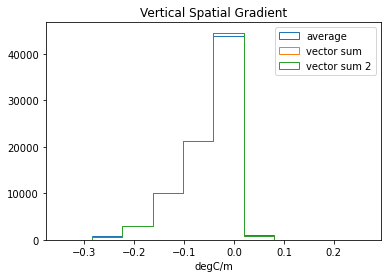

In [76]:
#np.shape(vcv_neus_SON.v_spatgrad)
UD_net_new = np.reshape(UD_net, 40*141*178)
UD_net2_new = np.reshape(UD_net2, 40*141*178)
v_spatgrad_new = np.reshape(vcv_neus_SON.v_spatgrad.values, 40*141*178)
plt.hist(UD_net_new,histtype = 'step', label = 'average')
plt.hist(v_spatgrad_new, histtype = 'step', label = 'vector sum')
plt.hist(UD_net2_new, histtype = 'step', label = 'vector sum 2')
plt.legend()
plt.xlabel('degC/m')
plt.title('Vertical Spatial Gradient')

Text(0.5, 1.0, 'Vertical Climate Velocity')

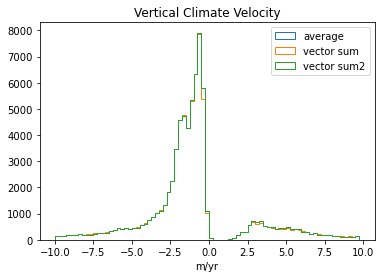

In [77]:
vcv_new = vcv_neus_SON.temptrend / UD_net.transpose(1,2,0)
vcv_new3a = vcv_neus_SON.temptrend / UD_net2.transpose(1,2,0)
#np.shape(vcv_neus_SON.v_spatgrad)
vcv_new2 = np.reshape(vcv_new.values, 40*141*178)
vcv_new3 = np.reshape(vcv_new3a.values, 40*141*178)
vcv_original2 = np.reshape(vcv_neus_SON.VCV.values, 40*141*178)

plt.hist(vcv_new2, bins = np.arange(-10,10,0.25), histtype = 'step', label = 'average')
plt.hist(vcv_original2, bins = np.arange(-10,10,0.25), histtype = 'step', label = 'vector sum')
plt.hist(vcv_new2, bins = np.arange(-10,10,0.25), histtype = 'step', label = 'vector sum2')
plt.legend()
plt.xlabel('m/yr')
plt.title('Vertical Climate Velocity')

## Load the biological data

In [78]:
bio_fg = pn.read_csv('/Users/nyelab/Desktop/ClimateVelocity_Vertical/Fish_glob/neus_fishglob.csv', header = 0, sep = ' ')
bio_gmex = pn.read_csv('/Users/nyelab/Desktop/ClimateVelocity_Vertical/Fish_glob/gmex_fishglob.csv', header = 0, sep = ' ')
bio_ebs = pn.read_csv('/Users/nyelab/Desktop/ClimateVelocity_Vertical/Fish_glob/ebs_fishglob.csv', header = 0, sep =' ')

/Users/nyelab/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (44,45,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/nyelab/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (43,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [79]:
bio_fg = bio_fg[bio_fg.year>1992] #neus
bio_gmex = bio_gmex[bio_gmex.year > 1992]
bio_ebs = bio_ebs[bio_ebs.year > 1992]

In [80]:
bio_fg = bio_fg[bio_fg.season == 'Fall'] #neus
bio_gmex = bio_gmex[bio_gmex.season == 'Fall']

In [81]:
np.unique(bio_fg.area_swept)# the area swept for the neus is the same everywhere

array([0.0384])

In [ ]:
bio_fg['wgt_per_area'] = bio_fg.wgt/bio_fg.area_swept

In [82]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()

In [141]:
weighted_lon = bio_fg.groupby(['verbatim_name', 'year']).apply(weighted_average, 'longitude', 'wgt')
weighted_lat = bio_fg.groupby(['verbatim_name', 'year']).apply(weighted_average, 'latitude', 'wgt')
weighted_depth = bio_fg.groupby(['verbatim_name', 'year']).apply(weighted_average, 'depth', 'wgt')

In [142]:
weighted_longm = bio_gmex.groupby(['verbatim_name', 'year']).apply(weighted_average, 'longitude', 'wgt_cpua')
weighted_latgm = bio_gmex.groupby(['verbatim_name', 'year']).apply(weighted_average, 'latitude', 'wgt_cpua')
weighted_depthgm = bio_gmex.groupby(['verbatim_name', 'year']).apply(weighted_average, 'depth', 'wgt_cpua')

In [143]:
weighted_lonebs = bio_ebs.groupby(['verbatim_name', 'year']).apply(weighted_average, 'longitude', 'wgt_cpua')
weighted_latebs = bio_ebs.groupby(['verbatim_name', 'year']).apply(weighted_average, 'latitude', 'wgt_cpua')
weighted_depthebs = bio_ebs.groupby(['verbatim_name', 'year']).apply(weighted_average, 'depth', 'wgt_cpua')

In [144]:
#neus
biomass_weighted_new = pn.DataFrame(data = {'LON': weighted_lon,
                                       'LAT': weighted_lat,
                                       'DEPTH': weighted_depth,})

In [145]:
biomass_weighted_gmex = pn.DataFrame(data = {'LON': weighted_longm,
                                       'LAT': weighted_latgm,
                                       'DEPTH': weighted_depthgm})

In [146]:
biomass_weighted_ebs = pn.DataFrame(data = {'LON': weighted_lonebs,
                                       'LAT': weighted_latebs,
                                       'DEPTH': weighted_depthebs})

In [147]:
bw_new = biomass_weighted_new.reset_index()

In [148]:
bw_gmex = biomass_weighted_gmex.reset_index()

In [149]:
bw_ebs = biomass_weighted_ebs.reset_index()

In [150]:
from scipy import stats

slopes_new = np.empty(len(np.unique(bw_new.verbatim_name)))
p_values_new = np.empty(len(np.unique(bw_new.verbatim_name)))
lat_dist_new = np.empty(len(np.unique(bw_new.verbatim_name)))
lat_distp_new = np.empty(len(np.unique(bw_new.verbatim_name)))
#mean_vv = np.empty(len(np.unique(bw.SVSPP)))
#mean_hv = np.empty(len(np.unique(bw.SVSPP)))
#mean_vvson = np.empty(len(np.unique(bw.SVSPP)))
#mean_hvson = np.empty(len(np.unique(bw.SVSPP)))

for i in range(len(np.unique(bw_new.verbatim_name))):
    # find the slope anf the pvalue of the linear regression
    species_num = np.unique(bw_new.verbatim_name)[i]
    subset = bw_new[bw_new.verbatim_name == species_num]
    subset = subset.dropna(0)
    subset = subset.reset_index(drop=True)
    if len(subset)>1:
        x = subset.year
        y = subset.DEPTH
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slopes_new[i] = slope
        p_values_new[i] = p_value
        y = subset.LAT
        slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
        lat_dist_new[i] = slope2 * 111
        lat_distp_new[i] = p_value2
        #mean_vv[i] = np.nanmean(subset.VCV)
        #mean_hv[i] = np.nanmean(subset.HCV)
        #mean_vvson[i] = np.nanmean(subset.VCVson)
        #mean_hvson[i] = np.nanmean(subset.HCVson)
    else:
        slopes_new[i] = np.nan
        p_values_new[i] = np.nan
        #mean_vv[i] = np.nan
        #mean_hv[i] = np.nan
        #mean_vvson[i] = np.nan
        #mean_hvson[i] = np.nan
        lat_dist_new[i] = np.nan
        lat_distp_new[i] = np.nan

In [153]:
slopes_gmex = np.empty(len(np.unique(bw_gmex.verbatim_name)))
p_values_gmex = np.empty(len(np.unique(bw_gmex.verbatim_name)))
lat_dist_gmex = np.empty(len(np.unique(bw_gmex.verbatim_name)))
lat_distp_gmex = np.empty(len(np.unique(bw_gmex.verbatim_name)))
#mean_vv = np.empty(len(np.unique(bw.SVSPP)))
#mean_hv = np.empty(len(np.unique(bw.SVSPP)))
#mean_vvson = np.empty(len(np.unique(bw.SVSPP)))
#mean_hvson = np.empty(len(np.unique(bw.SVSPP)))

for i in range(len(np.unique(bw_gmex.verbatim_name))):
    # find the slope anf the pvalue of the linear regression
    species_num = np.unique(bw_gmex.verbatim_name)[i]
    subset = bw_gmex[bw_gmex.verbatim_name == species_num]
    subset = subset.dropna(0)
    subset = subset.reset_index(drop=True)
    if len(subset)>1:
        x = subset.year
        y = subset.DEPTH
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slopes_gmex[i] = slope
        p_values_gmex[i] = p_value
        y = subset.LAT
        slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
        lat_dist_gmex[i] = slope2 * 111
        lat_distp_gmex[i] = p_value2
        #mean_vv[i] = np.nanmean(subset.VCV)
        #mean_hv[i] = np.nanmean(subset.HCV)
        #mean_vvson[i] = np.nanmean(subset.VCVson)
        #mean_hvson[i] = np.nanmean(subset.HCVson)
    else:
        slopes_gmex[i] = np.nan
        p_values_gmex[i] = np.nan
        #mean_vv[i] = np.nan
        #mean_hv[i] = np.nan
        #mean_vvson[i] = np.nan
        #mean_hvson[i] = np.nan
        lat_dist_gmex[i] = np.nan
        lat_distp_gmex[i] = np.nan

In [154]:
slopes_ebs = np.empty(len(np.unique(bw_ebs.verbatim_name)))
p_values_ebs = np.empty(len(np.unique(bw_ebs.verbatim_name)))
lat_dist_ebs = np.empty(len(np.unique(bw_ebs.verbatim_name)))
lat_distp_ebs = np.empty(len(np.unique(bw_ebs.verbatim_name)))
#mean_vv = np.empty(len(np.unique(bw.SVSPP)))
#mean_hv = np.empty(len(np.unique(bw.SVSPP)))
#mean_vvson = np.empty(len(np.unique(bw.SVSPP)))
#mean_hvson = np.empty(len(np.unique(bw.SVSPP)))

for i in range(len(np.unique(bw_ebs.verbatim_name))):
    # find the slope anf the pvalue of the linear regression
    species_num = np.unique(bw_ebs.verbatim_name)[i]
    subset = bw_ebs[bw_ebs.verbatim_name == species_num]
    subset = subset.dropna(0)
    subset = subset.reset_index(drop=True)
    if len(subset)>1:
        x = subset.year
        y = subset.DEPTH
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slopes_ebs[i] = slope
        p_values_ebs[i] = p_value
        y = subset.LAT
        slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x,y)
        lat_dist_ebs[i] = slope2 * 111
        lat_distp_ebs[i] = p_value2
        #mean_vv[i] = np.nanmean(subset.VCV)
        #mean_hv[i] = np.nanmean(subset.HCV)
        #mean_vvson[i] = np.nanmean(subset.VCVson)
        #mean_hvson[i] = np.nanmean(subset.HCVson)
    else:
        slopes_ebs[i] = np.nan
        p_values_ebs[i] = np.nan
        #mean_vv[i] = np.nan
        #mean_hv[i] = np.nan
        #mean_vvson[i] = np.nan
        #mean_hvson[i] = np.nan
        lat_dist_ebs[i] = np.nan
        lat_distp_ebs[i] = np.nan

In [155]:
vcv_gom_son

<xarray.Dataset>
Dimensions:     (depth: 40, lat: 161, lon: 225, year: 27)
Coordinates:
  * year        (year) int64 1993 1994 1995 1996 1997 ... 2016 2017 2018 2019
  * depth       (depth) int64 5 10 15 20 25 30 35 ... 175 180 185 190 195 200
  * lat         (lat) float32 17.75 17.83 17.92 18.0 ... 30.83 30.92 31.0 31.08
  * lon         (lon) float32 -98.33 -98.25 -98.17 ... -79.83 -79.75 -79.67
Data variables:
    temp        (year, depth, lat, lon) float64 nan nan nan nan ... nan nan nan
    v_spatgrad  (depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    temptrend   (lat, lon, depth) float64 nan nan nan nan ... nan nan nan nan
    pvals       (lat, lon, depth) float64 nan nan nan nan ... nan nan nan nan
    VCV         (lat, lon, depth) float64 nan nan nan nan ... nan nan nan nan

## NOTE  in these 'movement' data frames a positive depth move is indicative of an INCREASE in DEPTH

In [156]:
vcv_ebs_mjj.VCV

<xarray.DataArray 'VCV' (lat: 125, lon: 330, depth: 40)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * depth    (depth) int64 5 10 15 20 25 30 35 ... 170 175 180 185 190 195 200
  * lat      (lat) float32 51.5 51.58 51.67 51.75 ... 61.58 61.67 61.75 61.83
  * lon      (lon) float32 178.8 178.8 178.9 179.0 ... -153.2 -153.1 -153.0

In [157]:
step1 = np.reshape(vcv_gom_son.VCV.values, 161*225*40)
step2 = step1[np.isnan(step1) == False]

step1neus = np.reshape(vcv_neus_SON.VCV.values, 141*178*40)
step2neus = step1neus[np.isnan(step1neus) == False]

step1ebs = np.reshape(vcv_ebs_mjj.VCV.values, 125*330*40)
step2ebs = step1ebs[np.isnan(step1ebs) == False]

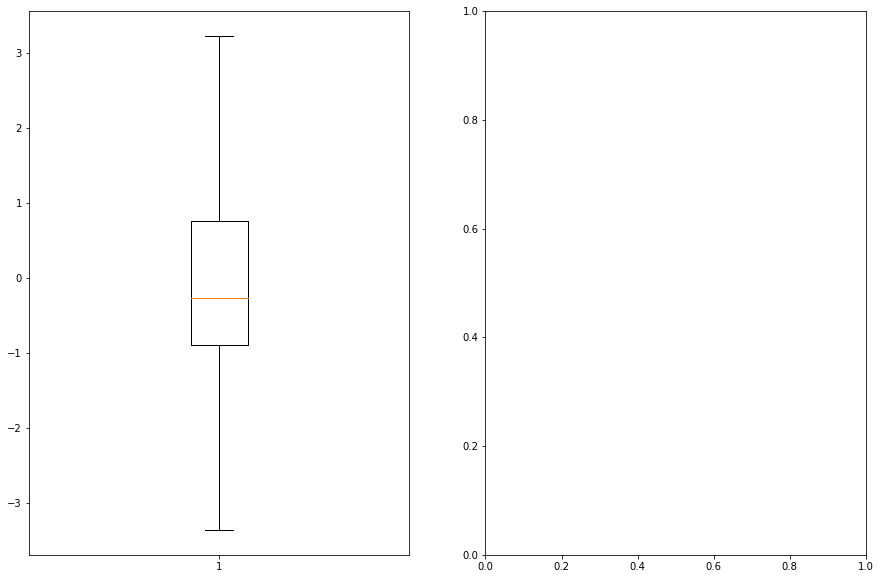

In [158]:
fig, ax = plt.subplots(ncols = 2, figsize = [15,10])
B = ax[0].boxplot(step2ebs, showfliers = False)
#sc = ax[0].scatter(np.zeros(21)+1, common_short_siglat.lat_dist, color = 'k')
#ax[0].scatter(np.zeros(8)+1, common_short_siglat_ok_sigd.lat_dist, color = 'r')
#ax[0].set_ylim(-20,20)

#B2 = ax[1].boxplot(vcv_box, showfliers = False)
#ax[1].scatter(np.zeros(8)+1, -1*common_short_siglat_ok_sigd.slopes, color = 'r')
#ax[1].scatter(np.zeros(3)+1, -1*common_short_siglat_nfar_sigd.slopes, color = 'purple', marker = 'x')
#ax[1].scatter(np.zeros(12)+1, -1*common_short_nsiglat_sigd.slopes, facecolor = '', edgecolor = 'g', marker = 'o')
#ax[1].set_ylim(-5,5)

In [159]:
[item.get_ydata()[1] for item in B['whiskers']]

[-3.3588600642473248, 3.2308105389861135]

In [160]:
movement_gmex = pn.DataFrame({'species':np.unique(bw_gmex.verbatim_name),
                         'depth_move': slopes_gmex,
                        'depth_p': p_values_gmex,
                        'ns_move': lat_dist_gmex,
                        'ns_p': lat_distp_gmex})
movement_slat_gmex = movement_gmex[movement_gmex.ns_p <0.05]

movement_slat_big_gmex = movement_slat_gmex[movement_slat_gmex.ns_move > 37.186613799457845]
movement_slat_big_sd_gmex = movement_slat_big_gmex[movement_slat_big_gmex.depth_p < 0.05]

movement_slat_jr_half_gmex = movement_slat_gmex[movement_slat_gmex.ns_move < 37.186613799457845]
movement_slat_jr_gmex = movement_slat_jr_half_gmex[movement_slat_jr_half_gmex.ns_move > -1.577669369900108]
movement_slat_jr_sd_gmex = movement_slat_jr_gmex[movement_slat_jr_gmex.depth_p < 0.05]

movement_slat_less_gmex = movement_slat_gmex[movement_slat_gmex.ns_move < -1.577669369900108]
movement_slat_less_sd_gmex = movement_slat_less_gmex[movement_slat_less_gmex.depth_p < 0.05]

movement_nlat_gmex = movement_gmex[movement_gmex.ns_p >=0.05]
movement_nlat_sd_gmex = movement_nlat_gmex[movement_nlat_gmex.depth_p < 0.05]

In [161]:
movement = pn.DataFrame({'species':np.unique(bw_new.verbatim_name),
                         'depth_move': slopes_new,
                        'depth_p': p_values_new,
                        'ns_move': lat_dist_new,
                        'ns_p': lat_distp_new})
movement_slat = movement[movement.ns_p <0.05]

movement_slat_big = movement_slat[movement_slat.ns_move > 15.530302781416477]
movement_slat_big_sd = movement_slat_big[movement_slat_big.depth_p < 0.05]

movement_slat_jr_half = movement_slat[movement_slat.ns_move < 15.530302781416477]
movement_slat_jr = movement_slat_jr_half[movement_slat_jr_half.ns_move > 0.1269878656852231]
movement_slat_jr_sd = movement_slat_jr[movement_slat_jr.depth_p < 0.05]

movement_slat_less = movement_slat[movement_slat.ns_move < 0.1269878656852231]
movement_slat_less_sd = movement_slat_less[movement_slat_less.depth_p < 0.05]

movement_nlat = movement[movement.ns_p >=0.05]
movement_nlat_sd = movement_nlat[movement_nlat.depth_p < 0.05]

In [164]:
movement_ebs = pn.DataFrame({'species':np.unique(bw_ebs.verbatim_name),
                         'depth_move': slopes_ebs,
                        'depth_p': p_values_ebs,
                        'ns_move': lat_dist_ebs,
                        'ns_p': lat_distp_ebs})
movement_slat_ebs = movement_ebs[movement_ebs.ns_p <0.05]

movement_slat_big_ebs = movement_slat_ebs[movement_slat_ebs.ns_move > 14.651452532463697]
movement_slat_big_sd_ebs = movement_slat_big_ebs[movement_slat_big_ebs.depth_p < 0.05]

movement_slat_jr_half_ebs = movement_slat_ebs[movement_slat_ebs.ns_move < 14.651452532463697]
movement_slat_jr_ebs = movement_slat_jr_half_ebs[movement_slat_jr_half_ebs.ns_move > -6.956992895030945]
movement_slat_jr_sd_ebs = movement_slat_jr_ebs[movement_slat_jr_ebs.depth_p < 0.05]

movement_slat_less_ebs = movement_slat_ebs[movement_slat_ebs.ns_move < -6.956992895030945]
movement_slat_less_sd_ebs = movement_slat_less_ebs[movement_slat_less_ebs.depth_p < 0.05]

movement_nlat_ebs = movement_ebs[movement_ebs.ns_p >=0.05]
movement_nlat_sd_ebs = movement_nlat_ebs[movement_nlat_ebs.depth_p < 0.05]



In [165]:
movement_slat_big_sd_gmex['category'] = ['farther',
                                        'farther',
                                        'farther',
                                        'farther',
                                        'farther',
                                        'farther',
                                        'farther',
                                        'farther']

In [166]:
movement_slat_big_sd['category'] = ['farther',
                                   'farther',
                                   'farther',
                                   'farther',
                                   'farther',
                                   'farther',
                                   'farther',
                                   'farther',
                                   'farther']

<ipython-input-166-bb4ed45b963b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_big_sd['category'] = ['farther',


In [167]:
movement_slat_big_sd_ebs['category'] = ['farther',
                                   'farther',
                                   'farther',
                                   'farther',
                                        'farther',
                                   'farther']

<ipython-input-167-cb84bce574db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_big_sd_ebs['category'] = ['farther',


In [168]:
movement_slat_jr_sd_gmex['category'] = ['expected','expected','expected','expected','expected','expected','expected','expected','expected',
                                       'expected','expected','expected','expected','expected','expected','expected','expected','expected',
                                       'expected','expected','expected','expected','expected','expected','expected','expected','expected', 'expected']

<ipython-input-168-179ff7c9c3bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_jr_sd_gmex['category'] = ['expected','expected','expected','expected','expected','expected','expected','expected','expected',


In [169]:
movement_slat_jr_sd['category'] = ['expected','expected','expected','expected','expected',
                                  'expected','expected','expected','expected','expected',
                                  'expected','expected','expected','expected','expected',
                                  'expected','expected','expected','expected','expected',
                                  'expected','expected','expected','expected','expected']

<ipython-input-169-d574ac0fea43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_jr_sd['category'] = ['expected','expected','expected','expected','expected',


In [170]:
movement_slat_jr_sd_ebs['category'] = ['expected','expected','expected','expected'
                                      ,'expected','expected','expected','expected']

<ipython-input-170-8f18d1df50a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_jr_sd_ebs['category'] = ['expected','expected','expected','expected'


In [171]:
movement_slat_less_sd_gmex['category'] = ['less','less','less','less','less','less','less','less','less','less',
                                         'less','less','less','less','less','less','less','less','less','less',
                                         'less','less','less','less','less','less','less','less','less',
                                         'less','less','less','less','less','less','less','less','less',
                                         'less','less','less','less','less','less','less','less']

<ipython-input-171-3718a40cbec7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_less_sd_gmex['category'] = ['less','less','less','less','less','less','less','less','less','less',


In [172]:
movement_slat_less_sd['category'] = ['less', 'less','less','less','less','less','less','less','less','less',
                                    'less','less','less','less','less','less','less']

<ipython-input-172-0eb5ca4668e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_less_sd['category'] = ['less', 'less','less','less','less','less','less','less','less','less',


In [173]:
movement_slat_less_sd_ebs['category'] = ['less','less','less','less','less','less']

<ipython-input-173-8b0a8bb64a73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_less_sd_ebs['category'] = ['less','less','less','less','less','less']


In [174]:
movement_nlat_sd_gmex['category'] = ['none','none','none','none','none','none','none','none','none','none','none','none','none',
                                    'none','none','none','none','none','none','none','none','none','none','none','none','none',
                                    'none','none','none','none','none','none','none','none','none','none','none','none','none']

<ipython-input-174-3bf73c071240>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_nlat_sd_gmex['category'] = ['none','none','none','none','none','none','none','none','none','none','none','none','none',


In [175]:
movement_nlat_sd['category'] = ['none','none','none','none','none','none','none','none','none','none',
                               'none','none','none','none','none','none','none','none','none','none',
                               'none','none','none','none','none','none','none','none','none','none',
                               'none','none','none','none','none','none','none','none','none','none',
                               'none','none','none','none','none','none','none','none','none','none',
                               'none','none','none','none','none','none','none','none','none','none',
                               'none','none','none','none','none','none','none','none']

<ipython-input-175-0fb1fe4bd469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_nlat_sd['category'] = ['none','none','none','none','none','none','none','none','none','none',


In [176]:
movement_nlat_sd_ebs['category'] = ['none','none','none','none','none','none','none','none','none','none',
                                    'none','none','none','none','none','none']

<ipython-input-176-5f3bf43e2040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_nlat_sd_ebs['category'] = ['none','none','none','none','none','none','none','none','none','none',


In [177]:
movement_categorized_gmex = pn.merge(pn.merge(pn.merge(movement_slat_big_sd_gmex, movement_slat_jr_sd_gmex, how = 'outer')
                                              , movement_slat_less_sd_gmex, how = 'outer'), movement_nlat_sd_gmex, how = 'outer')

In [178]:
movement_categorized_neus = pn.merge(pn.merge(pn.merge(movement_slat_big_sd, movement_slat_jr_sd, how = 'outer')
                                              , movement_slat_less_sd, how = 'outer'), movement_nlat_sd, how = 'outer')

In [179]:
movement_categorized_ebs = pn.merge(pn.merge(pn.merge(movement_slat_big_sd_ebs, movement_slat_jr_sd_ebs, how = 'outer')
                                              , movement_slat_less_sd_ebs, how = 'outer'), movement_nlat_sd_ebs, how = 'outer')

In [180]:
movement_categorized_gmex['posneg'] = ''

In [181]:
movement_categorized_neus['posneg'] = ''

In [182]:
movement_categorized_ebs['posneg'] = ''

In [183]:
movement_categorized_gmex.posneg[movement_categorized_gmex.depth_move > 0] = 'deeper'
movement_categorized_gmex.posneg[movement_categorized_gmex.depth_move < 0] = 'shallower'

<ipython-input-183-47121552d65a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_categorized_gmex.posneg[movement_categorized_gmex.depth_move > 0] = 'deeper'
<ipython-input-183-47121552d65a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_categorized_gmex.posneg[movement_categorized_gmex.depth_move < 0] = 'shallower'


In [184]:
movement_categorized_neus.posneg[movement_categorized_neus.depth_move > 0] = 'deeper'
movement_categorized_neus.posneg[movement_categorized_neus.depth_move < 0] = 'shallower'

<ipython-input-184-c1f342df795f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_categorized_neus.posneg[movement_categorized_neus.depth_move > 0] = 'deeper'
<ipython-input-184-c1f342df795f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_categorized_neus.posneg[movement_categorized_neus.depth_move < 0] = 'shallower'


In [185]:
movement_categorized_ebs.posneg[movement_categorized_ebs.depth_move > 0] = 'deeper'
movement_categorized_ebs.posneg[movement_categorized_ebs.depth_move < 0] = 'shallower'

<ipython-input-185-3c32a59ac62d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_categorized_ebs.posneg[movement_categorized_ebs.depth_move > 0] = 'deeper'
<ipython-input-185-3c32a59ac62d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_categorized_ebs.posneg[movement_categorized_ebs.depth_move < 0] = 'shallower'


In [186]:
movement_categorized_gmex.depth_move = movement_categorized_gmex.depth_move *-1

In [187]:
movement_categorized_neus.depth_move = movement_categorized_neus.depth_move *-1

In [188]:
movement_categorized_ebs.depth_move = movement_categorized_ebs.depth_move *-1

In [189]:
movement_categorized_neus['location'] = 'NE US'
movement_categorized_ebs['location'] = 'E Bering Sea'
movement_categorized_gmex['location'] = 'Gulf of Mexico'

In [190]:
movement_slat['location'] = 'NE US'
movement_slat_ebs['location'] = 'E Bering Sea'
movement_slat_gmex['location'] = 'Gulf of Mexico'

<ipython-input-190-e221dc1ef9c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat['location'] = 'NE US'
<ipython-input-190-e221dc1ef9c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_ebs['location'] = 'E Bering Sea'
<ipython-input-190-e221dc1ef9c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [191]:
movement_slat['northsouth'] = ''
movement_slat.northsouth[movement_slat.ns_move < 0] = 'southward'
movement_slat.northsouth[movement_slat.ns_move > 0] = 'northward'

<ipython-input-191-e86e7f66a4f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat['northsouth'] = ''
<ipython-input-191-e86e7f66a4f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat.northsouth[movement_slat.ns_move < 0] = 'southward'
/Users/nyelab/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [192]:
movement_slat_ebs['northsouth'] = ''
movement_slat_ebs.northsouth[movement_slat_ebs.ns_move < 0] = 'southward'
movement_slat_ebs.northsouth[movement_slat_ebs.ns_move > 0] = 'northward'

<ipython-input-192-ad5056bd3205>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_ebs['northsouth'] = ''
<ipython-input-192-ad5056bd3205>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_ebs.northsouth[movement_slat_ebs.ns_move < 0] = 'southward'
/Users/nyelab/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [193]:
movement_slat_gmex['northsouth'] = ''
movement_slat_gmex.northsouth[movement_slat_gmex.ns_move < 0] = 'southward'
movement_slat_gmex.northsouth[movement_slat_gmex.ns_move > 0] = 'northward'

<ipython-input-193-74d938726412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_gmex['northsouth'] = ''
<ipython-input-193-74d938726412>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_slat_gmex.northsouth[movement_slat_gmex.ns_move < 0] = 'southward'
/Users/nyelab/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [194]:
# movement_categorized already has the correction for the negative, but movement does not.  That is why the cell below is different
# Gulf of Maine [-2.45644777005819, 1.186268117117493]
# Neus [-5.696624388396831, 2.662101629882525]
# Ebs [-3.3588600642473248, 3.2308105389861135]

v_in_range_step1 = movement_categorized_neus[movement_categorized_neus.depth_move<=2.662101629882525]
v_in_range_neus = v_in_range_step1[v_in_range_step1.depth_move >= -5.696624388396831]

v_in_range_step1_gmex = movement_categorized_gmex[movement_categorized_gmex.depth_move<=1.186268117117493]
v_in_range_gmex = v_in_range_step1_gmex[v_in_range_step1_gmex.depth_move >= -2.45644777005819]

v_in_range_step1_ebs = movement_categorized_ebs[movement_categorized_ebs.depth_move<=3.2308105389861135]
v_in_range_ebs = v_in_range_step1_ebs[v_in_range_step1_ebs.depth_move >= -3.3588600642473248]

In [195]:
movement_sd = movement[movement.depth_p<0.05]
movement_sd_big = movement_sd[movement_sd.depth_move>5.696624388396831]
movement_sd_less = movement_sd[movement_sd.depth_move<-2.662101629882525]
movement_sd_jr_step1  = movement_sd[movement_sd.depth_move <= 5.696624388396831]
movement_sd_jr = movement_sd_jr_step1[movement_sd_jr_step1.depth_move >= -2.662101629882525]

In [196]:
len(movement_nlat_sd_big_ebs)


NameError: name 'movement_nlat_sd_big_ebs' is not defined

In [197]:
movement_sd_gmex = movement_gmex[movement_gmex.depth_p<0.05]
movement_sd_big_gmex = movement_sd_gmex[movement_sd_gmex.depth_move>2.45644777005819]
movement_sd_less_gmex = movement_sd_gmex[movement_sd_gmex.depth_move<-1.186268117117493]
movement_sd_jr_step1_gmex  = movement_sd_gmex[movement_sd_gmex.depth_move <= 2.45644777005819]
movement_sd_jr_gmex = movement_sd_jr_step1_gmex[movement_sd_jr_step1_gmex.depth_move >= -1.186268117117493]

In [198]:
movement_nd_gmex = movement_gmex[movement_gmex.depth_p>=0.05]

In [199]:
movement_sd_ebs = movement_ebs[movement_ebs.depth_p<0.05]
movement_sd_big_ebs = movement_sd_ebs[movement_sd_ebs.depth_move>3.3588600642473248]
movement_sd_less_ebs = movement_sd_ebs[movement_sd_ebs.depth_move<-3.2308105389861135]
movement_sd_jr_step1_ebs  = movement_sd_ebs[movement_sd_ebs.depth_move <= 3.3588600642473248]
movement_sd_jr_ebs = movement_sd_jr_step1_ebs[movement_sd_jr_step1_ebs.depth_move >= -3.2308105389861135]
movement_nd_ebs = movement_ebs[movement_ebs.depth_p>=0.05]

In [200]:
movement_nlat_sd = movement_nlat[movement_nlat.depth_p<0.05]
movement_nlat_sd_big = movement_nlat_sd[movement_nlat_sd.depth_move>5.696624388396831]
movement_nlat_sd_less = movement_nlat_sd[movement_nlat_sd.depth_move<-2.662101629882525]
movement_nlat_sd_jr_step1  = movement_nlat_sd[movement_nlat_sd.depth_move <= 5.696624388396831]
movement_nlat_sd_jr = movement_nlat_sd_jr_step1[movement_nlat_sd_jr_step1.depth_move >= -2.662101629882525]

movement_slat_jr_sd_big = movement_slat_jr_sd[movement_slat_jr_sd.depth_move>5.696624388396831]
movement_slat_jr_sd_less = movement_slat_jr_sd[movement_slat_jr_sd.depth_move<-2.662101629882525]
movement_slat_jr_sd_jr_step1  = movement_slat_jr_sd[movement_slat_jr_sd.depth_move <= 5.696624388396831]
movement_slat_jr_sd_jr = movement_slat_jr_sd_jr_step1[movement_slat_jr_sd_jr_step1.depth_move >= -2.662101629882525]

movement_slat_less_sd_big = movement_slat_less_sd[movement_slat_less_sd.depth_move>5.696624388396831]
movement_slat_less_sd_less = movement_slat_less_sd[movement_slat_less_sd.depth_move<-2.662101629882525]
movement_slat_less_sd_jr_step1  = movement_slat_less_sd[movement_slat_less_sd.depth_move <= 5.696624388396831]
movement_slat_less_sd_jr = movement_slat_less_sd_jr_step1[movement_slat_less_sd_jr_step1.depth_move >= -2.662101629882525]

movement_slat_big_sd_big = movement_slat_big_sd[movement_slat_big_sd.depth_move>5.696624388396831]
movement_slat_big_sd_less = movement_slat_big_sd[movement_slat_big_sd.depth_move<-2.662101629882525]
movement_slat_big_sd_jr_step1  = movement_slat_big_sd[movement_slat_big_sd.depth_move <= 5.696624388396831]
movement_slat_big_sd_jr = movement_slat_big_sd_jr_step1[movement_slat_big_sd_jr_step1.depth_move >= -2.662101629882525]

In [201]:
# no significant northward movement that had a significant depth movement
movement_nlat_sd_gmex = movement_nlat_gmex[movement_nlat_gmex.depth_p<0.05]

# no significant northward movement that had a significant depth movement deeper than expected
movement_nlat_sd_big_gmex = movement_nlat_sd_gmex[movement_nlat_sd_gmex.depth_move>2.45644777005819]
# significant northward movement that had a significant depth movement less than expected or shallower
movement_nlat_sd_less_gmex = movement_nlat_sd_gmex[movement_nlat_sd_gmex.depth_move<-1.186268117117493]

# no significant northward movement that had a significant depth movement as expected
movement_nlat_sd_jr_step1_gmex  = movement_nlat_sd_gmex[movement_nlat_sd_gmex.depth_move <= 2.45644777005819]
movement_nlat_sd_jr_gmex = movement_nlat_sd_jr_step1_gmex[movement_nlat_sd_jr_step1_gmex.depth_move >= -1.186268117117493]

# Significant northward movement as expected that had a significant depth movement bigger
movement_slat_jr_sd_big_gmex = movement_slat_jr_sd_gmex[movement_slat_jr_sd_gmex.depth_move>2.45644777005819]

# Significant northward movement as expected that had a significant depth movement less
movement_slat_jr_sd_less_gmex = movement_slat_jr_sd_gmex[movement_slat_jr_sd_gmex.depth_move<-1.186268117117493]

# Significant northward movement as expected that had a significant depth movement as expected
movement_slat_jr_sd_jr_step1_gmex  = movement_slat_jr_sd_gmex[movement_slat_jr_sd_gmex.depth_move <= 2.45644777005819]
movement_slat_jr_sd_jr_gmex = movement_slat_jr_sd_jr_step1_gmex[movement_slat_jr_sd_jr_step1_gmex.depth_move >= -1.186268117117493]

movement_slat_less_sd_big_gmex = movement_slat_less_sd_gmex[movement_slat_less_sd_gmex.depth_move>2.45644777005819]
movement_slat_less_sd_less_gmex = movement_slat_less_sd_gmex[movement_slat_less_sd_gmex.depth_move<-1.186268117117493]
movement_slat_less_sd_jr_step1_gmex  = movement_slat_less_sd_gmex[movement_slat_less_sd_gmex.depth_move <= 2.45644777005819]
movement_slat_less_sd_jr_gmex = movement_slat_less_sd_jr_step1_gmex[movement_slat_less_sd_jr_step1_gmex.depth_move >= -1.186268117117493]

movement_slat_big_sd_big_gmex = movement_slat_big_sd_gmex[movement_slat_big_sd_gmex.depth_move>2.45644777005819]
movement_slat_big_sd_less_gmex = movement_slat_big_sd_gmex[movement_slat_big_sd_gmex.depth_move<-1.186268117117493]
movement_slat_big_sd_jr_step1_gmex  = movement_slat_big_sd_gmex[movement_slat_big_sd_gmex.depth_move <= 2.45644777005819]
movement_slat_big_sd_jr_gmex = movement_slat_big_sd_jr_step1_gmex[movement_slat_big_sd_jr_step1_gmex.depth_move >= -1.186268117117493]

In [202]:
# no significant northward movement that had a significant depth movement
movement_nlat_sd_ebs = movement_nlat_ebs[movement_nlat_ebs.depth_p<0.05]

# no significant northward movement that had a significant depth movement deeper than expected
movement_nlat_sd_big_ebs = movement_nlat_sd_ebs[movement_nlat_sd_ebs.depth_move>3.3588600642473248]
# significant northward movement that had a significant depth movement less than expected or shallower
movement_nlat_sd_less_ebs = movement_nlat_sd_ebs[movement_nlat_sd_ebs.depth_move<-3.2308105389861135]

# no significant northward movement that had a significant depth movement as expected
movement_nlat_sd_jr_step1_ebs  = movement_nlat_sd_ebs[movement_nlat_sd_ebs.depth_move <= 3.3588600642473248]
movement_nlat_sd_jr_ebs = movement_nlat_sd_jr_step1_ebs[movement_nlat_sd_jr_step1_ebs.depth_move >= -3.2308105389861135]

# Significant northward movement as expected that had a significant depth movement bigger
movement_slat_jr_sd_big_ebs = movement_slat_jr_sd_ebs[movement_slat_jr_sd_ebs.depth_move>3.3588600642473248]

# Significant northward movement as expected that had a significant depth movement less
movement_slat_jr_sd_less_ebs = movement_slat_jr_sd_ebs[movement_slat_jr_sd_ebs.depth_move<-3.2308105389861135]

# Significant northward movement as expected that had a significant depth movement as expected
movement_slat_jr_sd_jr_step1_ebs  = movement_slat_jr_sd_ebs[movement_slat_jr_sd_ebs.depth_move <= 3.3588600642473248]
movement_slat_jr_sd_jr_ebs = movement_slat_jr_sd_jr_step1_ebs[movement_slat_jr_sd_jr_step1_ebs.depth_move >= -3.2308105389861135]

movement_slat_less_sd_big_ebs = movement_slat_less_sd_ebs[movement_slat_less_sd_ebs.depth_move>3.3588600642473248]
movement_slat_less_sd_less_ebs = movement_slat_less_sd_ebs[movement_slat_less_sd_ebs.depth_move<-3.2308105389861135]
movement_slat_less_sd_jr_step1_ebs  = movement_slat_less_sd_ebs[movement_slat_less_sd_ebs.depth_move <= 3.3588600642473248]
movement_slat_less_sd_jr_ebs = movement_slat_less_sd_jr_step1_ebs[movement_slat_less_sd_jr_step1_ebs.depth_move >= -3.2308105389861135]

movement_slat_big_sd_big_ebs = movement_slat_big_sd_ebs[movement_slat_big_sd_ebs.depth_move>3.3588600642473248]
movement_slat_big_sd_less_ebs = movement_slat_big_sd_ebs[movement_slat_big_sd_ebs.depth_move<-3.2308105389861135]
movement_slat_big_sd_jr_step1_ebs  = movement_slat_big_sd_ebs[movement_slat_big_sd_ebs.depth_move <= 3.3588600642473248]
movement_slat_big_sd_jr_ebs = movement_slat_big_sd_jr_step1_ebs[movement_slat_big_sd_jr_step1_ebs.depth_move >= -3.2308105389861135]

<ipython-input-203-8e49f37adc3a>:7: RuntimeWarning: Mean of empty slice
  c = ax.contourf(hcv_gom_son.lon, hcv_gom_son.lat, np.nanmean(hcv_gom_son.temp,0), levels = 10, transform=ccrs.PlateCarree(), cmap = 'bwr',zorder =0)
/Users/nyelab/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/nyelab/miniconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


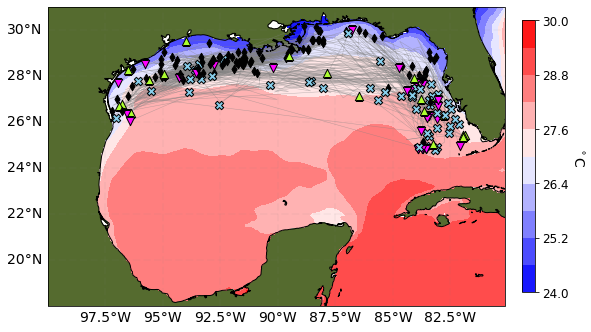

In [203]:
fig,ax = plt.subplots(ncols = 1, nrows = 1, figsize = [10,10],subplot_kw={'projection': ccrs.PlateCarree()})
extent = [260,279.875,18,31]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
ax.coastlines(resolution='10m')
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND, color = 'darkolivegreen')
c = ax.contourf(hcv_gom_son.lon, hcv_gom_son.lat, np.nanmean(hcv_gom_son.temp,0), levels = 10, transform=ccrs.PlateCarree(), cmap = 'bwr',zorder =0)
#ax.add_geometries(NYB.geometry,
#                  ccrs.PlateCarree(),
#                  facecolor='none', edgecolor = 'k', linewidth = 2)
for i in movement_slat_gmex.species[movement_slat_gmex.northsouth == 'southward']:
    df = bw_gmex[bw_gmex.verbatim_name == i]
    df = df.reset_index()
    plt.plot(df.LON, df.LAT, linewidth = 0.5, alpha = 0.5, color = 'grey',zorder = 1)
    plt.scatter(df.LON[0], df.LAT[0], marker = 'd', color = 'k', zorder =2)
    if movement_slat_gmex.depth_p[movement_slat_gmex.species == i].values <0.05:
        if movement_slat_gmex.depth_move[movement_slat_gmex.species == i].values > 0: #deeper
            plt.scatter(df.LON[len(df)-1], df.LAT[len(df)-1], edgecolor = 'k', facecolor = 'magenta', zorder =2, marker = 'v', s = 70)
        if movement_slat_gmex.depth_move[movement_slat_gmex.species == i].values < 0: #shallower
            plt.scatter(df.LON[len(df)-1], df.LAT[len(df)-1], edgecolor = 'k', facecolor = 'greenyellow', zorder =2, marker = '^', s = 70)
    if movement_slat_gmex.depth_p[movement_slat_gmex.species == i].values >0.05:
         plt.scatter(df.LON[len(df)-1], df.LAT[len(df)-1], edgecolor = 'k', facecolor = 'skyblue', zorder =2, s = 70, marker = 'X')
#cbaxes = fig.add_axes([0.1, 0.1, 0.9, 0.8]) 

cbar1 = plt.colorbar(c, ax = ax, pad = 0.03, format = "%.1f", shrink = 0.5)
cbar1.set_label('$^\circ$C', rotation=270, labelpad = 15, fontsize = 14)
cbar1.ax.tick_params(labelsize=12) 
gl.xlabel_style = {'size': 14, 'color': 'k'}
gl.ylabel_style = {'size': 14, 'color': 'k'}
gl.ylabels_right = False
gl.xlabels_top = False

In [204]:
vcv_gom_box = np.reshape(vcv_gom_son.VCV.values, 225*161*40)
vcv_gom_box = vcv_gom_box[np.isnan(vcv_gom_box) == False]

hcv_gom_box = np.reshape(hcv_gom_son.HCV.values, 225*161)
hcv_gom_box = hcv_gom_box[np.isnan(hcv_gom_box) == False]

vcv_neus_box = np.reshape(vcv_neus_SON.VCV.values, 178*141*40)
vcv_neus_box = vcv_neus_box[np.isnan(vcv_neus_box) == False]

hcv_neus_box = np.reshape(hcv_neus_SON.HCV.values, 178*141)
hcv_neus_box = hcv_neus_box[np.isnan(hcv_neus_box) == False]

vcv_ebs_box = np.reshape(vcv_ebs_mjj.VCV.values, 125*330*40)
vcv_ebs_box = vcv_ebs_box[np.isnan(vcv_ebs_box) == False]

hcv_ebs_box = np.reshape(hcv_ebs_mjj.HCV.values, 125*330)
hcv_ebs_box = hcv_ebs_box[np.isnan(hcv_ebs_box) == False]

In [205]:
nangom2  = np.empty(15152)
nangom2[:] = np.nan
nanneus2 = np.empty(492673)
nanneus2[:]  = np.nan
vcv_gom_box = np.append(vcv_gom_box, nangom2)
vcv_neus_box = np.append(vcv_neus_box, nanneus2)

nangom  = np.empty(2909)
nangom[:] = np.nan
nanneus = np.empty(17690)
nanneus[:]  = np.nan
hcv_gom_box = np.append(hcv_gom_box, nangom)
hcv_neus_box = np.append(hcv_neus_box, nanneus)

In [206]:
HCV = pn.DataFrame({'NE US' : hcv_neus_box,
                    'Gulf of Mexico': hcv_gom_box,
                    'E Bering Sea': hcv_ebs_box})

In [207]:
VCV = pn.DataFrame({'NE US' : vcv_neus_box,
                    'Gulf of Mexico': vcv_gom_box,
                    'E Bering Sea': vcv_ebs_box})

/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categ

Text(-0.2, 0.95, 'c)')

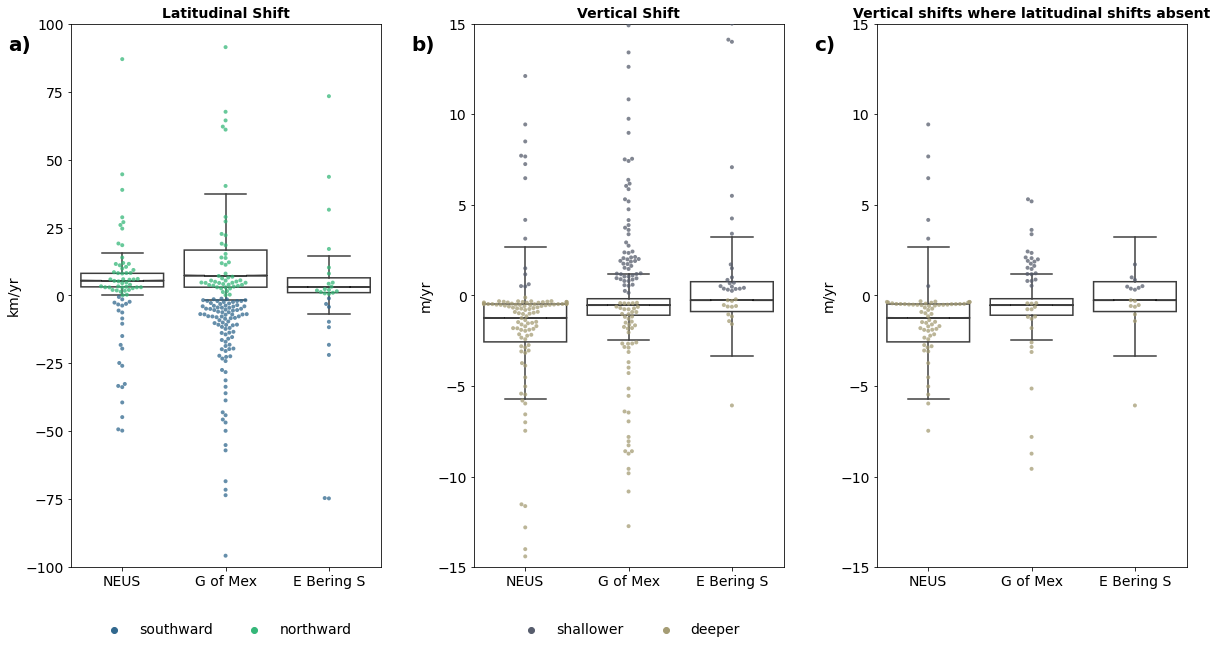

In [208]:
# create a figure
fig = plt.figure()
 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(10)
 
# set width of each subplot as 8
fig.set_figwidth(20)
 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,1], 
                         wspace=0.3)#,
                        #hspace=0.1, height_ratios=[0.75, 1.25])

ax1 = fig.add_subplot(spec[0])
B = sns.boxplot(HCV, showfliers = False, labels = [''], ax = ax1,notch=True, showcaps=True,
    #flierprops={"marker": "x"},
    boxprops={"facecolor": 'white'},
    medianprops={"color": "black"})
sns.swarmplot(data = movement_slat, x = movement_slat.location, y = movement_slat.ns_move, hue = movement_slat.northsouth, ax = ax1, alpha = 0.75, palette = 'viridis', legend = 'auto', s = 4)
sns.swarmplot(data = movement_slat_gmex, x = movement_slat_gmex.location, y = movement_slat_gmex.ns_move, hue = movement_slat_gmex.northsouth, ax = ax1, alpha = 0.75, palette = 'viridis_r', legend = False, s = 4)
sns.swarmplot(data = movement_slat_ebs, x = movement_slat_ebs.location, y = movement_slat_ebs.ns_move, hue = movement_slat_ebs.northsouth, ax = ax1, alpha = 0.75, palette = 'viridis_r', legend = False, s = 4)
#sns.swarmplot(data = movement_slat[movement_slat.species == 'BREVOORTIA TYRANNUS'], x = movement_slat[movement_slat.species == 'BREVOORTIA TYRANNUS'].location, y = movement_slat[movement_slat.species == 'BREVOORTIA TYRANNUS'].ns_move, marker = '*', color = 'k', alpha = 0.75, size = 15) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)

ax1.set_title('Latitudinal Shift', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('km/yr', fontsize = 14)
ax1.set_ylim([-100,100])
ax1.set_xlabel('')
ax1.tick_params(labelsize = 14)
ax1.set_xticklabels(['NEUS','G of Mex','E Bering S'], fontsize = 14)
sns.move_legend(
    ax1, "lower center",
    bbox_to_anchor=(0.5, -.15), ncol=2, title=None, frameon=False, fontsize = 14)


ax2 = fig.add_subplot(spec[1])
sns.boxplot(VCV, showfliers = False, labels = [''], ax = ax2, notch=True, showcaps=True,
    #flierprops={"marker": "x"},
    boxprops={"facecolor": 'white'},
    medianprops={"color": "black"})
sns.swarmplot(data = movement_categorized_neus, x = movement_categorized_neus.location, y = movement_categorized_neus.depth_move, hue = movement_categorized_neus.posneg, ax = ax2, alpha = 0.75, palette = 'cividis', legend = 'auto', s = 4)
sns.swarmplot(data = movement_categorized_gmex, x = movement_categorized_gmex.location, y = movement_categorized_gmex.depth_move, hue = movement_categorized_gmex.posneg, ax = ax2, alpha = 0.75, palette = 'cividis', legend = False, s = 4)
sns.swarmplot(data = movement_categorized_ebs, x = movement_categorized_ebs.location, y = movement_categorized_ebs.depth_move, hue = movement_categorized_ebs.posneg, ax = ax2, alpha = 0.75, palette = 'cividis', legend = False, s = 4)
#sns.swarmplot(data = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'], x = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'].location, y = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'].depth_move, marker = '*', color = 'k', alpha = 0.75, size = 15) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)
#sns.swarmplot(data = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'], x = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'].location, y = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'].depth_move, marker = 's', color = 'k', alpha = 0.75, size = 10) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)
ax2.set_title('Vertical Shift', fontsize = 14, fontweight = 'bold')
ax2.set_ylabel('m/yr', fontsize = 14)
ax2.set_ylim([-15,15])
ax2.set_xlabel('')
ax2.tick_params(labelsize = 14)
ax2.set_xticklabels(['NEUS','G of Mex','E Bering S'], fontsize = 14)
sns.move_legend(
    ax2, "lower center",
    bbox_to_anchor=(0.5, -.15), ncol=2, title=None, frameon=False, fontsize = 14)

ax3 = fig.add_subplot(spec[2])
sns.boxplot(VCV, showfliers = False, labels = [''], ax = ax3, notch=True, showcaps=True,
    #flierprops={"marker": "x"},
    boxprops={"facecolor": 'white'},
    medianprops={"color": "black"})
sns.swarmplot(data = movement_categorized_neus[movement_categorized_neus.category == 'none'], x = movement_categorized_neus[movement_categorized_neus.category == 'none'].location, y = movement_categorized_neus[movement_categorized_neus.category == 'none'].depth_move, hue = movement_categorized_neus[movement_categorized_neus.category == 'none'].posneg, ax = ax3, alpha = 0.75, palette = 'cividis_r', legend = False, s = 4)
sns.swarmplot(data = movement_categorized_gmex[movement_categorized_gmex.category == 'none'], x = movement_categorized_gmex[movement_categorized_gmex.category == 'none'].location, y = movement_categorized_gmex[movement_categorized_gmex.category == 'none'].depth_move, hue = movement_categorized_gmex[movement_categorized_gmex.category == 'none'].posneg, ax = ax3, alpha = 0.75, palette = 'cividis', legend = False, s = 4)
sns.swarmplot(data = movement_categorized_ebs[movement_categorized_ebs.category == 'none'], x = movement_categorized_ebs[movement_categorized_ebs.category == 'none'].location, y = movement_categorized_ebs[movement_categorized_ebs.category == 'none'].depth_move, hue = movement_categorized_ebs[movement_categorized_ebs.category == 'none'].posneg, ax = ax3, alpha = 0.75, palette = 'cividis_r', legend = False, s = 4)
#sns.swarmplot(data = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'], x = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'].location, y = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'].depth_move, marker = '*', color = 'k', alpha = 0.75, size = 15) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)
#sns.swarmplot(data = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'], x = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'].location, y = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'].depth_move, marker = 's', color = 'k', alpha = 0.75, size = 10) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)
ax3.set_title('Vertical shifts where latitudinal shifts absent', fontsize = 14, fontweight = 'bold')
ax3.set_ylabel('m/yr', fontsize = 14)
ax3.set_ylim([-15,15])
ax3.set_xlabel('')
ax3.tick_params(labelsize = 14)
ax3.set_xticklabels(['NEUS','G of Mex','E Bering S'], fontsize = 14)
#sns.move_legend(
#    ax3, "lower center",
#    bbox_to_anchor=(0.5, -.15), ncol=2, title=None, frameon=False, fontsize = 14)

#ax3.plot([2.5, 2.5], [-15,15], linestyle = 'dashed', c = 'black')

ax1.text(-0.2, 0.95, 'a)', transform=ax1.transAxes, 
            size=20, weight='bold')
ax2.text(-0.2, 0.95, 'b)', transform=ax2.transAxes, 
            size=20, weight='bold')
ax3.text(-0.2, 0.95, 'c)', transform=ax3.transAxes, 
            size=20, weight='bold')

/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categ

Text(-0.2, 0.95, 'c)')

/Users/nyelab/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


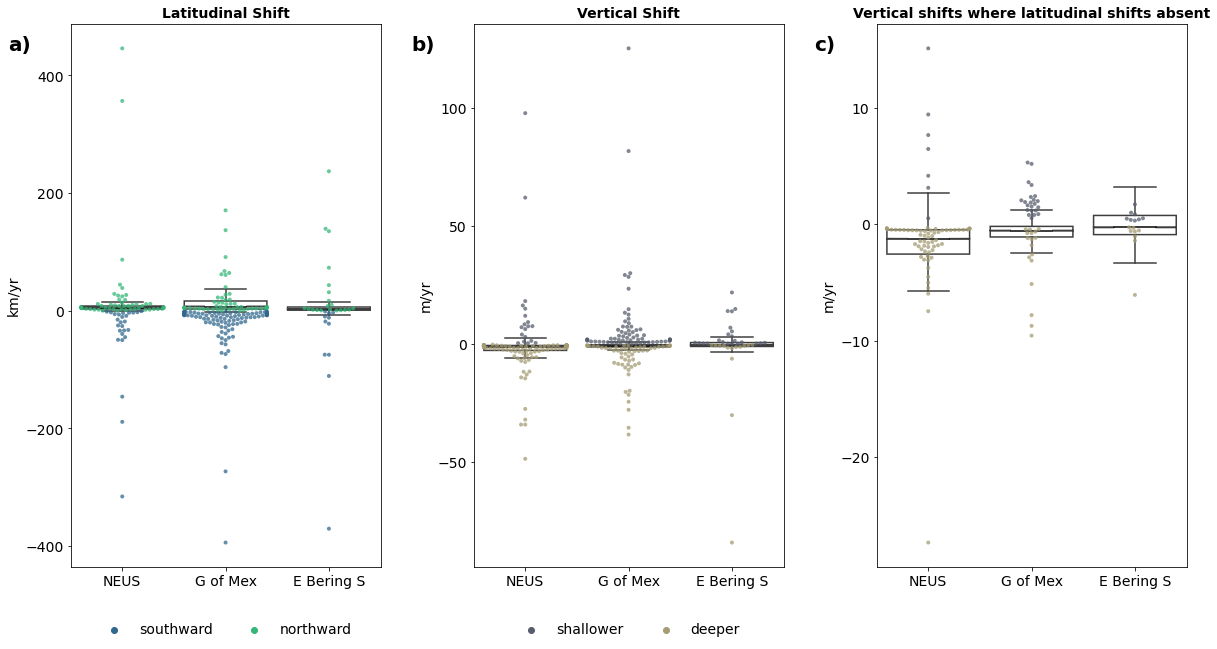

In [212]:
# create a figure
fig = plt.figure()
 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(10)
 
# set width of each subplot as 8
fig.set_figwidth(20)
 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,1], 
                         wspace=0.3)#,
                        #hspace=0.1, height_ratios=[0.75, 1.25])

ax1 = fig.add_subplot(spec[0])
B = sns.boxplot(HCV, showfliers = False, labels = [''], ax = ax1,notch=True, showcaps=True,
    #flierprops={"marker": "x"},
    boxprops={"facecolor": 'white'},
    medianprops={"color": "black"})
sns.swarmplot(data = movement_slat, x = movement_slat.location, y = movement_slat.ns_move, hue = movement_slat.northsouth, ax = ax1, alpha = 0.75, palette = 'viridis', legend = 'auto', s = 4)
sns.swarmplot(data = movement_slat_gmex, x = movement_slat_gmex.location, y = movement_slat_gmex.ns_move, hue = movement_slat_gmex.northsouth, ax = ax1, alpha = 0.75, palette = 'viridis_r', legend = False, s = 4)
sns.swarmplot(data = movement_slat_ebs, x = movement_slat_ebs.location, y = movement_slat_ebs.ns_move, hue = movement_slat_ebs.northsouth, ax = ax1, alpha = 0.75, palette = 'viridis_r', legend = False, s = 4)
#sns.swarmplot(data = movement_slat[movement_slat.species == 'BREVOORTIA TYRANNUS'], x = movement_slat[movement_slat.species == 'BREVOORTIA TYRANNUS'].location, y = movement_slat[movement_slat.species == 'BREVOORTIA TYRANNUS'].ns_move, marker = '*', color = 'k', alpha = 0.75, size = 15) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)

ax1.set_title('Latitudinal Shift', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('km/yr', fontsize = 14)
#ax1.set_ylim([-100,100])
ax1.set_xlabel('')
ax1.tick_params(labelsize = 14)
ax1.set_xticklabels(['NEUS','G of Mex','E Bering S'], fontsize = 14)
sns.move_legend(
    ax1, "lower center",
    bbox_to_anchor=(0.5, -.15), ncol=2, title=None, frameon=False, fontsize = 14)


ax2 = fig.add_subplot(spec[1])
sns.boxplot(VCV, showfliers = False, labels = [''], ax = ax2, notch=True, showcaps=True,
    #flierprops={"marker": "x"},
    boxprops={"facecolor": 'white'},
    medianprops={"color": "black"})
sns.swarmplot(data = movement_categorized_neus, x = movement_categorized_neus.location, y = movement_categorized_neus.depth_move, hue = movement_categorized_neus.posneg, ax = ax2, alpha = 0.75, palette = 'cividis', legend = 'auto', s = 4)
sns.swarmplot(data = movement_categorized_gmex, x = movement_categorized_gmex.location, y = movement_categorized_gmex.depth_move, hue = movement_categorized_gmex.posneg, ax = ax2, alpha = 0.75, palette = 'cividis', legend = False, s = 4)
sns.swarmplot(data = movement_categorized_ebs, x = movement_categorized_ebs.location, y = movement_categorized_ebs.depth_move, hue = movement_categorized_ebs.posneg, ax = ax2, alpha = 0.75, palette = 'cividis', legend = False, s = 4)
#sns.swarmplot(data = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'], x = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'].location, y = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'].depth_move, marker = '*', color = 'k', alpha = 0.75, size = 15) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)
#sns.swarmplot(data = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'], x = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'].location, y = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'].depth_move, marker = 's', color = 'k', alpha = 0.75, size = 10) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)
ax2.set_title('Vertical Shift', fontsize = 14, fontweight = 'bold')
ax2.set_ylabel('m/yr', fontsize = 14)
#ax2.set_ylim([-15,15])
ax2.set_xlabel('')
ax2.tick_params(labelsize = 14)
ax2.set_xticklabels(['NEUS','G of Mex','E Bering S'], fontsize = 14)
sns.move_legend(
    ax2, "lower center",
    bbox_to_anchor=(0.5, -.15), ncol=2, title=None, frameon=False, fontsize = 14)

ax3 = fig.add_subplot(spec[2])
sns.boxplot(VCV, showfliers = False, labels = [''], ax = ax3, notch=True, showcaps=True,
    #flierprops={"marker": "x"},
    boxprops={"facecolor": 'white'},
    medianprops={"color": "black"})
sns.swarmplot(data = movement_categorized_neus[movement_categorized_neus.category == 'none'], x = movement_categorized_neus[movement_categorized_neus.category == 'none'].location, y = movement_categorized_neus[movement_categorized_neus.category == 'none'].depth_move, hue = movement_categorized_neus[movement_categorized_neus.category == 'none'].posneg, ax = ax3, alpha = 0.75, palette = 'cividis_r', legend = False, s = 4)
sns.swarmplot(data = movement_categorized_gmex[movement_categorized_gmex.category == 'none'], x = movement_categorized_gmex[movement_categorized_gmex.category == 'none'].location, y = movement_categorized_gmex[movement_categorized_gmex.category == 'none'].depth_move, hue = movement_categorized_gmex[movement_categorized_gmex.category == 'none'].posneg, ax = ax3, alpha = 0.75, palette = 'cividis', legend = False, s = 4)
sns.swarmplot(data = movement_categorized_ebs[movement_categorized_ebs.category == 'none'], x = movement_categorized_ebs[movement_categorized_ebs.category == 'none'].location, y = movement_categorized_ebs[movement_categorized_ebs.category == 'none'].depth_move, hue = movement_categorized_ebs[movement_categorized_ebs.category == 'none'].posneg, ax = ax3, alpha = 0.75, palette = 'cividis_r', legend = False, s = 4)
#sns.swarmplot(data = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'], x = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'].location, y = movement_categorized_neus[movement_categorized_neus.species == 'BREVOORTIA TYRANNUS'].depth_move, marker = '*', color = 'k', alpha = 0.75, size = 15) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)
#sns.swarmplot(data = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'], x = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'].location, y = movement_categorized_gmex[movement_categorized_gmex.species == 'SERIOLA DUMERILI'].depth_move, marker = 's', color = 'k', alpha = 0.75, size = 10) #hue = movement_slat[movement_slat.species == 'CENTROPRISTIS STRIATA'].northsouth, marker = 's', ax = ax1, alpha = 0.75, palette = 'viridis', legend = False)
ax3.set_title('Vertical shifts where latitudinal shifts absent', fontsize = 14, fontweight = 'bold')
ax3.set_ylabel('m/yr', fontsize = 14)
#ax3.set_ylim([-15,15])
ax3.set_xlabel('')
ax3.tick_params(labelsize = 14)
ax3.set_xticklabels(['NEUS','G of Mex','E Bering S'], fontsize = 14)
#sns.move_legend(
#    ax3, "lower center",
#    bbox_to_anchor=(0.5, -.15), ncol=2, title=None, frameon=False, fontsize = 14)

#ax3.plot([2.5, 2.5], [-15,15], linestyle = 'dashed', c = 'black')

ax1.text(-0.2, 0.95, 'a)', transform=ax1.transAxes, 
            size=20, weight='bold')
ax2.text(-0.2, 0.95, 'b)', transform=ax2.transAxes, 
            size=20, weight='bold')
ax3.text(-0.2, 0.95, 'c)', transform=ax3.transAxes, 
            size=20, weight='bold')

## 13. Figure 6

In [365]:
directory = '/Users/nyelab/Downloads/Fisheries Landings Climate Velocity/'

In [366]:
names = 'Arctic Ocean'
numbers = 64
tonnage = np.nan
landings = np.nan
artisanal_T = np.nan
artisanal_L = np.nan
industrial_T = np.nan
industrial_L = np.nan
recreational_T = np.nan
recreational_L = np.nan
subsistence_T = np.nan
subsistence_L = np.nan
func_group = np.nan
gear_type = np.nan
sharks = np.nan
rays = np.nan
bottom_trawl = np.nan
pelagic_trawl = np.nan
pelagic_demersal = np.nan
p_to_d_delta = np.nan
sig = 'no'

for filename in os.listdir(directory):
    file = filename + '/' + filename + '.csv'
    f = os.path.join(directory, file)
    # checking if it is a file
    if os.path.isfile(f):
        LME_number = int(filename[8:10])
        df = pn.read_csv(f)
        LME_name = np.unique(df.area_name)[0]
        df_2019 = df[df.year == 2019]
        func_group = np.append(func_group, np.unique(df_2019.functional_group))
        gear_type = np.append(gear_type, np.unique(df_2019.gear_type))
        tons = np.nansum(df_2019.tonnes)
        landing_val = np.nansum(df_2019.landed_value)
        names = np.append(names, LME_name)
        numbers = np.append(numbers, LME_number)
        tonnage = np.append(tonnage, tons)
        landings = np.append(landings, landing_val)
        fishsector = df_2019.groupby('fishing_sector')['tonnes','landed_value'].sum()
        if np.any(fishsector[fishsector.index == 'Artisanal']['tonnes']) == True:
            artisanal_T = np.append(artisanal_T, fishsector[fishsector.index == 'Artisanal']['tonnes'].values[0])
            artisanal_L = np.append(artisanal_L, fishsector[fishsector.index == 'Artisanal']['tonnes'].values[0])
        else:
            artisanal_T = np.append(artisanal_T, np.nan)
            artisanal_L = np.append(artisanal_L, np.nan)
        if np.any(fishsector[fishsector.index == 'Industrial']['tonnes']) == True:
            industrial_T = np.append(industrial_T, fishsector[fishsector.index == 'Industrial']['tonnes'].values[0])
            industrial_L = np.append(industrial_L, fishsector[fishsector.index == 'Industrial']['tonnes'].values[0])
        else:
            industrial_T = np.append(industrial_T, np.nan)
            industrial_L = np.append(industrial_L, np.nan)            
        if np.any(fishsector[fishsector.index == 'Recreational']['tonnes']) == True:
            recreational_T = np.append(recreational_T, fishsector[fishsector.index == 'Recreational']['tonnes'].values[0])
            recreational_L = np.append(recreational_L, fishsector[fishsector.index == 'Recreational']['tonnes'].values[0])
        else:
            recreational_T = np.append(recreational_T, np.nan)
            recreational_L = np.append(recreational_L, np.nan)            
        if np.any(fishsector[fishsector.index == 'Subsistence']['tonnes']) == True:
            subsistence_L = np.append(subsistence_L,fishsector[fishsector.index == 'Subsistence']['tonnes'].values[0])  
            subsistence_T = np.append(subsistence_T,fishsector[fishsector.index == 'Subsistence']['tonnes'].values[0])
        else:
            subsistence_L = np.append(subsistence_L,np.nan)  
            subsistence_T = np.append(subsistence_T,np.nan)
        
        grouped_df = df_2019.groupby('functional_group')['tonnes'].sum()
        pelagic = grouped_df[grouped_df.index.str.contains("pelagics", case=False)].sum()
        demersal = grouped_df[grouped_df.index.str.contains("demersal", case=False)].sum()
        shark = grouped_df[grouped_df.index.str.contains("shark", case=False)].sum()
        ray = grouped_df[grouped_df.index.str.contains("ray", case=False)].sum()
        pelagic_demersal = np.append(pelagic_demersal, pelagic/demersal)
        sharks = np.append(sharks, shark)
        rays = np.append(rays, ray)
        
        grouped_df = df_2019.groupby('gear_type')['tonnes'].sum()
        bt_trawl = grouped_df[grouped_df.index.str.contains("bottom trawl", case=False)].sum()
        pl_trawl = grouped_df[grouped_df.index.str.contains("pelagic trawl", case=False)].sum()
        bottom_trawl = np.append(bottom_trawl, bt_trawl)
        pelagic_trawl = np.append(pelagic_trawl, pl_trawl)
        
        p_to_d = np.empty(len(np.unique(df.year)))
        for j in range(len(np.unique(df.year))):
            df_year = df[df.year == np.unique(df.year)[j]]
            grouped_df = df_year.groupby('functional_group')['tonnes'].sum()
            pelagic = grouped_df[grouped_df.index.str.contains("pelagics", case=False)].sum()
            demersal = grouped_df[grouped_df.index.str.contains("demersal", case=False)].sum()
            p_to_d[j] = pelagic/demersal
        [slope, intercept, rvalue, pvalue, stderr] = scipy.stats.linregress(np.unique(df.year), p_to_d)
        delta = (slope * sum(np.diff(np.unique(df.year))))
        if pvalue < 0.05:
            sig_yn = 'yes'
        else:
            sig_yn = 'no'
        p_to_d_delta = np.append(p_to_d_delta, delta)
        sig = np.append(sig, sig_yn)

<ipython-input-366-fa41eeb5b669>:40: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fishsector = df_2019.groupby('fishing_sector')['tonnes','landed_value'].sum()
<ipython-input-366-fa41eeb5b669>:40: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fishsector = df_2019.groupby('fishing_sector')['tonnes','landed_value'].sum()
<ipython-input-366-fa41eeb5b669>:40: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fishsector = df_2019.groupby('fishing_sector')['tonnes','landed_value'].sum()
<ipython-input-366-fa41eeb5b669>:40: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fishsector = df_2019.groupby('fishing_sector')['tonnes','landed_value'].sum()
<ipython-input-366-fa41eeb5b669>

In [367]:
fish = pn.DataFrame(data = {'Name': names,
                            'Number': numbers,
                            'Tons': tonnage,
                            'Landings': landings,
                           'Artisanal_tons': artisanal_T,
                           'Artisanal_landedUSD': artisanal_L,
                           'Industrial_tons': industrial_T,
                           'Industrial_landedUSD': industrial_L,
                           'Recreational_tons': recreational_T,
                           'Recreational_landedUSD': recreational_L,
                           'Subsistence_tons': subsistence_T,
                           'Subsistence_landedUSD': subsistence_L,
                            'rays': rays,
                            'sharks': sharks,
                            'bottom_trawl': bottom_trawl,
                            'pelagic_trawl': pelagic_trawl,
                            'p_d': pelagic_demersal,
                           'pelagic_demersal': p_to_d_delta,
                           'trend_sig': sig})

In [368]:
fish_sorted = fish.sort_values(by=['Number'])

In [369]:
vel_fish = lme_lmh2.sort_values(by=['Number'])

In [370]:
vel_fish['tons'] = fish_sorted.Tons.values
vel_fish['landings'] = fish_sorted.Landings.values
vel_fish['artisanal_T'] = fish_sorted.Artisanal_tons.values
vel_fish['artisanal_L'] = fish_sorted.Artisanal_landedUSD.values
vel_fish['industrial_T'] = fish_sorted.Industrial_tons.values
vel_fish['industrial_L'] = fish_sorted.Industrial_landedUSD.values
vel_fish['recreational_T'] = fish_sorted.Recreational_tons.values
vel_fish['recreational_L'] = fish_sorted.Recreational_landedUSD.values
vel_fish['subsistence_T'] = fish_sorted.Subsistence_tons.values
vel_fish['subsistence_L'] = fish_sorted.Subsistence_landedUSD.values
vel_fish['rays'] = fish_sorted.rays.values
vel_fish['sharks'] = fish_sorted.sharks.values
vel_fish['pd_ratio'] = fish_sorted.p_d.values
vel_fish['bottom_trawl'] = fish_sorted.bottom_trawl.values
vel_fish['pelagic_trawl'] = fish_sorted.pelagic_trawl.values
vel_fish['pelagic_demersal'] = fish_sorted.pelagic_demersal.values
vel_fish['trend_sig'] = fish_sorted.trend_sig.values

In [371]:
vel_fish = vel_fish.sort_index()
vel_fish['medianV'] = median_V
vel_fish['medianH'] = median_H

In [382]:
bins = np.linspace(vel_fish.tons.min(), vel_fish.tons.max(), 5)
grouped =vel_fish.groupby(np.digitize(vel_fish.tons, bins))

sizes = [50*(i+1.) for i in range(5)]
labels = ['Tiny', 'Small', 'Medium', 'Large', 'Huge']

sizes

[50.0, 100.0, 150.0, 200.0, 250.0]

In [505]:
bins = np.linspace(vel_fish.tons.min(), vel_fish.tons.max(), 10)

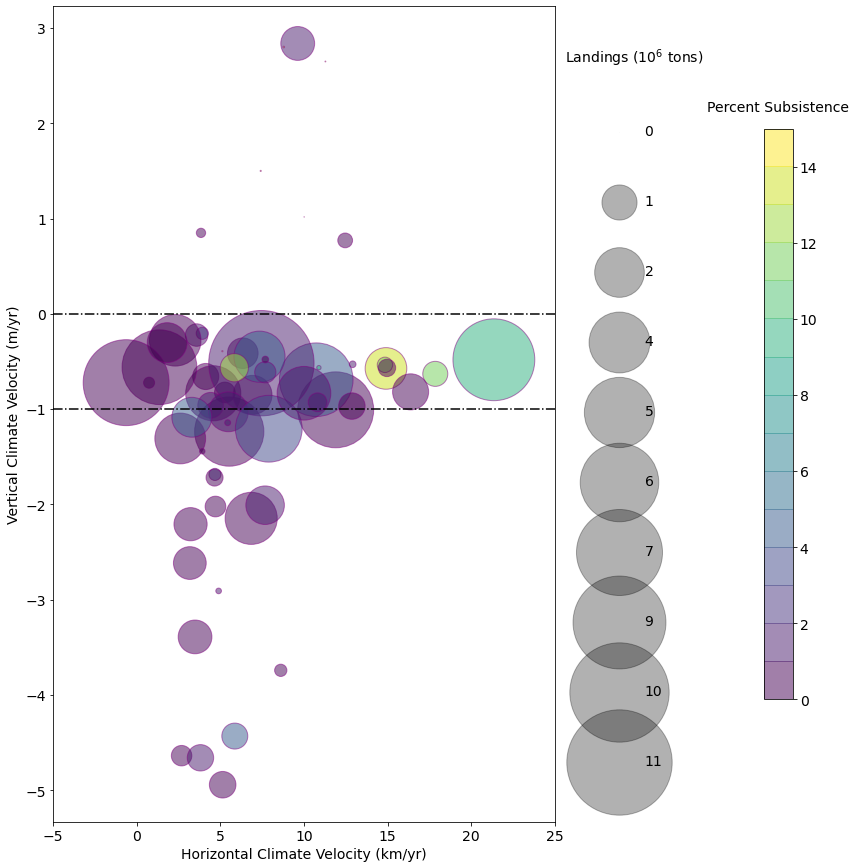

In [529]:
import matplotlib as mpl

cmap = plt.cm.viridis
bounds = np.append(np.arange(0,15,1), 101)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


# Create the DataFrame from your randomised data and bin it using groupby.

#bins = np.linspace(vel_fish.tons.min(), vel_fish.tons.max()/1000, 5)
#grouped =vel_fish.groupby(np.digitize(vel_fish.tons/1000, bins))

# Create some sizes and some labels.
#sizes = [50*(i+1.) for i in range(5)]
#labels = ['Tiny', 'Small', 'Medium', 'Large', 'Huge']

fig, ax = plt.subplots(figsize = [15,15])
#for i, (name, group) in enumerate(grouped):
#    plt.scatter(group.medianH, group.medianV, s=sizes[i], c= grouped.subsistence_T, alpha=0.5, label=labels[i])

c = ax.scatter(vel_fish.medianH, vel_fish.medianV, marker = 'o',edgecolor ='purple', s= vel_fish.tons/1000,  c= vel_fish.subsistence_T/vel_fish.tons*100, cmap = cmap, norm = norm, alpha = .5)
#for i, txt in enumerate(vel_fish.LME_NAME):
#    ax.annotate(txt, (vel_fish.medianH[i], vel_fish.medianV[i]))
ax.tick_params(labelsize = 14)
ax.set_ylabel('Vertical Climate Velocity (m/yr)', fontsize = 14)
ax.set_xlabel('Horizontal Climate Velocity (km/yr)', fontsize = 14)
ax.plot([-5,25],[0,0],c = 'k',linestyle = '-.')
ax.plot([-5,25],[-1,-1],c = 'k',linestyle = '-.')
ax.set_xlim([-5,25])
#ax.set_title('Industrial Catch Tonnes', fontsize = 16)
cbar = plt.colorbar(c, shrink = .7, pad = 0.25)
cbar.ax.set_yticklabels(labels = [0, 2, 4, 6, 8, 10, 12, 14], fontsize = 14)
cbar.ax.set_ylabel('Percent Subsistence', fontsize = 14, labelpad=-40, y=1.05, rotation=0)

for area in bins:
    ax.scatter([], [], c='k', alpha=0.3, s=area/1000,
                label=str(round(area/10**6)))
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=4, title='Landings (10$^6$ tons)', loc = 'lower right', bbox_to_anchor=(01.32, .05), fontsize = 14, title_fontsize = 14)




#handles, labels = c.legend_elements(prop="sizes", alpha=0.6, num =5, func = lambda x: x*1000)
#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#kw = dict(prop="sizes", num=5, color=c.cmap(0.7), func=lambda s: s)
#legend2 = ax.legend(*c.legend_elements(**kw),
#                    loc="lower right", title="Price")

#ax.add_artist(legend2)
#plt.show()

In [547]:
bigger_than_neg_1 = vel_fish[vel_fish.medianV>-1]
neg_1_to_zero = bigger_than_neg_1[bigger_than_neg_1.medianV<0]

In [550]:
np.sum(neg_1_to_zero.landings)/np.sum(vel_fish.landings)

0.7069931878186212

In [553]:
np.sum(neg_1_to_zero.subsistence_T)/np.sum(vel_fish.subsistence_T)

0.8153532607432014